# Download and look into the data

## Project description

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

**Interconnect's services**

Interconnect mainly provides two types of services:

1. Landline communication. The telephone can be connected to several lines simultaneously.
2. Internet. The network can be set up via a telephone line (DSL, *digital subscriber line*) or through a fiber optic cable.

Some other services the company provides include:

- Internet security: antivirus software (*DeviceProtection*) and a malicious website blocker (*OnlineSecurity*)
- A dedicated technical support line (*TechSupport*)
- Cloud file storage and data backup (*OnlineBackup*)
- TV streaming (*StreamingTV*) and a movie directory (*StreamingMovies*)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

### Import needed libraries

In [311]:
# Data tools
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport

# others
import time
from functools import reduce
from statsmodels.tsa.seasonal import seasonal_decompose

# Graphics and display
from IPython.core.interactiveshell import InteractiveShell
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

%matplotlib inline

# Ml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
# !pip install catboost
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, \
roc_auc_score, recall_score, precision_score

# Statistics
from scipy.stats import randint

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


1.0.3  Set environment variables

In [312]:
# set to display all output not only print() or last output
InteractiveShell.ast_node_interactivity = "all"      

1.1  Open the file and look into the data.

In [313]:
try:
    contract = pd.read_csv('contract.csv')
    internet = pd.read_csv('internet.csv')
    personal = pd.read_csv('personal.csv')
    phone = pd.read_csv('phone.csv')
    
except:
    contract = pd.read_csv('/datasets/contract.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    personal = pd.read_csv('/datasets/personal.csv')
    phone = pd.read_csv('/datasets/phone.csv')
    
print('Data has been read correctly!')

Data has been read correctly!


##  Data describe notes

#### Special function for data describe

In [314]:
# Checking 0's
def zero_check(df):
    for i in df:
        print(i,len(df[df[i]==0]))
        
# function to determine if columns in file have null values        
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('{} has {} nulls, which is {:.{}%} percent of Nulls'.format(column, num_of_nulls, percent, num))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")       
        
# function to display general information about the dataset
def general_info(df):
    print("\033[1m" + "\033[0m")
    display(pd.concat([df.dtypes, df.count(),df.isna().sum(),df.isna().sum()*100/len(df)], keys=['type','count','na','na%'],
                      axis=1))
    print()
    print("\033[1m" + 'Head:')  
    display(df.head())
    print()
    print("\033[1m" + 'Tail:')
    display(df.tail())
    print()
    print("\033[1m" + 'Info:')
    print()
    display(df.info())
    print()
    print("\033[1m" + 'Describe:')
    print()
    display(df.describe())
    print()
    print("\033[1m" + 'Describe include: all :')
    print()
    display(df.describe(include='all'))
    print()
    print("\033[1m" + 'nulls in the columns:')
    print()
    display(get_percent_of_na(df, 4))  # check this out
    print()
    print("\033[1m" + 'Zeros in the columns:') 
    print()
    display(zero_check(df))
    print()
    print("\033[1m" + 'Shape:', df.shape)
    print()
    print()
    print('Duplicated:',"\033[1m" + 'We have {} duplicated rows\n'.format(df.duplicated().sum()) + "\033[0m")
    print()
    print("\033[1m" + 'Dtypes:')  
    display(df.dtypes)
    print()

In [315]:
# check if there are id that return more than once
def each_id_appears_once(df):
    if len(df['customerID'].unique()) == len(df['customerID']):
        return print("each id appears only once")
    else:
        return print("each id appears more then once")  

In [316]:
def is_all_id_in_sub_df_are_within_main_data_base(sub_df, main_df=contract):
    list_main = main_df['customerID'].to_list()
    list_sub = sub_df['customerID'].to_list()
    check =  all(item in list_main for item in list_sub)
    if check is True:
        print("list_main contains all elements of the list_sub")    
    else :
        print("No, List1 doesn't have all elements of the List2.")

In [317]:
print('information about the contract dataset:')
general_info(contract)

information about the contract dataset:



type  count  na  na%
customerID         object   7043   0  0.0
BeginDate          object   7043   0  0.0
EndDate            object   7043   0  0.0
Type               object   7043   0  0.0
PaperlessBilling   object   7043   0  0.0
PaymentMethod      object   7043   0  0.0
MonthlyCharges    float64   7043   0  0.0
TotalCharges       object   7043   0  0.0


Head:


customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65


Tail:


customerID   BeginDate              EndDate            Type  \
7038  6840-RESVB  2018-02-01                   No        One year   
7039  2234-XADUH  2014-02-01                   No        One year   
7040  4801-JZAZL  2019-03-01                   No  Month-to-month   
7041  8361-LTMKD  2019-07-01  2019-11-01 00:00:00  Month-to-month   
7042  3186-AJIEK  2014-08-01                   No        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
7038              Yes               Mailed check           84.80       1990.5  
7039              Yes    Credit card (automatic)          103.20       7362.9  
7040              Yes           Electronic check           29.60       346.45  
7041              Yes               Mailed check           74.40        306.6  
7042              Yes  Bank transfer (automatic)          105.65       6844.5


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None


Describe:



MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000


Describe include: all :



customerID   BeginDate EndDate            Type PaperlessBilling  \
count         7043        7043    7043            7043             7043   
unique        7043          77       5               3                2   
top     7590-VHVEG  2014-02-01      No  Month-to-month              Yes   
freq             1         366    5174            3875             4171   
mean           NaN         NaN     NaN             NaN              NaN   
std            NaN         NaN     NaN             NaN              NaN   
min            NaN         NaN     NaN             NaN              NaN   
25%            NaN         NaN     NaN             NaN              NaN   
50%            NaN         NaN     NaN             NaN              NaN   
75%            NaN         NaN     NaN             NaN              NaN   
max            NaN         NaN     NaN             NaN              NaN   

           PaymentMethod  MonthlyCharges TotalCharges  
count               7043     7043.000000         7043  
unique                 4             NaN         6531  
top     Electronic check             NaN               
freq                2365             NaN           11  
mean                 NaN       64.761692          NaN  
std                  NaN       30.090047          NaN  
min                  NaN       18.250000          NaN  
25%                  NaN       35.500000          NaN  
50%                  NaN       70.350000          NaN  
75%                  NaN       89.850000          NaN  
max                  NaN      118.750000          NaN


nulls in the columns:


There are no columns with NA.


None


Zeros in the columns:

customerID 0
BeginDate 0
EndDate 0
Type 0
PaperlessBilling 0
PaymentMethod 0
MonthlyCharges 0
TotalCharges 0


None


Shape: (7043, 8)


Duplicated: We have 0 duplicated rows


Dtypes:


customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [318]:
each_id_appears_once(contract)

each id appears only once


In [319]:
contract['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [320]:
contract['Type'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [321]:
contract['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [322]:
contract['EndDate'].unique()

array(['No', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

In [323]:
contract['BeginDate'].unique()

array(['2020-01-01', '2017-04-01', '2019-10-01', '2016-05-01',
       '2019-09-01', '2019-03-01', '2018-04-01', '2019-04-01',
       '2017-07-01', '2014-12-01', '2019-01-01', '2018-10-01',
       '2015-04-01', '2015-09-01', '2018-01-01', '2014-05-01',
       '2015-10-01', '2014-03-01', '2018-05-01', '2019-11-01',
       '2019-02-01', '2016-01-01', '2017-08-01', '2015-12-01',
       '2014-02-01', '2018-06-01', '2019-12-01', '2017-11-01',
       '2019-06-01', '2016-04-01', '2017-02-01', '2018-12-01',
       '2014-04-01', '2018-09-01', '2014-11-01', '2016-07-01',
       '2015-02-01', '2018-07-01', '2014-08-01', '2016-03-01',
       '2018-08-01', '2014-10-01', '2015-06-01', '2016-08-01',
       '2019-05-01', '2017-03-01', '2016-02-01', '2017-09-01',
       '2014-09-01', '2017-12-01', '2016-12-01', '2017-06-01',
       '2015-05-01', '2016-10-01', '2016-09-01', '2019-08-01',
       '2019-07-01', '2017-05-01', '2017-10-01', '2014-07-01',
       '2018-03-01', '2015-01-01', '2018-11-01', '2015-

In [324]:
contract['BeginDate'].value_counts()

2014-02-01    366
2019-10-01    237
2019-11-01    237
2019-09-01    237
2020-01-01    233
             ... 
2020-02-01     11
2014-01-01      7
2013-10-01      3
2013-12-01      3
2013-11-01      2
Name: BeginDate, Length: 77, dtype: int64

In [325]:
frac_No_for_ballance = len(contract[contract['EndDate'] == 'No']) / len(contract['EndDate'])
print('The "No" precent in the EndDate column (target) is: {:.0%}'.format(frac_No_for_ballance))

The "No" precent in the EndDate column (target) is: 73%


### Notes about the contract data base:
In the contract we have all the customers id - 7043 total. The data is unballanced (73% not left the program)
No missing values.

Task in the preprocessing:
- Need to correct columns name to underscore lowercase.
- change BeginDate date to date type
- TotalCharges change to float64

Task in the features engineering:
- PaymentMethod, Type, PaperlessBilling with one hot encoding
- Create column based on the EndDate says if customer left or not the service.
- Check seasonality for BeginDate (month, day of the week, hour a day)
- After splitting perform class ballancing


       

In [326]:
print('information about the internet dataset:')
general_info(internet)

information about the internet dataset:



type  count  na  na%
customerID        object   5517   0  0.0
InternetService   object   5517   0  0.0
OnlineSecurity    object   5517   0  0.0
OnlineBackup      object   5517   0  0.0
DeviceProtection  object   5517   0  0.0
TechSupport       object   5517   0  0.0
StreamingTV       object   5517   0  0.0
StreamingMovies   object   5517   0  0.0


Head:


customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No


Tail:


customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
5512  6840-RESVB             DSL            Yes           No              Yes   
5513  2234-XADUH     Fiber optic             No          Yes              Yes   
5514  4801-JZAZL             DSL            Yes           No               No   
5515  8361-LTMKD     Fiber optic             No           No               No   
5516  3186-AJIEK     Fiber optic            Yes           No              Yes   

     TechSupport StreamingTV StreamingMovies  
5512         Yes         Yes             Yes  
5513          No         Yes             Yes  
5514          No          No              No  
5515          No          No              No  
5516         Yes         Yes             Yes


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None


Describe:



customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     7590-VHVEG     Fiber optic             No           No   
freq             1            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV StreamingMovies  
count              5517        5517        5517            5517  
unique                2           2           2               2  
top                  No          No          No              No  
freq               3095        3473        2810            2785


Describe include: all :



customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     7590-VHVEG     Fiber optic             No           No   
freq             1            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV StreamingMovies  
count              5517        5517        5517            5517  
unique                2           2           2               2  
top                  No          No          No              No  
freq               3095        3473        2810            2785


nulls in the columns:


There are no columns with NA.


None


Zeros in the columns:

customerID 0
InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0


None


Shape: (5517, 8)


Duplicated: We have 0 duplicated rows


Dtypes:


customerID          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object

In [327]:
each_id_appears_once(internet)

each id appears only once


In [328]:
# check if the internet databse id are within the contract data base
is_all_id_in_sub_df_are_within_main_data_base(internet)

list_main contains all elements of the list_sub


### Notes about Internet data base:


Here we have information about all users with Internet service. We can immediately see that 7043-5517= 1526 don't have Internet service and therefore they are not appears in this database.

Task in the preprocessing:
- Need to correct columns name to underscore lowercase.

Task in the features engineering:
- merge this data to the contract data that will become the main df
- add to InternetService column a category of - NO. This will suite the rest 1526 users that have no Internet at all. Same all the rest of the columns will receive NO for them.
- Do one hot encoding for all these features


In [329]:
print('information about the personal dataset:')
general_info(personal)

information about the personal dataset:



type  count  na  na%
customerID     object   7043   0  0.0
gender         object   7043   0  0.0
SeniorCitizen   int64   7043   0  0.0
Partner        object   7043   0  0.0
Dependents     object   7043   0  0.0


Head:


customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No


Tail:


customerID  gender  SeniorCitizen Partner Dependents
7038  6840-RESVB    Male              0     Yes        Yes
7039  2234-XADUH  Female              0     Yes        Yes
7040  4801-JZAZL  Female              0     Yes        Yes
7041  8361-LTMKD    Male              1     Yes         No
7042  3186-AJIEK    Male              0      No         No


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None


Describe:



SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000


Describe include: all :



customerID gender  SeniorCitizen Partner Dependents
count         7043   7043    7043.000000    7043       7043
unique        7043      2            NaN       2          2
top     7590-VHVEG   Male            NaN      No         No
freq             1   3555            NaN    3641       4933
mean           NaN    NaN       0.162147     NaN        NaN
std            NaN    NaN       0.368612     NaN        NaN
min            NaN    NaN       0.000000     NaN        NaN
25%            NaN    NaN       0.000000     NaN        NaN
50%            NaN    NaN       0.000000     NaN        NaN
75%            NaN    NaN       0.000000     NaN        NaN
max            NaN    NaN       1.000000     NaN        NaN


nulls in the columns:


There are no columns with NA.


None


Zeros in the columns:

customerID 0
gender 0
SeniorCitizen 5901
Partner 0
Dependents 0


None


Shape: (7043, 5)


Duplicated: We have 0 duplicated rows


Dtypes:


customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object

In [330]:
is_all_id_in_sub_df_are_within_main_data_base(sub_df=personal)

list_main contains all elements of the list_sub


In [331]:
each_id_appears_once(personal)

each id appears only once


### Notes about personal data base:

Here we see the same users as in the contract (main). This is just addition of data so we can simply merge it to the main.


In [332]:
print('information about the phone dataset:')
general_info(phone)

information about the phone dataset:



type  count  na  na%
customerID     object   6361   0  0.0
MultipleLines  object   6361   0  0.0


Head:


customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes


Tail:


customerID MultipleLines
6356  2569-WGERO            No
6357  6840-RESVB           Yes
6358  2234-XADUH           Yes
6359  8361-LTMKD           Yes
6360  3186-AJIEK            No


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None


Describe:



customerID MultipleLines
count         6361          6361
unique        6361             2
top     5575-GNVDE            No
freq             1          3390


Describe include: all :



customerID MultipleLines
count         6361          6361
unique        6361             2
top     5575-GNVDE            No
freq             1          3390


nulls in the columns:


There are no columns with NA.


None


Zeros in the columns:

customerID 0
MultipleLines 0


None


Shape: (6361, 2)


Duplicated: We have 0 duplicated rows


Dtypes:


customerID       object
MultipleLines    object
dtype: object

In [333]:
is_all_id_in_sub_df_are_within_main_data_base(sub_df=phone)

list_main contains all elements of the list_sub


In [334]:
each_id_appears_once(phone)

each id appears only once


### Notes about phone data base:
not all users have a phone line. What we can do here is to merge this database to the main data base and use OHE as so:
- Does it have only one user?
- Does it have multiple users?
If both answers be no this is someone without phone plan

# Proposed work plan

In the telecom project our goal is to develop a model that can tell is user will leave the service.
The steps to achieve that will be:

1. Download the data


2. Explore the data to determine how to treat the data in the preprocessing


3. Perform preprocessing for the data that will include
    - merge the data from all databases to one main dataframe
    - Change column name to consist format
    - convert to desired type 
    
4. Perform EDA to explore the data in depth 
 
 
5. Feature engineering 

     produce features that classification model can handle That don't create data leakage between train and test set.
    
    
6. Optional - Use unsupervised learning to see if there are clusters in the data - It can be interesting to see if the endate that are not "No" match with the clusters. If the answer to this will be yes then after split train and target to do it again for feature generation.
    
    
7. Prepare data for modeling

    - Split for tain & test in ratio of 4:1 in stratified way
    - Preform encodings (OHE and ordinal) as well as scaling since data is unbalanced
    
    
8. Model training

    - For at least 3 different models select best hyperparameters using cross-validation and validate with AUC-ROC.
    - Train models with best hyperparameters on all train set.
    - For sanity check use one dummy model


9. Model testing

    - Test each model with the test set and choose the one producing the best AUC-ROC score. 
    - If the desired story points not achieve then return to step 5 
 
 
10. Conclusions

    Draw conclusions on the model
    
Questions to the team leader
- How come there are only 4 possible contract EndDate?
       '2019-12-01', '2019-11-01', '2019-10-01', '2020-01-01'
- Please refer to my step 6. Is that something that I can do? If not how can I use unsupervised learning as a way to improve my classification model? 
    

# Preprocessing

## Merge data bases

In [335]:
# merge all dataframes

# compile the list of dataframes you want to merge
data_frames = [contract, internet, personal, phone]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['customerID'],
                                            how='outer'), data_frames)


In [336]:
df_merged.head()

customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies  gender  SeniorCitizen Partner Dependents  \
0          No              No  Female              0     Yes         No   
1          No              No    Male              0      No         No   
2          No              No    Male              0      No         No   
3          No              No    Male              0      No         No   
4          No              No  Female              0      No         No   

  MultipleLines  
0           NaN  
1            No  
2            No  
3           NaN  
4            No

In [337]:
get_percent_of_na(df_merged, 4)

InternetService has 1526 nulls, which is 21.6669% percent of Nulls
OnlineSecurity has 1526 nulls, which is 21.6669% percent of Nulls
OnlineBackup has 1526 nulls, which is 21.6669% percent of Nulls
DeviceProtection has 1526 nulls, which is 21.6669% percent of Nulls
TechSupport has 1526 nulls, which is 21.6669% percent of Nulls
StreamingTV has 1526 nulls, which is 21.6669% percent of Nulls
StreamingMovies has 1526 nulls, which is 21.6669% percent of Nulls
MultipleLines has 682 nulls, which is 9.6834% percent of Nulls
There are 8 columns with NA.


## Fill nan

In [338]:
# fill the nan values from internet database
internet_columns = internet.columns.to_list()[1:]
print('The values in each column in original internet data base')
print('---------------------------------------------------------')
print()
for column in internet_columns:
    print(column)
    print(internet[column].unique())
    print()


The values in each column in original internet data base
---------------------------------------------------------

InternetService
['DSL' 'Fiber optic']

OnlineSecurity
['No' 'Yes']

OnlineBackup
['Yes' 'No']

DeviceProtection
['No' 'Yes']

TechSupport
['No' 'Yes']

StreamingTV
['No' 'Yes']

StreamingMovies
['No' 'Yes']



I will fill No in all the nan for these columns 

In [339]:
df_merged[internet_columns] = df_merged[internet_columns].fillna(value='No')

In [340]:
get_percent_of_na(df_merged, 4)

MultipleLines has 682 nulls, which is 9.6834% percent of Nulls
There are 1 columns with NA.


In [341]:
# fill the nan values in MultipleLines column

phone_columns = phone.columns.to_list()[1:]
print('The values in each column in original phone data base')
print('---------------------------------------------------------')
print()
for column in phone_columns:
    print(column)
    print(phone[column].unique())
    print()


The values in each column in original phone data base
---------------------------------------------------------

MultipleLines
['No' 'Yes']



I will replace this with num_of_lines
- 0 for nan
- 1 for 1 line (MultipleLines = No)
- 1 for more than 1 line (MultipleLines = Yes)

In [342]:
df_merged['MultipleLines'] = df_merged['MultipleLines'].replace(
    {'No': 1, 'Yes':2}
).fillna(value=0)

In [343]:
get_percent_of_na(df_merged, 4)


There are no columns with NA.


## Change columns names

In [344]:
column_list = ['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines']

In [345]:
[column.lower() for column in column_list]

['customerid',
 'begindate',
 'enddate',
 'type',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'multiplelines']

In [346]:
df_merged.columns = ['customer_id',
 'begin_date',
 'end_date',
 'type',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'multiple_lines']

In [347]:
df_merged.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines'],
      dtype='object')

## Convert type

### Date

In [348]:
# to datetime
df_merged['begin_date'] = pd.to_datetime(df_merged['begin_date'], format='%Y.%m.%d')

### Numerical

In [349]:
# convert to numerical
df_merged['total_charges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: total_charges, Length: 6531, dtype: int64

replace the ' '  with 0

In [350]:
df_merged['total_charges'] = df_merged['total_charges'].replace(to_replace=' ', value='0')

In [351]:
df_merged['total_charges'].value_counts()

0         11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: total_charges, Length: 6531, dtype: int64

In [352]:
# to numeric
df_merged['total_charges'] = df_merged['total_charges'].astype(float)

### Categorical

In [353]:
column_to_categorical = ['type', 'paperless_billing', 'payment_method', 'internet_service',
 'online_security', 'online_backup','device_protection', 'tech_support', 'streaming_tv',
 'streaming_movies', 'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines']

In [354]:
for column in column_to_categorical:
    df_merged[column] = df_merged[column].astype('category')

### create churn feature

In [355]:
def churn_0_1(row):
    end_date = row['end_date']
    if end_date == 'No':
        return 0
    else:
        return 1

In [356]:
df_merged['churn'] = df_merged.apply(churn_0_1, axis=1)

# EDA 

## Univariate EDA

In [357]:
px.histogram(data_frame=df_merged['monthly_charges'])

In [358]:
px.histogram(data_frame=df_merged['total_charges'])

## Bivariate EDA

Check how categorical features affect by churn rate - target

In [359]:
features_for_affecting_churn_test = [
'type', 'paperless_billing', 'payment_method', 
'internet_service', 'online_security', 'online_backup','device_protection',
'tech_support', 'streaming_tv', 'streaming_movies', 'gender', 'senior_citizen',
'partner', 'dependents', 'multiple_lines']

In [360]:
def create_pivot_for_churn(index:str):
    pivot_table_churn = df_merged.pivot_table(
    columns='churn',
    index=index,
    values= 'customer_id',
    aggfunc='count'
    
                     )
    pivot_table_churn[1] = pivot_table_churn[1] / pivot_table_churn[1].sum()
    pivot_table_churn[0] = pivot_table_churn[0] / pivot_table_churn[0].sum()
    return pivot_table_churn

In [361]:
def churn_bar(table):
    px.bar(data_frame=table.T, title=feature).show()

In [362]:
for feature in features_for_affecting_churn_test:
    table = create_pivot_for_churn(feature)
    print(feature)
    churn_bar(table)

type


paperless_billing


payment_method


internet_service


online_security


online_backup


device_protection


tech_support


streaming_tv


streaming_movies


gender


senior_citizen


partner


dependents


multiple_lines


**Categorical features that affect churn**

- type - month to month customers tend to churn more. one year and two year most likely not to churn

- paperless_billing - customers who use paperless_billing tend to churn more then those who aren't

- payment_method - The customers who use electronic check tend to churn more

- internet_service - customers that don't use internet service are less likely to churn while those who use the high end Fiber optic are more likely

An intermediate observation - The more technological oriented the customer the more likely it to churn. Maybe we can see it on the age group - my hypothesis is that senior citizens less likely to churn. We will check that soon.

- online_security - The customers who use online_security service tend to churn less

- tech_support - The customers who use tech_support tend to churn less

- senior_citizen - senior_citizen actually churn more so my hypothesis was wrong

- partner - customers with no partner tend to churn more

- dependents - customers with no dependents tend to churn more

- 


### Time series bivariate EDA

In [363]:
def churn_0_1_raw(row):
    end_date = row['EndDate']
    if end_date == 'No':
        return 0
    else:
        return 1

In [364]:
df_time_series = pd.read_csv('contract.csv', index_col=['BeginDate'], parse_dates=['BeginDate'])
df_time_series.sort_index(inplace=True)

In [365]:
df_time_series['churn'] = df_time_series.apply(churn_0_1_raw, axis=1)
df_time_series = df_time_series.drop(['customerID', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'], axis=1)

Yearly seasonal


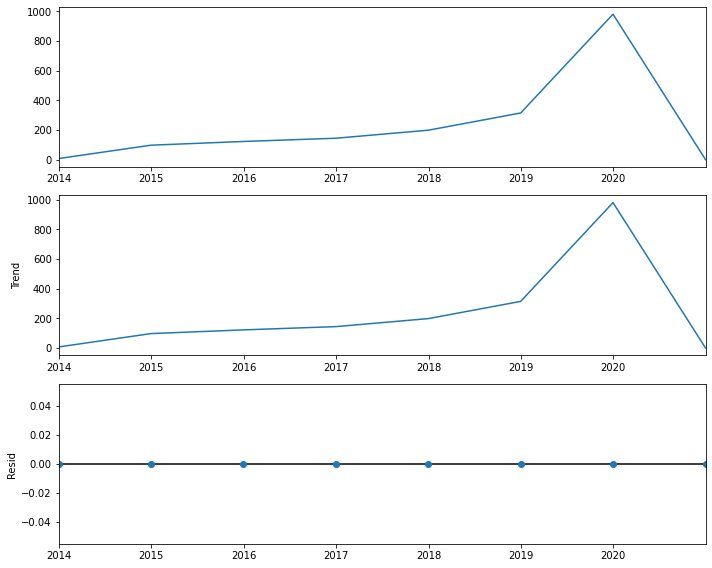

In [366]:
df_time_series_Y = df_time_series.resample('1Y').sum()
result_Y = seasonal_decompose(df_time_series_Y, model='additive')
fig = result_Y.plot(seasonal=False)
fig.set_size_inches((10, 8))
# Tight layout to realign things
fig.tight_layout()
print('Yearly seasonal')
plt.show()

We see general increase in churn over years. will add it also as a feature. 

Let's check the seasonality over month.

Monthly seasonal all years


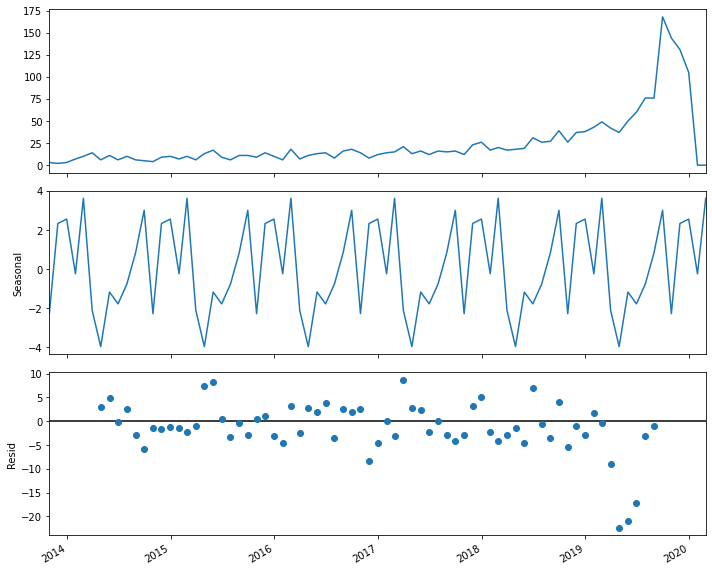

In [367]:
df_time_series_M = df_time_series['2015-01':'2020-01']
df_time_series_M = df_time_series.resample('1M').sum()
result_M = seasonal_decompose(df_time_series_M, model='additive')
fig= result_M.plot(
    observed=True,
    seasonal=True,
    trend=False,
    resid=True,
    weights=False
)
fig.set_size_inches((10, 8))
fig.autofmt_xdate()

# Tight layout to realign things
fig.tight_layout()
print('Monthly seasonal all years')
plt.show()

There is a clear seasonality with the month so we will add it also as a feature

## Multivariate EDA

Check how numerical features affect by churn rate - target

In [368]:
px.scatter(
    data_frame=df_merged.replace(to_replace={0:'No', 1:'Yes'}),
    x='begin_date', y='monthly_charges', color='churn'
)

We can see that monthly charge don't cross 120 (no high outliers) and most churn happen for late join users and to users with high monthly charge.

In [369]:
px.scatter(
    data_frame=df_merged.replace(to_replace={0:'No', 1:'Yes'}),
    x='begin_date', y='total_charges', color='churn'
)

Again we see that most churn happen for the late users. We observed this trend in the time series EDA. 

C:\Users\nirga\AppData\Local\Temp/ipykernel_6552/4061678451.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



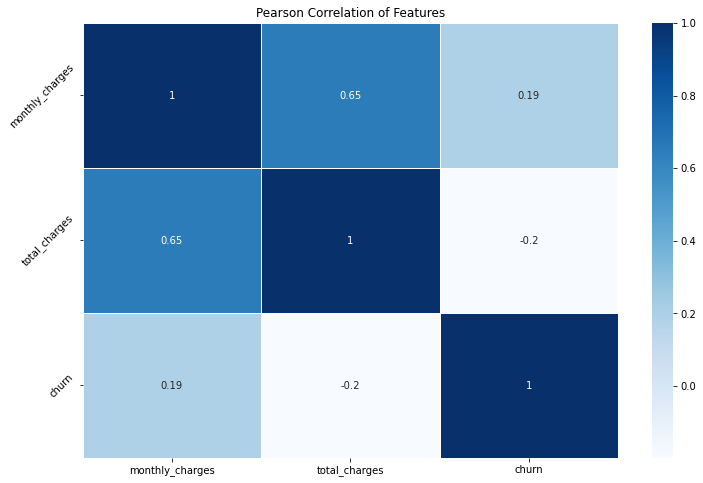

In [370]:
# Pearson correlation for numerical features

corr = df_merged.corr()

f, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(corr, cmap="Blues", annot=True, square=False, ax=ax,  linewidth = 1)
plt.title('Pearson Correlation of Features')
plt.yticks(rotation=45);

as we have seen the total and monthly charge correlate and there is also small relation to the churn

# Feature engineering

## Add new features

In [371]:
# change to yes no the senior_citizen
df_merged['senior_citizen'] = df_merged['senior_citizen'].replace(to_replace={0:'No', 1:'Yes'})

In [372]:
# create new boolean column
df_merged['Male'] = df_merged['gender'].replace(to_replace={'Female':'No', 'Male':'Yes'})

In [373]:
features_for_ohe_yes_no = [
   'paperless_billing', 'online_security', 'online_backup', 'device_protection',
   'tech_support', 'streaming_tv', 'streaming_movies', 'senior_citizen',
   'partner', 'dependents', 'Male'
]

In [374]:
# change all yes no to 1 0
df_merged[features_for_ohe_yes_no] = df_merged[features_for_ohe_yes_no].replace(
    to_replace={'No':0, 'Yes':1}
)

In [375]:
# OHE for internet_service and remove the no as it is same as dsl == 0 and fiber_optic == 0
df_merged['dsl'] = pd.get_dummies(
    df_merged['internet_service'])['DSL']
df_merged['fiber_optic'] = pd.get_dummies(
    df_merged['internet_service'])['Fiber optic']

In [376]:
# ohe for 'type' and 'payment_method'
columns_for_ohe = ['type', 'payment_method']
df_merged_ohe = pd.get_dummies(df_merged[columns_for_ohe], drop_first=True)
df_merged = df_merged.join(df_merged_ohe)

In [377]:
# add month and year feature

df_time_series_for_month_year_feature = pd.read_csv('contract.csv', index_col=['BeginDate'], parse_dates=['BeginDate'])
df_time_series_for_month_year_feature['month'] = df_time_series_for_month_year_feature.index.month
df_time_series_for_month_year_feature['year'] = df_time_series_for_month_year_feature.index.year
df_time_series_for_month_year_feature.reset_index(inplace=True)

df_merged['month'] = df_time_series_for_month_year_feature['month']
df_merged['year'] = df_time_series_for_month_year_feature['year']

# Prepare data for modeling

## Split train and test

In [378]:
features_columns = [
    'paperless_billing', 'monthly_charges', 'total_charges',
    'online_security', 'online_backup',
    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
    'senior_citizen', 'partner', 'dependents', 'multiple_lines',
    'Male', 'dsl', 'fiber_optic', 'type_One year', 'type_Two year',
    'payment_method_Credit card (automatic)',
    'payment_method_Electronic check', 'payment_method_Mailed check',
    'month', 'year'
]

target_column = ['churn']

In [379]:

target = df_merged[target_column]
features = df_merged[features_columns]
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345, stratify=df_merged['churn']
)

In [380]:
target = df_merged[target_column]
features = df_merged[features_columns]
train, test = train_test_split(
    df_merged, test_size=0.2, random_state=12345, stratify=df_merged['churn']
)

In [381]:
# check if stratify worked
round(train['churn'].sum() / len(train), 3) == round(test['churn'].sum() / len(test), 3)

True

In [382]:
train['churn'].sum() / len(train['churn'])

0.2653532126375577

## Balance class

In [383]:
# class count
class_count_0, class_count_1 = train['churn'].value_counts()

# Separate class
class_0 = train[train['churn'] == 0]
class_1 = train[train['churn'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (4139, 31)
class 1: (1495, 31)


total class of 1 and 0: 1    4139
0    4139
Name: churn, dtype: int64


<AxesSubplot: title={'center': 'count (target)'}>

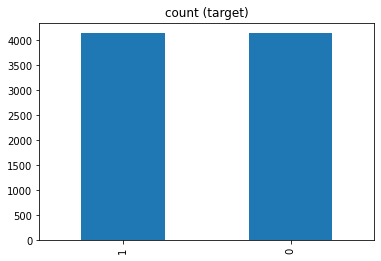

In [384]:
class_1_over = class_1.sample(class_count_0, replace=True)

train_over_sample = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",train_over_sample['churn'].value_counts())# plot the count after over-sampeling
train_over_sample['churn'].value_counts().plot(kind='bar', title='count (target)')

## Create features and target

features_columns = [
    'paperless_billing', 'monthly_charges', 'total_charges',
    'online_security', 'online_backup',
    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
    'senior_citizen', 'partner', 'dependents', 'multiple_lines',
    'Male', 'dsl', 'fiber_optic', 'type_One year', 'type_Two year',
    'payment_method_Credit card (automatic)',
    'payment_method_Electronic check', 'payment_method_Mailed check',
    'month', 'year'
]

target_column = ['churn']

In [385]:
X_train = train_over_sample[features_columns]
X_test = test[features_columns]

y_train = train_over_sample[target_column]
y_test = test[target_column]

In [386]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8278, 23), (1409, 23), (8278, 1), (1409, 1))

### Features importance

In [387]:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(features_train, target_train)

C:\Users\nirga\AppData\Local\Temp/ipykernel_6552/1530143891.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(random_state=0)

In [388]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.022 seconds


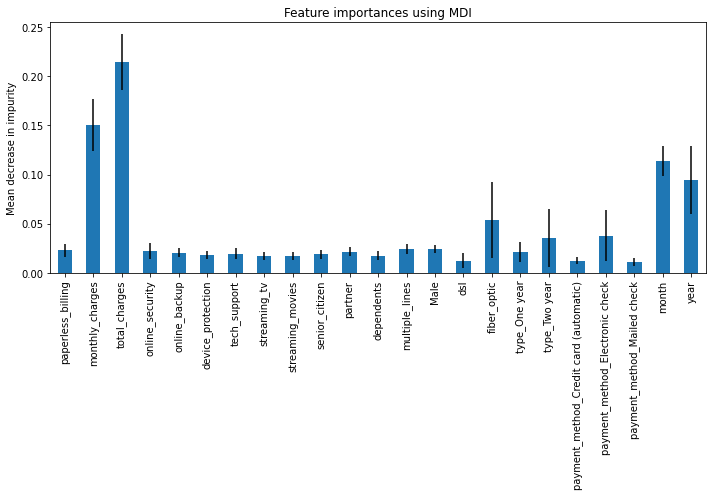

In [389]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
default_x_ticks = range(len(features_train.columns))
plt.xticks(default_x_ticks, features_train.columns)
fig.set_size_inches(10, 7)
fig.tight_layout();

# Model training

In [390]:
# create df to store results
results_df = pd.DataFrame(columns=['model_name', 'roc_auc', 'accuracy'])

In [391]:
def append_to_score_df(model_name, roc_auc, accuracy):
    row_val = [model_name, round(roc_auc, 3), round(accuracy, 3)]
    results_df.loc[len(results_df)] = row_val
    print(results_df)

## Decision Tree Classifier

### Hyperparameters tunning

In [392]:
# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [393]:
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()

In [394]:
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(
    estimator=tree, param_distributions=param_dist, cv=5, scoring='roc_auc'
)

In [395]:
tree_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027F13432A60>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027F0E7BB790>},
                   scoring='roc_auc')

In [396]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 3}
Best score is 0.9039951227875578


### model fit on train set

In [397]:
tree_tunned = DecisionTreeClassifier(
    criterion=tree_cv.best_params_['criterion'],
    max_depth=tree_cv.best_params_['max_depth'],
    min_samples_leaf=tree_cv.best_params_['min_samples_leaf'],
    max_features=tree_cv.best_params_['max_features'],
)

In [398]:
tree_tunned.fit(
    X=X_train, y=y_train, 
)

DecisionTreeClassifier(criterion='entropy', max_features=7, min_samples_leaf=3)

### roc-auc for test set

In [399]:

def plot_roc_auc_and_calculate_scoring_functions(tunned_model, X_test_temp, y_test_temp):

    # calculate probabilities
    probabilities_test = tunned_model.predict_proba(X_test_temp)
    probabilities_one_test = probabilities_test[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_temp, probabilities_one_test)
    
    plt.figure()

    # < plot the graph >
    plt.plot(fpr, tpr)

    # ROC curve for random model (looks like a straight line)
    plt.plot([0, 1], [0, 1], linestyle='--')

    # < use the functions plt.xlim() and plt.ylim() to
    #   set the boundary for the axes from 0 to 1 >
    plt.xlim([0, 1])
    plt.ylim([0, 1])

    # < use the functions plt.xlabel() and plt.ylabel() to
    #   name the axes "False Positive Rate" and "True Positive Rate" >
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # < add the heading "ROC curve" with the function plt.title() >
    plt.title('ROC curve')

    plt.show();    
    
    roc_auc = roc_auc_score(y_test_temp, probabilities_one_test)
    print('The roc_auc score is: {:.3f}'.format(roc_auc))

    predicted_test = tunned_model.predict(X_test_temp)
    accuracy_test = accuracy_score(y_test_temp, predicted_test)
    print('The accuracy_test score is: {:.3f}'.format(accuracy_test))
    
    return roc_auc, accuracy_test

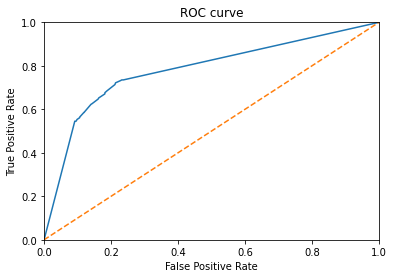

The roc_auc score is: 0.781
The accuracy_test score is: 0.788


In [400]:
roc_auc, accuracy_test = plot_roc_auc_and_calculate_scoring_functions(
    tunned_model=tree_tunned, X_test_temp=X_test, y_test_temp=y_test
)

In [401]:
append_to_score_df('Decision Tree Classifier', roc_auc, accuracy_test)

                 model_name  roc_auc  accuracy
0  Decision Tree Classifier    0.781     0.788


## Logistic Regression

### Hyperparameters tunning

In [402]:
# Instantiating LogisticRegression
logistic = LogisticRegression(random_state=12345)

In [403]:
max_iter = range(100, 500)
solver = ['lbfgs', 'newton-cg', 'liblinear']
warm_start = [True, False]
C = np.arange(0, 1, 0.01)
param_dist ={
    'max_iter' : max_iter,
    'warm_start' : warm_start,
    'solver' : solver,
    'C' : C,
}

In [404]:
# Instantiating RandomizedSearchCV object
logistic_cv = RandomizedSearchCV(
    estimator=logistic, param_distributions=param_dist, cv=5, scoring='roc_auc'
)

In [405]:
logistic_cv.fit(X_train, y_train)

C:\Users\nirga\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\nirga\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

C:\Users\nirga\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\Users\nirga\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\Users\nirga\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\nirga\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C

C:\Users\nirga\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

C:\Users\nirga\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\Users\nirga\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\Users\nirga\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\nirga\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\nirga\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

C:\Users\nirga\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning

C:\Users\nirga\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\Users\nirga\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\nirga\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\nirga\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

C:\Users\nirga\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\Users\nirga\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

C:\Users\nirga\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning

C:\Users\nirga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\nirga\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\nirga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=12345),
                   param_distributions={'C': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0...52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                                        'max_iter': range(100, 500),
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear'],
           

In [406]:
# Print the tuned parameters and score
print("Tuned LogisticRegression Parameters: {}".format(logistic_cv.best_params_))
print("Best score is {}".format(logistic_cv.best_score_))

Tuned LogisticRegression Parameters: {'warm_start': True, 'solver': 'newton-cg', 'max_iter': 480, 'C': 0.89}
Best score is 0.8438041571308463


### model fit on train set

In [407]:
logistic_tunned = LogisticRegression(
    warm_start = logistic_cv.best_params_['warm_start'],
    solver = logistic_cv.best_params_['solver'],
    max_iter = logistic_cv.best_params_['max_iter'],
    C = logistic_cv.best_params_['C'],
)

In [408]:
logistic_tunned.fit(
    X=X_train, y=y_train,
)

C:\Users\nirga\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\nirga\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning:

Rounding errors prevent the line search from converging

C:\Users\nirga\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

C:\Users\nirga\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed



LogisticRegression(C=0.89, max_iter=480, solver='newton-cg', warm_start=True)

### roc-auc for test set

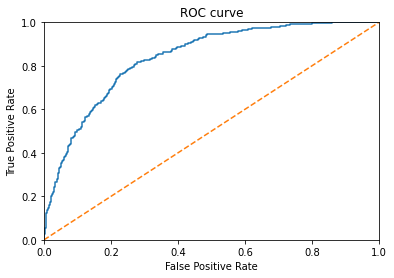

The roc_auc score is: 0.838
The accuracy_test score is: 0.754


In [409]:
roc_auc, accuracy_test = plot_roc_auc_and_calculate_scoring_functions(
    tunned_model=logistic_tunned, X_test_temp=X_test, y_test_temp=y_test
)

In [410]:
append_to_score_df('Logistic Regression', roc_auc, accuracy_test)

                 model_name  roc_auc  accuracy
0  Decision Tree Classifier    0.781     0.788
1       Logistic Regression    0.838     0.754


## Cat Boost Classifier

### Hyperparameters tunning

In [411]:
CBC = CatBoostClassifier(random_state=12345)

In [412]:
depth = range(4, 10)
learning_rate = [0.03,0.001,0.01,0.1,0.2,0.3]
iterations = [250,100,500,1000]
l2_leaf_reg = [3,1,5,10,100]
border_count = [32,5,10,20,50,100,200]
param_dist ={
    'depth' : depth,
    'learning_rate' : learning_rate,
    'iterations' : iterations,
    'l2_leaf_reg' : l2_leaf_reg,
    'border_count' : border_count
}

In [413]:
# Instantiating RandomizedSearchCV object
CBC_cv = RandomizedSearchCV(
    estimator=CBC, param_distributions=param_dist, cv=5, scoring='roc_auc'
)

In [414]:
X_train_cbc = X_train.copy()
X_test_cbc = X_test.copy()

In [415]:
category_for_catboost = ['paperless_billing', 'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'senior_citizen', 'partner',
       'dependents', 'multiple_lines', 'Male']

In [416]:
for feature in category_for_catboost:
    X_train_cbc[feature] = X_train_cbc[feature].astype('uint8')
    
for feature in category_for_catboost:
    X_test_cbc[feature] = X_test_cbc[feature].astype('uint8')

In [417]:
CBC_cv.fit(X_train_cbc, y_train)

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.6882866	total: 34ms	remaining: 8.47s
1:	learn: 0.6843553	total: 37.9ms	remaining: 4.7s
2:	learn: 0.6796916	total: 41.1ms	remaining: 3.39s
3:	learn: 0.6755503	total: 44.4ms	remaining: 2.73s
4:	learn: 0.6717902	total: 47.6ms	remaining: 2.33s
5:	learn: 0.6677972	total: 50.7ms	remaining: 2.06s
6:	learn: 0.6640049	total: 54.3ms	remaining: 1.89s
7:	learn: 0.6598453	total: 58.2ms	remaining: 1.76s
8:	learn: 0.6561179	total: 74.3ms	remaining: 1.99s
9:	learn: 0.6524344	total: 77.4ms	remaining: 1.86s
10:	learn: 0.6485903	total: 80.8ms	remaining: 1.76s
11:	learn: 0.6451402	total: 85.1ms	remaining: 1.69s
12:	learn: 0.6419173	total: 88.7ms	remaining: 1.62s
13:	learn: 0.6388337	total: 104ms	remaining: 1.75s
14:	learn: 0.6357161	total: 108ms	remaining: 1.69s
15:	learn: 0.6320477	total: 111ms	remaining: 1.63s
16:	learn: 0.6288232	total: 115ms	remaining: 1.58s
17:	learn: 0.6258885	total: 119ms	remaining: 1.54s
18:	learn: 0.6228587	total: 123ms	remaining: 1.5s
19:	learn: 0.6200379	total: 126m

194:	learn: 0.4555303	total: 943ms	remaining: 266ms
195:	learn: 0.4552953	total: 946ms	remaining: 261ms
196:	learn: 0.4551112	total: 949ms	remaining: 255ms
197:	learn: 0.4548864	total: 952ms	remaining: 250ms
198:	learn: 0.4546793	total: 957ms	remaining: 245ms
199:	learn: 0.4543668	total: 960ms	remaining: 240ms
200:	learn: 0.4542075	total: 963ms	remaining: 235ms
201:	learn: 0.4539645	total: 967ms	remaining: 230ms
202:	learn: 0.4536712	total: 971ms	remaining: 225ms
203:	learn: 0.4533263	total: 976ms	remaining: 220ms
204:	learn: 0.4529039	total: 979ms	remaining: 215ms
205:	learn: 0.4526839	total: 982ms	remaining: 210ms
206:	learn: 0.4524938	total: 988ms	remaining: 205ms
207:	learn: 0.4522320	total: 993ms	remaining: 200ms
208:	learn: 0.4519814	total: 996ms	remaining: 195ms
209:	learn: 0.4517520	total: 1000ms	remaining: 190ms
210:	learn: 0.4515702	total: 1s	remaining: 186ms
211:	learn: 0.4513673	total: 1.01s	remaining: 181ms
212:	learn: 0.4510730	total: 1.01s	remaining: 176ms
213:	learn: 0.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



17:	learn: 0.6254661	total: 71.1ms	remaining: 917ms
18:	learn: 0.6225609	total: 74.2ms	remaining: 902ms
19:	learn: 0.6199864	total: 76.9ms	remaining: 885ms
20:	learn: 0.6171440	total: 79.9ms	remaining: 872ms
21:	learn: 0.6144292	total: 83.5ms	remaining: 865ms
22:	learn: 0.6118288	total: 86.8ms	remaining: 856ms
23:	learn: 0.6090386	total: 90ms	remaining: 847ms
24:	learn: 0.6066833	total: 93.4ms	remaining: 840ms
25:	learn: 0.6040178	total: 96.4ms	remaining: 830ms
26:	learn: 0.6017478	total: 110ms	remaining: 906ms
27:	learn: 0.5997238	total: 113ms	remaining: 896ms
28:	learn: 0.5971617	total: 118ms	remaining: 896ms
29:	learn: 0.5950627	total: 124ms	remaining: 912ms
30:	learn: 0.5927561	total: 127ms	remaining: 900ms
31:	learn: 0.5904796	total: 131ms	remaining: 893ms
32:	learn: 0.5883517	total: 134ms	remaining: 881ms
33:	learn: 0.5860321	total: 137ms	remaining: 869ms
34:	learn: 0.5840026	total: 140ms	remaining: 859ms
35:	learn: 0.5819295	total: 143ms	remaining: 849ms
36:	learn: 0.5801196	tot

184:	learn: 0.4652227	total: 604ms	remaining: 212ms
185:	learn: 0.4650038	total: 608ms	remaining: 209ms
186:	learn: 0.4646193	total: 611ms	remaining: 206ms
187:	learn: 0.4643140	total: 614ms	remaining: 203ms
188:	learn: 0.4640207	total: 617ms	remaining: 199ms
189:	learn: 0.4636624	total: 621ms	remaining: 196ms
190:	learn: 0.4634035	total: 624ms	remaining: 193ms
191:	learn: 0.4631273	total: 627ms	remaining: 190ms
192:	learn: 0.4629337	total: 630ms	remaining: 186ms
193:	learn: 0.4627264	total: 634ms	remaining: 183ms
194:	learn: 0.4623503	total: 651ms	remaining: 183ms
195:	learn: 0.4621329	total: 654ms	remaining: 180ms
196:	learn: 0.4617155	total: 657ms	remaining: 177ms
197:	learn: 0.4613187	total: 660ms	remaining: 173ms
198:	learn: 0.4611269	total: 663ms	remaining: 170ms
199:	learn: 0.4608273	total: 667ms	remaining: 167ms
200:	learn: 0.4606486	total: 671ms	remaining: 163ms
201:	learn: 0.4604322	total: 674ms	remaining: 160ms
202:	learn: 0.4601016	total: 677ms	remaining: 157ms
203:	learn: 

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



8:	learn: 0.6576169	total: 35.6ms	remaining: 954ms
9:	learn: 0.6537926	total: 38.5ms	remaining: 925ms
10:	learn: 0.6502532	total: 41.6ms	remaining: 904ms
11:	learn: 0.6467250	total: 44.7ms	remaining: 887ms
12:	learn: 0.6430984	total: 48ms	remaining: 875ms
13:	learn: 0.6398009	total: 51.1ms	remaining: 861ms
14:	learn: 0.6367511	total: 54.5ms	remaining: 855ms
15:	learn: 0.6333498	total: 57.8ms	remaining: 846ms
16:	learn: 0.6300799	total: 61ms	remaining: 836ms
17:	learn: 0.6272859	total: 64ms	remaining: 825ms
18:	learn: 0.6244934	total: 66.9ms	remaining: 813ms
19:	learn: 0.6219794	total: 69.8ms	remaining: 803ms
20:	learn: 0.6192184	total: 73.1ms	remaining: 798ms
21:	learn: 0.6165413	total: 77.2ms	remaining: 800ms
22:	learn: 0.6139415	total: 80.1ms	remaining: 791ms
23:	learn: 0.6111426	total: 83ms	remaining: 781ms
24:	learn: 0.6087913	total: 85.8ms	remaining: 772ms
25:	learn: 0.6064914	total: 89.1ms	remaining: 767ms
26:	learn: 0.6042000	total: 92.2ms	remaining: 761ms
27:	learn: 0.6021883	t

209:	learn: 0.4616375	total: 745ms	remaining: 142ms
210:	learn: 0.4611953	total: 748ms	remaining: 138ms
211:	learn: 0.4609378	total: 753ms	remaining: 135ms
212:	learn: 0.4606314	total: 756ms	remaining: 131ms
213:	learn: 0.4604099	total: 760ms	remaining: 128ms
214:	learn: 0.4600585	total: 764ms	remaining: 124ms
215:	learn: 0.4598478	total: 768ms	remaining: 121ms
216:	learn: 0.4595698	total: 771ms	remaining: 117ms
217:	learn: 0.4593669	total: 775ms	remaining: 114ms
218:	learn: 0.4591702	total: 778ms	remaining: 110ms
219:	learn: 0.4589724	total: 797ms	remaining: 109ms
220:	learn: 0.4587629	total: 800ms	remaining: 105ms
221:	learn: 0.4583931	total: 803ms	remaining: 101ms
222:	learn: 0.4581698	total: 806ms	remaining: 97.6ms
223:	learn: 0.4579731	total: 810ms	remaining: 94ms
224:	learn: 0.4577136	total: 813ms	remaining: 90.4ms
225:	learn: 0.4575281	total: 817ms	remaining: 86.7ms
226:	learn: 0.4573050	total: 820ms	remaining: 83.1ms
227:	learn: 0.4571446	total: 823ms	remaining: 79.4ms
228:	lea

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.6887802	total: 4.22ms	remaining: 1.05s
1:	learn: 0.6849129	total: 7.3ms	remaining: 906ms
2:	learn: 0.6804901	total: 9.98ms	remaining: 822ms
3:	learn: 0.6761981	total: 12.8ms	remaining: 790ms
4:	learn: 0.6716119	total: 16.7ms	remaining: 817ms
5:	learn: 0.6677894	total: 19.4ms	remaining: 790ms
6:	learn: 0.6637870	total: 22.3ms	remaining: 773ms
7:	learn: 0.6598364	total: 25.2ms	remaining: 763ms
8:	learn: 0.6562854	total: 28.1ms	remaining: 752ms
9:	learn: 0.6528842	total: 31.8ms	remaining: 762ms
10:	learn: 0.6491986	total: 34.5ms	remaining: 749ms
11:	learn: 0.6454979	total: 37.3ms	remaining: 739ms
12:	learn: 0.6424643	total: 40.2ms	remaining: 732ms
13:	learn: 0.6393668	total: 42.9ms	remaining: 724ms
14:	learn: 0.6363273	total: 46ms	remaining: 721ms
15:	learn: 0.6327171	total: 49.1ms	remaining: 718ms
16:	learn: 0.6292669	total: 52ms	remaining: 713ms
17:	learn: 0.6263666	total: 54.8ms	remaining: 707ms
18:	learn: 0.6235161	total: 57.7ms	remaining: 702ms
19:	learn: 0.6209509	total:

160:	learn: 0.4724622	total: 527ms	remaining: 291ms
161:	learn: 0.4721384	total: 530ms	remaining: 288ms
162:	learn: 0.4717941	total: 533ms	remaining: 284ms
163:	learn: 0.4715266	total: 536ms	remaining: 281ms
164:	learn: 0.4712025	total: 540ms	remaining: 278ms
165:	learn: 0.4708851	total: 543ms	remaining: 275ms
166:	learn: 0.4703903	total: 546ms	remaining: 271ms
167:	learn: 0.4700312	total: 549ms	remaining: 268ms
168:	learn: 0.4697662	total: 552ms	remaining: 265ms
169:	learn: 0.4695302	total: 555ms	remaining: 261ms
170:	learn: 0.4691174	total: 558ms	remaining: 258ms
171:	learn: 0.4686253	total: 561ms	remaining: 255ms
172:	learn: 0.4682735	total: 564ms	remaining: 251ms
173:	learn: 0.4680116	total: 567ms	remaining: 248ms
174:	learn: 0.4678190	total: 570ms	remaining: 244ms
175:	learn: 0.4674881	total: 573ms	remaining: 241ms
176:	learn: 0.4672345	total: 576ms	remaining: 238ms
177:	learn: 0.4669614	total: 579ms	remaining: 234ms
178:	learn: 0.4666575	total: 582ms	remaining: 231ms
179:	learn: 

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.6887181	total: 4.52ms	remaining: 1.13s
1:	learn: 0.6849882	total: 7.3ms	remaining: 905ms
2:	learn: 0.6807419	total: 10.1ms	remaining: 833ms
3:	learn: 0.6766166	total: 12.9ms	remaining: 794ms
4:	learn: 0.6732711	total: 15.8ms	remaining: 774ms
5:	learn: 0.6695957	total: 18.7ms	remaining: 762ms
6:	learn: 0.6661902	total: 21.9ms	remaining: 759ms
7:	learn: 0.6620303	total: 24.5ms	remaining: 740ms
8:	learn: 0.6586182	total: 27.1ms	remaining: 727ms
9:	learn: 0.6546172	total: 29.8ms	remaining: 716ms
10:	learn: 0.6510592	total: 32.5ms	remaining: 707ms
11:	learn: 0.6475069	total: 35.7ms	remaining: 709ms
12:	learn: 0.6437061	total: 38.5ms	remaining: 702ms
13:	learn: 0.6407117	total: 41.3ms	remaining: 696ms
14:	learn: 0.6372386	total: 44.2ms	remaining: 693ms
15:	learn: 0.6342854	total: 47ms	remaining: 687ms
16:	learn: 0.6313779	total: 49.9ms	remaining: 684ms
17:	learn: 0.6285180	total: 59.7ms	remaining: 769ms
18:	learn: 0.6255724	total: 62.3ms	remaining: 758ms
19:	learn: 0.6227574	tota

160:	learn: 0.4766665	total: 551ms	remaining: 305ms
161:	learn: 0.4763509	total: 554ms	remaining: 301ms
162:	learn: 0.4759938	total: 558ms	remaining: 298ms
163:	learn: 0.4756818	total: 561ms	remaining: 294ms
164:	learn: 0.4754829	total: 564ms	remaining: 291ms
165:	learn: 0.4751387	total: 567ms	remaining: 287ms
166:	learn: 0.4747522	total: 571ms	remaining: 284ms
167:	learn: 0.4743447	total: 575ms	remaining: 280ms
168:	learn: 0.4740569	total: 578ms	remaining: 277ms
169:	learn: 0.4737463	total: 580ms	remaining: 273ms
170:	learn: 0.4732513	total: 584ms	remaining: 270ms
171:	learn: 0.4729460	total: 587ms	remaining: 266ms
172:	learn: 0.4725143	total: 590ms	remaining: 263ms
173:	learn: 0.4722577	total: 593ms	remaining: 259ms
174:	learn: 0.4719754	total: 596ms	remaining: 255ms
175:	learn: 0.4716329	total: 599ms	remaining: 252ms
176:	learn: 0.4713713	total: 602ms	remaining: 248ms
177:	learn: 0.4710979	total: 605ms	remaining: 245ms
178:	learn: 0.4706992	total: 608ms	remaining: 241ms
179:	learn: 

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.5925382	total: 13ms	remaining: 6.51s
1:	learn: 0.5393142	total: 30.4ms	remaining: 7.56s
2:	learn: 0.5071679	total: 37.9ms	remaining: 6.28s
3:	learn: 0.4850283	total: 44ms	remaining: 5.45s
4:	learn: 0.4579052	total: 48.8ms	remaining: 4.83s
5:	learn: 0.4490268	total: 53.3ms	remaining: 4.39s
6:	learn: 0.4369201	total: 73.2ms	remaining: 5.15s
7:	learn: 0.4275635	total: 78.2ms	remaining: 4.81s
8:	learn: 0.4204557	total: 83.1ms	remaining: 4.53s
9:	learn: 0.4135377	total: 104ms	remaining: 5.07s
10:	learn: 0.4086564	total: 109ms	remaining: 4.84s
11:	learn: 0.4047499	total: 113ms	remaining: 4.61s
12:	learn: 0.4005170	total: 118ms	remaining: 4.42s
13:	learn: 0.3943294	total: 123ms	remaining: 4.29s
14:	learn: 0.3894222	total: 133ms	remaining: 4.3s
15:	learn: 0.3854920	total: 138ms	remaining: 4.18s
16:	learn: 0.3806661	total: 143ms	remaining: 4.06s
17:	learn: 0.3756904	total: 163ms	remaining: 4.37s
18:	learn: 0.3713222	total: 178ms	remaining: 4.5s
19:	learn: 0.3685503	total: 183ms	rema

179:	learn: 0.1226381	total: 1.77s	remaining: 3.15s
180:	learn: 0.1221750	total: 1.78s	remaining: 3.13s
181:	learn: 0.1215097	total: 1.78s	remaining: 3.11s
182:	learn: 0.1210638	total: 1.79s	remaining: 3.09s
183:	learn: 0.1203133	total: 1.79s	remaining: 3.08s
184:	learn: 0.1197869	total: 1.81s	remaining: 3.08s
185:	learn: 0.1189415	total: 1.83s	remaining: 3.08s
186:	learn: 0.1181624	total: 1.83s	remaining: 3.07s
187:	learn: 0.1175772	total: 1.84s	remaining: 3.05s
188:	learn: 0.1171158	total: 1.84s	remaining: 3.04s
189:	learn: 0.1162641	total: 1.85s	remaining: 3.02s
190:	learn: 0.1159110	total: 1.85s	remaining: 3s
191:	learn: 0.1152322	total: 1.87s	remaining: 3s
192:	learn: 0.1148920	total: 1.89s	remaining: 3s
193:	learn: 0.1143083	total: 1.9s	remaining: 3s
194:	learn: 0.1139037	total: 1.91s	remaining: 2.99s
195:	learn: 0.1131207	total: 1.92s	remaining: 2.97s
196:	learn: 0.1123385	total: 1.93s	remaining: 2.97s
197:	learn: 0.1114198	total: 1.94s	remaining: 2.96s
198:	learn: 0.1105624	tot

343:	learn: 0.0608439	total: 3.31s	remaining: 1.5s
344:	learn: 0.0607062	total: 3.32s	remaining: 1.49s
345:	learn: 0.0606109	total: 3.33s	remaining: 1.48s
346:	learn: 0.0604403	total: 3.33s	remaining: 1.47s
347:	learn: 0.0603344	total: 3.34s	remaining: 1.46s
348:	learn: 0.0601727	total: 3.34s	remaining: 1.45s
349:	learn: 0.0599086	total: 3.35s	remaining: 1.43s
350:	learn: 0.0597157	total: 3.35s	remaining: 1.42s
351:	learn: 0.0596435	total: 3.36s	remaining: 1.41s
352:	learn: 0.0594291	total: 3.37s	remaining: 1.4s
353:	learn: 0.0592704	total: 3.38s	remaining: 1.39s
354:	learn: 0.0591148	total: 3.38s	remaining: 1.38s
355:	learn: 0.0589460	total: 3.39s	remaining: 1.37s
356:	learn: 0.0587997	total: 3.4s	remaining: 1.36s
357:	learn: 0.0583982	total: 3.41s	remaining: 1.35s
358:	learn: 0.0581716	total: 3.44s	remaining: 1.35s
359:	learn: 0.0579881	total: 3.44s	remaining: 1.34s
360:	learn: 0.0578429	total: 3.45s	remaining: 1.33s
361:	learn: 0.0577760	total: 3.46s	remaining: 1.32s
362:	learn: 0.0

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



10:	learn: 0.4123240	total: 68.4ms	remaining: 3.04s
11:	learn: 0.4084503	total: 72.5ms	remaining: 2.95s
12:	learn: 0.4008826	total: 78.3ms	remaining: 2.93s
13:	learn: 0.3952657	total: 93.2ms	remaining: 3.23s
14:	learn: 0.3916044	total: 97.6ms	remaining: 3.15s
15:	learn: 0.3874646	total: 102ms	remaining: 3.08s
16:	learn: 0.3845678	total: 125ms	remaining: 3.55s
17:	learn: 0.3802462	total: 133ms	remaining: 3.56s
18:	learn: 0.3759708	total: 140ms	remaining: 3.55s
19:	learn: 0.3730005	total: 156ms	remaining: 3.74s
20:	learn: 0.3689296	total: 187ms	remaining: 4.27s
21:	learn: 0.3634469	total: 196ms	remaining: 4.25s
22:	learn: 0.3591706	total: 218ms	remaining: 4.51s
23:	learn: 0.3565719	total: 225ms	remaining: 4.46s
24:	learn: 0.3537191	total: 231ms	remaining: 4.39s
25:	learn: 0.3500991	total: 247ms	remaining: 4.5s
26:	learn: 0.3460031	total: 254ms	remaining: 4.44s
27:	learn: 0.3434040	total: 260ms	remaining: 4.38s
28:	learn: 0.3391196	total: 265ms	remaining: 4.3s
29:	learn: 0.3367526	total: 

192:	learn: 0.1158724	total: 1.75s	remaining: 2.79s
193:	learn: 0.1152877	total: 1.76s	remaining: 2.78s
194:	learn: 0.1148814	total: 1.77s	remaining: 2.77s
195:	learn: 0.1143475	total: 1.77s	remaining: 2.75s
196:	learn: 0.1137744	total: 1.78s	remaining: 2.73s
197:	learn: 0.1134729	total: 1.78s	remaining: 2.72s
198:	learn: 0.1132177	total: 1.79s	remaining: 2.7s
199:	learn: 0.1127423	total: 1.79s	remaining: 2.69s
200:	learn: 0.1124629	total: 1.8s	remaining: 2.67s
201:	learn: 0.1120002	total: 1.81s	remaining: 2.67s
202:	learn: 0.1115090	total: 1.81s	remaining: 2.65s
203:	learn: 0.1109446	total: 1.82s	remaining: 2.64s
204:	learn: 0.1105220	total: 1.82s	remaining: 2.62s
205:	learn: 0.1103318	total: 1.83s	remaining: 2.61s
206:	learn: 0.1097530	total: 1.83s	remaining: 2.59s
207:	learn: 0.1095723	total: 1.84s	remaining: 2.58s
208:	learn: 0.1092318	total: 1.84s	remaining: 2.56s
209:	learn: 0.1088305	total: 1.85s	remaining: 2.56s
210:	learn: 0.1084203	total: 1.86s	remaining: 2.54s
211:	learn: 0.

366:	learn: 0.0612060	total: 3.25s	remaining: 1.18s
367:	learn: 0.0610622	total: 3.25s	remaining: 1.17s
368:	learn: 0.0609218	total: 3.27s	remaining: 1.16s
369:	learn: 0.0608161	total: 3.29s	remaining: 1.15s
370:	learn: 0.0605887	total: 3.29s	remaining: 1.14s
371:	learn: 0.0603056	total: 3.3s	remaining: 1.14s
372:	learn: 0.0599571	total: 3.3s	remaining: 1.13s
373:	learn: 0.0597490	total: 3.31s	remaining: 1.11s
374:	learn: 0.0595861	total: 3.33s	remaining: 1.11s
375:	learn: 0.0594636	total: 3.36s	remaining: 1.11s
376:	learn: 0.0593037	total: 3.37s	remaining: 1.1s
377:	learn: 0.0590091	total: 3.39s	remaining: 1.09s
378:	learn: 0.0587684	total: 3.41s	remaining: 1.09s
379:	learn: 0.0585104	total: 3.41s	remaining: 1.08s
380:	learn: 0.0581487	total: 3.45s	remaining: 1.08s
381:	learn: 0.0580467	total: 3.46s	remaining: 1.07s
382:	learn: 0.0579144	total: 3.48s	remaining: 1.06s
383:	learn: 0.0577209	total: 3.5s	remaining: 1.06s
384:	learn: 0.0575359	total: 3.51s	remaining: 1.05s
385:	learn: 0.05

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.6056238	total: 6.7ms	remaining: 3.34s
1:	learn: 0.5437609	total: 14.2ms	remaining: 3.55s
2:	learn: 0.5151608	total: 29.3ms	remaining: 4.85s
3:	learn: 0.4932108	total: 33.4ms	remaining: 4.14s
4:	learn: 0.4650361	total: 63.3ms	remaining: 6.26s
5:	learn: 0.4562468	total: 72.1ms	remaining: 5.93s
6:	learn: 0.4438424	total: 78.4ms	remaining: 5.52s
7:	learn: 0.4314632	total: 84.2ms	remaining: 5.18s
8:	learn: 0.4248557	total: 89.3ms	remaining: 4.87s
9:	learn: 0.4181834	total: 107ms	remaining: 5.22s
10:	learn: 0.4129072	total: 122ms	remaining: 5.41s
11:	learn: 0.4051899	total: 129ms	remaining: 5.24s
12:	learn: 0.4022129	total: 136ms	remaining: 5.1s
13:	learn: 0.3971567	total: 152ms	remaining: 5.27s
14:	learn: 0.3894746	total: 159ms	remaining: 5.15s
15:	learn: 0.3852866	total: 167ms	remaining: 5.04s
16:	learn: 0.3798897	total: 172ms	remaining: 4.89s
17:	learn: 0.3742122	total: 177ms	remaining: 4.74s
18:	learn: 0.3703483	total: 182ms	remaining: 4.6s
19:	learn: 0.3664585	total: 187ms	r

184:	learn: 0.1149122	total: 1.68s	remaining: 2.86s
185:	learn: 0.1139839	total: 1.68s	remaining: 2.84s
186:	learn: 0.1132167	total: 1.71s	remaining: 2.87s
187:	learn: 0.1129197	total: 1.73s	remaining: 2.87s
188:	learn: 0.1123827	total: 1.73s	remaining: 2.85s
189:	learn: 0.1117367	total: 1.74s	remaining: 2.83s
190:	learn: 0.1111125	total: 1.76s	remaining: 2.84s
191:	learn: 0.1104641	total: 1.76s	remaining: 2.83s
192:	learn: 0.1098584	total: 1.77s	remaining: 2.82s
193:	learn: 0.1094801	total: 1.79s	remaining: 2.82s
194:	learn: 0.1089574	total: 1.79s	remaining: 2.81s
195:	learn: 0.1083240	total: 1.8s	remaining: 2.79s
196:	learn: 0.1075389	total: 1.8s	remaining: 2.78s
197:	learn: 0.1071960	total: 1.81s	remaining: 2.76s
198:	learn: 0.1067785	total: 1.81s	remaining: 2.74s
199:	learn: 0.1063865	total: 1.83s	remaining: 2.74s
200:	learn: 0.1057593	total: 1.83s	remaining: 2.73s
201:	learn: 0.1052168	total: 1.84s	remaining: 2.71s
202:	learn: 0.1047051	total: 1.84s	remaining: 2.7s
203:	learn: 0.1

358:	learn: 0.0593299	total: 3.35s	remaining: 1.32s
359:	learn: 0.0591155	total: 3.36s	remaining: 1.31s
360:	learn: 0.0588368	total: 3.36s	remaining: 1.29s
361:	learn: 0.0587003	total: 3.37s	remaining: 1.28s
362:	learn: 0.0585373	total: 3.37s	remaining: 1.27s
363:	learn: 0.0583794	total: 3.38s	remaining: 1.26s
364:	learn: 0.0581920	total: 3.38s	remaining: 1.25s
365:	learn: 0.0580192	total: 3.39s	remaining: 1.24s
366:	learn: 0.0577347	total: 3.39s	remaining: 1.23s
367:	learn: 0.0575677	total: 3.4s	remaining: 1.22s
368:	learn: 0.0572334	total: 3.41s	remaining: 1.21s
369:	learn: 0.0570132	total: 3.43s	remaining: 1.2s
370:	learn: 0.0567502	total: 3.44s	remaining: 1.2s
371:	learn: 0.0566066	total: 3.45s	remaining: 1.19s
372:	learn: 0.0564709	total: 3.46s	remaining: 1.18s
373:	learn: 0.0563554	total: 3.46s	remaining: 1.17s
374:	learn: 0.0562755	total: 3.47s	remaining: 1.16s
375:	learn: 0.0561088	total: 3.48s	remaining: 1.15s
376:	learn: 0.0560197	total: 3.48s	remaining: 1.14s
377:	learn: 0.0

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.6002428	total: 9.41ms	remaining: 4.69s
1:	learn: 0.5457886	total: 14ms	remaining: 3.49s
2:	learn: 0.5091119	total: 18.6ms	remaining: 3.09s
3:	learn: 0.4884951	total: 23.4ms	remaining: 2.9s
4:	learn: 0.4710890	total: 30.5ms	remaining: 3.02s
5:	learn: 0.4567468	total: 46.4ms	remaining: 3.82s
6:	learn: 0.4466498	total: 51.4ms	remaining: 3.62s
7:	learn: 0.4357116	total: 56.6ms	remaining: 3.48s
8:	learn: 0.4294017	total: 61.3ms	remaining: 3.34s
9:	learn: 0.4232185	total: 77.8ms	remaining: 3.81s
10:	learn: 0.4165789	total: 83.5ms	remaining: 3.71s
11:	learn: 0.4127867	total: 88.7ms	remaining: 3.61s
12:	learn: 0.4036082	total: 93.1ms	remaining: 3.49s
13:	learn: 0.3984460	total: 97.4ms	remaining: 3.38s
14:	learn: 0.3947498	total: 102ms	remaining: 3.29s
15:	learn: 0.3882361	total: 123ms	remaining: 3.71s
16:	learn: 0.3818793	total: 129ms	remaining: 3.67s
17:	learn: 0.3770357	total: 135ms	remaining: 3.63s
18:	learn: 0.3713123	total: 141ms	remaining: 3.56s
19:	learn: 0.3680069	total: 14

173:	learn: 0.1222281	total: 1.53s	remaining: 2.87s
174:	learn: 0.1218186	total: 1.55s	remaining: 2.88s
175:	learn: 0.1213632	total: 1.57s	remaining: 2.88s
176:	learn: 0.1205890	total: 1.58s	remaining: 2.89s
177:	learn: 0.1199556	total: 1.59s	remaining: 2.88s
178:	learn: 0.1195555	total: 1.6s	remaining: 2.86s
179:	learn: 0.1190108	total: 1.6s	remaining: 2.85s
180:	learn: 0.1187798	total: 1.63s	remaining: 2.87s
181:	learn: 0.1180882	total: 1.64s	remaining: 2.87s
182:	learn: 0.1174592	total: 1.65s	remaining: 2.86s
183:	learn: 0.1170542	total: 1.67s	remaining: 2.87s
184:	learn: 0.1162421	total: 1.68s	remaining: 2.86s
185:	learn: 0.1160158	total: 1.7s	remaining: 2.87s
186:	learn: 0.1156075	total: 1.71s	remaining: 2.86s
187:	learn: 0.1148673	total: 1.72s	remaining: 2.85s
188:	learn: 0.1144775	total: 1.73s	remaining: 2.85s
189:	learn: 0.1140156	total: 1.75s	remaining: 2.85s
190:	learn: 0.1133046	total: 1.75s	remaining: 2.84s
191:	learn: 0.1128430	total: 1.76s	remaining: 2.83s
192:	learn: 0.1

335:	learn: 0.0626456	total: 3.03s	remaining: 1.48s
336:	learn: 0.0623317	total: 3.04s	remaining: 1.47s
337:	learn: 0.0621727	total: 3.04s	remaining: 1.46s
338:	learn: 0.0620323	total: 3.05s	remaining: 1.45s
339:	learn: 0.0618183	total: 3.06s	remaining: 1.44s
340:	learn: 0.0615247	total: 3.06s	remaining: 1.43s
341:	learn: 0.0613022	total: 3.06s	remaining: 1.42s
342:	learn: 0.0610137	total: 3.07s	remaining: 1.41s
343:	learn: 0.0608486	total: 3.08s	remaining: 1.39s
344:	learn: 0.0607395	total: 3.09s	remaining: 1.39s
345:	learn: 0.0604268	total: 3.09s	remaining: 1.38s
346:	learn: 0.0602748	total: 3.1s	remaining: 1.36s
347:	learn: 0.0600100	total: 3.1s	remaining: 1.35s
348:	learn: 0.0596414	total: 3.1s	remaining: 1.34s
349:	learn: 0.0594129	total: 3.12s	remaining: 1.33s
350:	learn: 0.0592114	total: 3.12s	remaining: 1.32s
351:	learn: 0.0589713	total: 3.13s	remaining: 1.31s
352:	learn: 0.0588023	total: 3.15s	remaining: 1.31s
353:	learn: 0.0585721	total: 3.16s	remaining: 1.3s
354:	learn: 0.05

498:	learn: 0.0383273	total: 4.33s	remaining: 8.69ms
499:	learn: 0.0381909	total: 4.34s	remaining: 0us
0:	learn: 0.6026114	total: 13.4ms	remaining: 6.69s
1:	learn: 0.5431410	total: 17.7ms	remaining: 4.4s
2:	learn: 0.5079636	total: 26.3ms	remaining: 4.36s
3:	learn: 0.4895738	total: 42.1ms	remaining: 5.22s
4:	learn: 0.4739927	total: 58.4ms	remaining: 5.78s
5:	learn: 0.4643509	total: 72.8ms	remaining: 6s
6:	learn: 0.4516930	total: 89ms	remaining: 6.27s
7:	learn: 0.4424765	total: 105ms	remaining: 6.47s
8:	learn: 0.4336072	total: 113ms	remaining: 6.17s


C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



9:	learn: 0.4260580	total: 121ms	remaining: 5.91s
10:	learn: 0.4218290	total: 127ms	remaining: 5.63s
11:	learn: 0.4158710	total: 145ms	remaining: 5.92s
12:	learn: 0.4091466	total: 151ms	remaining: 5.64s
13:	learn: 0.4059817	total: 163ms	remaining: 5.67s
14:	learn: 0.4013839	total: 197ms	remaining: 6.36s
15:	learn: 0.3932249	total: 203ms	remaining: 6.16s
16:	learn: 0.3895162	total: 228ms	remaining: 6.49s
17:	learn: 0.3840866	total: 235ms	remaining: 6.3s
18:	learn: 0.3838875	total: 255ms	remaining: 6.45s
19:	learn: 0.3800501	total: 274ms	remaining: 6.57s
20:	learn: 0.3760756	total: 281ms	remaining: 6.42s
21:	learn: 0.3721489	total: 303ms	remaining: 6.59s
22:	learn: 0.3671911	total: 312ms	remaining: 6.46s
23:	learn: 0.3630913	total: 319ms	remaining: 6.33s
24:	learn: 0.3604376	total: 334ms	remaining: 6.34s
25:	learn: 0.3568774	total: 342ms	remaining: 6.23s
26:	learn: 0.3531959	total: 347ms	remaining: 6.09s
27:	learn: 0.3496652	total: 353ms	remaining: 5.96s
28:	learn: 0.3433373	total: 362ms

188:	learn: 0.1172048	total: 1.85s	remaining: 3.05s
189:	learn: 0.1167234	total: 1.86s	remaining: 3.03s
190:	learn: 0.1163335	total: 1.86s	remaining: 3.01s
191:	learn: 0.1159435	total: 1.86s	remaining: 2.99s
192:	learn: 0.1155708	total: 1.87s	remaining: 2.98s
193:	learn: 0.1149651	total: 1.88s	remaining: 2.96s
194:	learn: 0.1146672	total: 1.88s	remaining: 2.94s
195:	learn: 0.1142566	total: 1.88s	remaining: 2.92s
196:	learn: 0.1135378	total: 1.89s	remaining: 2.9s
197:	learn: 0.1131636	total: 1.89s	remaining: 2.89s
198:	learn: 0.1125241	total: 1.91s	remaining: 2.89s
199:	learn: 0.1122231	total: 1.92s	remaining: 2.88s
200:	learn: 0.1114404	total: 1.94s	remaining: 2.89s
201:	learn: 0.1106969	total: 1.95s	remaining: 2.88s
202:	learn: 0.1100050	total: 1.96s	remaining: 2.87s
203:	learn: 0.1096424	total: 1.97s	remaining: 2.86s
204:	learn: 0.1090218	total: 1.99s	remaining: 2.86s
205:	learn: 0.1086045	total: 1.99s	remaining: 2.85s
206:	learn: 0.1078299	total: 2s	remaining: 2.83s
207:	learn: 0.10

360:	learn: 0.0606280	total: 3.37s	remaining: 1.3s
361:	learn: 0.0605170	total: 3.38s	remaining: 1.29s
362:	learn: 0.0603442	total: 3.38s	remaining: 1.28s
363:	learn: 0.0602215	total: 3.39s	remaining: 1.26s
364:	learn: 0.0601329	total: 3.39s	remaining: 1.25s
365:	learn: 0.0599454	total: 3.4s	remaining: 1.24s
366:	learn: 0.0598057	total: 3.4s	remaining: 1.23s
367:	learn: 0.0594654	total: 3.41s	remaining: 1.22s
368:	learn: 0.0592554	total: 3.43s	remaining: 1.22s
369:	learn: 0.0591160	total: 3.44s	remaining: 1.21s
370:	learn: 0.0588976	total: 3.44s	remaining: 1.2s
371:	learn: 0.0586921	total: 3.46s	remaining: 1.19s
372:	learn: 0.0585084	total: 3.48s	remaining: 1.18s
373:	learn: 0.0583386	total: 3.48s	remaining: 1.17s
374:	learn: 0.0581206	total: 3.49s	remaining: 1.16s
375:	learn: 0.0578378	total: 3.5s	remaining: 1.15s
376:	learn: 0.0576384	total: 3.5s	remaining: 1.14s
377:	learn: 0.0574104	total: 3.51s	remaining: 1.13s
378:	learn: 0.0572048	total: 3.51s	remaining: 1.12s
379:	learn: 0.0571

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



34:	learn: 0.4409930	total: 96.1ms	remaining: 179ms
35:	learn: 0.4408816	total: 98.5ms	remaining: 175ms
36:	learn: 0.4407385	total: 102ms	remaining: 173ms
37:	learn: 0.4393572	total: 104ms	remaining: 170ms
38:	learn: 0.4379656	total: 107ms	remaining: 168ms
39:	learn: 0.4371156	total: 110ms	remaining: 165ms
40:	learn: 0.4360515	total: 113ms	remaining: 163ms
41:	learn: 0.4359418	total: 116ms	remaining: 161ms
42:	learn: 0.4358510	total: 119ms	remaining: 157ms
43:	learn: 0.4344780	total: 122ms	remaining: 155ms
44:	learn: 0.4334721	total: 124ms	remaining: 152ms
45:	learn: 0.4327431	total: 127ms	remaining: 149ms
46:	learn: 0.4324096	total: 130ms	remaining: 146ms
47:	learn: 0.4320875	total: 133ms	remaining: 144ms
48:	learn: 0.4307753	total: 136ms	remaining: 141ms
49:	learn: 0.4297883	total: 138ms	remaining: 138ms
50:	learn: 0.4295337	total: 141ms	remaining: 135ms
51:	learn: 0.4287847	total: 143ms	remaining: 132ms
52:	learn: 0.4287420	total: 146ms	remaining: 129ms
53:	learn: 0.4279015	total: 1

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.6547324	total: 3.56ms	remaining: 352ms
1:	learn: 0.6261187	total: 7.07ms	remaining: 346ms
2:	learn: 0.6015258	total: 9.68ms	remaining: 313ms
3:	learn: 0.5838858	total: 12.8ms	remaining: 307ms
4:	learn: 0.5645042	total: 15.7ms	remaining: 298ms
5:	learn: 0.5501042	total: 18.8ms	remaining: 295ms
6:	learn: 0.5390771	total: 21.9ms	remaining: 291ms
7:	learn: 0.5283943	total: 24.8ms	remaining: 285ms
8:	learn: 0.5221546	total: 27.8ms	remaining: 281ms
9:	learn: 0.5131407	total: 30.7ms	remaining: 276ms
10:	learn: 0.5053174	total: 33.3ms	remaining: 269ms
11:	learn: 0.4985741	total: 35.8ms	remaining: 263ms
12:	learn: 0.4932765	total: 38.5ms	remaining: 258ms
13:	learn: 0.4877855	total: 41ms	remaining: 252ms
14:	learn: 0.4823366	total: 44ms	remaining: 250ms
15:	learn: 0.4795378	total: 46.5ms	remaining: 244ms
16:	learn: 0.4769759	total: 49ms	remaining: 239ms
17:	learn: 0.4735271	total: 51.6ms	remaining: 235ms
18:	learn: 0.4712802	total: 54.1ms	remaining: 231ms
19:	learn: 0.4690422	total: 

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



19:	learn: 0.4725180	total: 50.2ms	remaining: 201ms
20:	learn: 0.4702600	total: 52.9ms	remaining: 199ms
21:	learn: 0.4671602	total: 56.1ms	remaining: 199ms
22:	learn: 0.4655200	total: 58.5ms	remaining: 196ms
23:	learn: 0.4629293	total: 61.2ms	remaining: 194ms
24:	learn: 0.4616298	total: 63.7ms	remaining: 191ms
25:	learn: 0.4595530	total: 66.4ms	remaining: 189ms
26:	learn: 0.4593815	total: 69ms	remaining: 187ms
27:	learn: 0.4584532	total: 72.5ms	remaining: 186ms
28:	learn: 0.4583006	total: 74.6ms	remaining: 183ms
29:	learn: 0.4554438	total: 77.2ms	remaining: 180ms
30:	learn: 0.4539831	total: 79.5ms	remaining: 177ms
31:	learn: 0.4529207	total: 82.1ms	remaining: 175ms
32:	learn: 0.4516451	total: 84.6ms	remaining: 172ms
33:	learn: 0.4494290	total: 87.2ms	remaining: 169ms
34:	learn: 0.4492916	total: 89.5ms	remaining: 166ms
35:	learn: 0.4480367	total: 91.9ms	remaining: 163ms
36:	learn: 0.4449589	total: 94.3ms	remaining: 161ms
37:	learn: 0.4435373	total: 96.7ms	remaining: 158ms
38:	learn: 0.4

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



36:	learn: 0.4420693	total: 142ms	remaining: 242ms
37:	learn: 0.4410810	total: 145ms	remaining: 237ms
38:	learn: 0.4407885	total: 148ms	remaining: 232ms
39:	learn: 0.4390032	total: 152ms	remaining: 228ms
40:	learn: 0.4382455	total: 171ms	remaining: 246ms
41:	learn: 0.4372387	total: 175ms	remaining: 241ms
42:	learn: 0.4371851	total: 177ms	remaining: 235ms
43:	learn: 0.4364046	total: 180ms	remaining: 229ms
44:	learn: 0.4357762	total: 183ms	remaining: 223ms
45:	learn: 0.4357280	total: 185ms	remaining: 217ms
46:	learn: 0.4348157	total: 189ms	remaining: 213ms
47:	learn: 0.4337977	total: 191ms	remaining: 207ms
48:	learn: 0.4333247	total: 194ms	remaining: 202ms
49:	learn: 0.4326730	total: 197ms	remaining: 197ms
50:	learn: 0.4324908	total: 199ms	remaining: 192ms
51:	learn: 0.4319468	total: 202ms	remaining: 187ms
52:	learn: 0.4309898	total: 205ms	remaining: 182ms
53:	learn: 0.4304606	total: 208ms	remaining: 177ms
54:	learn: 0.4297675	total: 211ms	remaining: 173ms
55:	learn: 0.4286866	total: 214

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



46:	learn: 0.4406816	total: 125ms	remaining: 140ms
47:	learn: 0.4398747	total: 127ms	remaining: 138ms
48:	learn: 0.4397795	total: 129ms	remaining: 135ms
49:	learn: 0.4394728	total: 132ms	remaining: 132ms
50:	learn: 0.4390025	total: 135ms	remaining: 130ms
51:	learn: 0.4381203	total: 138ms	remaining: 127ms
52:	learn: 0.4376218	total: 140ms	remaining: 125ms
53:	learn: 0.4375397	total: 143ms	remaining: 122ms
54:	learn: 0.4368020	total: 145ms	remaining: 119ms
55:	learn: 0.4358144	total: 148ms	remaining: 116ms
56:	learn: 0.4357427	total: 150ms	remaining: 114ms
57:	learn: 0.4350691	total: 154ms	remaining: 111ms
58:	learn: 0.4334023	total: 156ms	remaining: 108ms
59:	learn: 0.4322145	total: 159ms	remaining: 106ms
60:	learn: 0.4318067	total: 161ms	remaining: 103ms
61:	learn: 0.4313724	total: 164ms	remaining: 100ms
62:	learn: 0.4296192	total: 167ms	remaining: 97.9ms
63:	learn: 0.4295607	total: 169ms	remaining: 95.3ms
64:	learn: 0.4290682	total: 172ms	remaining: 92.8ms
65:	learn: 0.4281651	total: 

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



1:	learn: 0.6920859	total: 11ms	remaining: 5.47s
2:	learn: 0.6914993	total: 22ms	remaining: 7.33s
3:	learn: 0.6909683	total: 25.6ms	remaining: 6.38s
4:	learn: 0.6903861	total: 29.4ms	remaining: 5.86s
5:	learn: 0.6898144	total: 32.7ms	remaining: 5.42s
6:	learn: 0.6893141	total: 36.8ms	remaining: 5.23s
7:	learn: 0.6887126	total: 40.2ms	remaining: 4.98s
8:	learn: 0.6882262	total: 43.7ms	remaining: 4.81s
9:	learn: 0.6876485	total: 47.2ms	remaining: 4.67s
10:	learn: 0.6870650	total: 51.1ms	remaining: 4.59s
11:	learn: 0.6865772	total: 54.5ms	remaining: 4.49s
12:	learn: 0.6860636	total: 57.9ms	remaining: 4.4s
13:	learn: 0.6855363	total: 61.4ms	remaining: 4.32s
14:	learn: 0.6849726	total: 65.1ms	remaining: 4.27s
15:	learn: 0.6844834	total: 101ms	remaining: 6.21s
16:	learn: 0.6839297	total: 116ms	remaining: 6.69s
17:	learn: 0.6834437	total: 122ms	remaining: 6.68s
18:	learn: 0.6829678	total: 128ms	remaining: 6.62s
19:	learn: 0.6824145	total: 135ms	remaining: 6.61s
20:	learn: 0.6819366	total: 141

169:	learn: 0.6183708	total: 1.13s	remaining: 5.5s
170:	learn: 0.6179836	total: 1.14s	remaining: 5.55s
171:	learn: 0.6176584	total: 1.15s	remaining: 5.53s
172:	learn: 0.6173369	total: 1.15s	remaining: 5.51s
173:	learn: 0.6169233	total: 1.16s	remaining: 5.49s
174:	learn: 0.6165337	total: 1.16s	remaining: 5.46s
175:	learn: 0.6162003	total: 1.18s	remaining: 5.5s
176:	learn: 0.6158951	total: 1.18s	remaining: 5.49s
177:	learn: 0.6155570	total: 1.18s	remaining: 5.47s
178:	learn: 0.6152190	total: 1.19s	remaining: 5.44s
179:	learn: 0.6148327	total: 1.19s	remaining: 5.42s
180:	learn: 0.6144697	total: 1.19s	remaining: 5.4s
181:	learn: 0.6141989	total: 1.2s	remaining: 5.38s
182:	learn: 0.6138360	total: 1.2s	remaining: 5.36s
183:	learn: 0.6135210	total: 1.2s	remaining: 5.33s
184:	learn: 0.6131425	total: 1.21s	remaining: 5.32s
185:	learn: 0.6128347	total: 1.22s	remaining: 5.34s
186:	learn: 0.6125151	total: 1.24s	remaining: 5.37s
187:	learn: 0.6121993	total: 1.24s	remaining: 5.36s
188:	learn: 0.6118

347:	learn: 0.5659855	total: 2.25s	remaining: 4.21s
348:	learn: 0.5657643	total: 2.25s	remaining: 4.2s
349:	learn: 0.5655477	total: 2.25s	remaining: 4.18s
350:	learn: 0.5653383	total: 2.26s	remaining: 4.17s
351:	learn: 0.5651228	total: 2.26s	remaining: 4.16s
352:	learn: 0.5648707	total: 2.26s	remaining: 4.15s
353:	learn: 0.5646512	total: 2.27s	remaining: 4.14s
354:	learn: 0.5644263	total: 2.27s	remaining: 4.13s
355:	learn: 0.5641598	total: 2.27s	remaining: 4.12s
356:	learn: 0.5639266	total: 2.28s	remaining: 4.11s
357:	learn: 0.5637255	total: 2.28s	remaining: 4.09s
358:	learn: 0.5634776	total: 2.29s	remaining: 4.08s
359:	learn: 0.5632428	total: 2.29s	remaining: 4.08s
360:	learn: 0.5630440	total: 2.3s	remaining: 4.07s
361:	learn: 0.5627996	total: 2.3s	remaining: 4.05s
362:	learn: 0.5625249	total: 2.31s	remaining: 4.05s
363:	learn: 0.5623202	total: 2.31s	remaining: 4.04s
364:	learn: 0.5621126	total: 2.32s	remaining: 4.03s
365:	learn: 0.5618620	total: 2.32s	remaining: 4.02s
366:	learn: 0.5

526:	learn: 0.5306309	total: 3.38s	remaining: 3.03s
527:	learn: 0.5304632	total: 3.38s	remaining: 3.03s
528:	learn: 0.5303121	total: 3.39s	remaining: 3.02s
529:	learn: 0.5301688	total: 3.39s	remaining: 3.01s
530:	learn: 0.5299974	total: 3.4s	remaining: 3s
531:	learn: 0.5298446	total: 3.4s	remaining: 2.99s
532:	learn: 0.5297003	total: 3.42s	remaining: 3s
533:	learn: 0.5295337	total: 3.43s	remaining: 2.99s
534:	learn: 0.5293808	total: 3.43s	remaining: 2.98s
535:	learn: 0.5292229	total: 3.45s	remaining: 2.99s
536:	learn: 0.5290422	total: 3.46s	remaining: 2.98s
537:	learn: 0.5289179	total: 3.46s	remaining: 2.97s
538:	learn: 0.5287255	total: 3.48s	remaining: 2.98s
539:	learn: 0.5285943	total: 3.5s	remaining: 2.98s
540:	learn: 0.5284554	total: 3.5s	remaining: 2.97s
541:	learn: 0.5283043	total: 3.51s	remaining: 2.96s
542:	learn: 0.5281590	total: 3.51s	remaining: 2.96s
543:	learn: 0.5280036	total: 3.53s	remaining: 2.96s
544:	learn: 0.5278612	total: 3.54s	remaining: 2.96s
545:	learn: 0.5276871	

698:	learn: 0.5065566	total: 4.49s	remaining: 1.94s
699:	learn: 0.5064461	total: 4.5s	remaining: 1.93s
700:	learn: 0.5063326	total: 4.5s	remaining: 1.92s
701:	learn: 0.5062283	total: 4.51s	remaining: 1.91s
702:	learn: 0.5061343	total: 4.51s	remaining: 1.91s
703:	learn: 0.5059904	total: 4.51s	remaining: 1.9s
704:	learn: 0.5058860	total: 4.54s	remaining: 1.9s
705:	learn: 0.5057824	total: 4.54s	remaining: 1.89s
706:	learn: 0.5056614	total: 4.54s	remaining: 1.88s
707:	learn: 0.5054992	total: 4.55s	remaining: 1.88s
708:	learn: 0.5053325	total: 4.55s	remaining: 1.87s
709:	learn: 0.5052178	total: 4.55s	remaining: 1.86s
710:	learn: 0.5050961	total: 4.56s	remaining: 1.85s
711:	learn: 0.5049368	total: 4.58s	remaining: 1.85s
712:	learn: 0.5048131	total: 4.58s	remaining: 1.84s
713:	learn: 0.5047058	total: 4.59s	remaining: 1.84s
714:	learn: 0.5046003	total: 4.6s	remaining: 1.83s
715:	learn: 0.5044748	total: 4.61s	remaining: 1.83s
716:	learn: 0.5043479	total: 4.62s	remaining: 1.82s
717:	learn: 0.504

869:	learn: 0.4886152	total: 5.78s	remaining: 864ms
870:	learn: 0.4885423	total: 5.79s	remaining: 858ms
871:	learn: 0.4884598	total: 5.81s	remaining: 853ms
872:	learn: 0.4883795	total: 5.81s	remaining: 846ms
873:	learn: 0.4883205	total: 5.82s	remaining: 839ms
874:	learn: 0.4882304	total: 5.82s	remaining: 832ms
875:	learn: 0.4881392	total: 5.83s	remaining: 825ms
876:	learn: 0.4880136	total: 5.83s	remaining: 818ms
877:	learn: 0.4879314	total: 5.84s	remaining: 812ms
878:	learn: 0.4878341	total: 5.87s	remaining: 808ms
879:	learn: 0.4877075	total: 5.89s	remaining: 803ms
880:	learn: 0.4876203	total: 5.89s	remaining: 796ms
881:	learn: 0.4875450	total: 5.9s	remaining: 790ms
882:	learn: 0.4874586	total: 5.92s	remaining: 784ms
883:	learn: 0.4873456	total: 5.92s	remaining: 777ms
884:	learn: 0.4872495	total: 5.93s	remaining: 771ms
885:	learn: 0.4871725	total: 5.95s	remaining: 765ms
886:	learn: 0.4870796	total: 5.96s	remaining: 760ms
887:	learn: 0.4869954	total: 5.97s	remaining: 753ms
888:	learn: 0

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.6926031	total: 4.99ms	remaining: 4.98s
1:	learn: 0.6920891	total: 9.63ms	remaining: 4.8s
2:	learn: 0.6915069	total: 13.9ms	remaining: 4.62s
3:	learn: 0.6908940	total: 21.4ms	remaining: 5.33s
4:	learn: 0.6903190	total: 26.6ms	remaining: 5.29s
5:	learn: 0.6898185	total: 33.6ms	remaining: 5.57s
6:	learn: 0.6893476	total: 38.8ms	remaining: 5.5s
7:	learn: 0.6888626	total: 43.8ms	remaining: 5.43s
8:	learn: 0.6883780	total: 49.3ms	remaining: 5.42s
9:	learn: 0.6878385	total: 55.5ms	remaining: 5.49s
10:	learn: 0.6872789	total: 59.8ms	remaining: 5.38s
11:	learn: 0.6868030	total: 67.8ms	remaining: 5.59s
12:	learn: 0.6862985	total: 71.9ms	remaining: 5.46s
13:	learn: 0.6857798	total: 77.2ms	remaining: 5.44s
14:	learn: 0.6852212	total: 82.1ms	remaining: 5.39s
15:	learn: 0.6847538	total: 86.7ms	remaining: 5.33s
16:	learn: 0.6842186	total: 90.8ms	remaining: 5.25s
17:	learn: 0.6836924	total: 95.5ms	remaining: 5.21s
18:	learn: 0.6832178	total: 113ms	remaining: 5.83s
19:	learn: 0.6826737	tota

171:	learn: 0.6182924	total: 1.29s	remaining: 6.2s
172:	learn: 0.6179285	total: 1.29s	remaining: 6.17s
173:	learn: 0.6175156	total: 1.29s	remaining: 6.14s
174:	learn: 0.6172151	total: 1.3s	remaining: 6.12s
175:	learn: 0.6168525	total: 1.3s	remaining: 6.1s
176:	learn: 0.6164713	total: 1.32s	remaining: 6.14s
177:	learn: 0.6162056	total: 1.32s	remaining: 6.11s
178:	learn: 0.6159026	total: 1.33s	remaining: 6.08s
179:	learn: 0.6155904	total: 1.33s	remaining: 6.06s
180:	learn: 0.6152080	total: 1.33s	remaining: 6.04s
181:	learn: 0.6148846	total: 1.35s	remaining: 6.08s
182:	learn: 0.6145221	total: 1.36s	remaining: 6.06s
183:	learn: 0.6141309	total: 1.36s	remaining: 6.04s
184:	learn: 0.6138195	total: 1.36s	remaining: 6.01s
185:	learn: 0.6134849	total: 1.37s	remaining: 5.99s
186:	learn: 0.6131632	total: 1.37s	remaining: 5.96s
187:	learn: 0.6128500	total: 1.38s	remaining: 5.94s
188:	learn: 0.6125484	total: 1.38s	remaining: 5.92s
189:	learn: 0.6121704	total: 1.38s	remaining: 5.9s
190:	learn: 0.611

334:	learn: 0.5717115	total: 2.18s	remaining: 4.32s
335:	learn: 0.5715208	total: 2.18s	remaining: 4.31s
336:	learn: 0.5712866	total: 2.18s	remaining: 4.3s
337:	learn: 0.5710561	total: 2.19s	remaining: 4.29s
338:	learn: 0.5708404	total: 2.19s	remaining: 4.28s
339:	learn: 0.5705872	total: 2.2s	remaining: 4.26s
340:	learn: 0.5703426	total: 2.2s	remaining: 4.25s
341:	learn: 0.5701246	total: 2.21s	remaining: 4.24s
342:	learn: 0.5699089	total: 2.21s	remaining: 4.23s
343:	learn: 0.5697205	total: 2.22s	remaining: 4.24s
344:	learn: 0.5695214	total: 2.23s	remaining: 4.23s
345:	learn: 0.5692879	total: 2.23s	remaining: 4.22s
346:	learn: 0.5690297	total: 2.23s	remaining: 4.21s
347:	learn: 0.5687690	total: 2.25s	remaining: 4.22s
348:	learn: 0.5684656	total: 2.26s	remaining: 4.21s
349:	learn: 0.5683245	total: 2.27s	remaining: 4.21s
350:	learn: 0.5681122	total: 2.29s	remaining: 4.22s
351:	learn: 0.5678670	total: 2.29s	remaining: 4.21s
352:	learn: 0.5675964	total: 2.29s	remaining: 4.2s
353:	learn: 0.56

509:	learn: 0.5370643	total: 3.07s	remaining: 2.95s
510:	learn: 0.5369117	total: 3.1s	remaining: 2.96s
511:	learn: 0.5367621	total: 3.1s	remaining: 2.95s
512:	learn: 0.5365605	total: 3.11s	remaining: 2.95s
513:	learn: 0.5364050	total: 3.11s	remaining: 2.94s
514:	learn: 0.5362317	total: 3.12s	remaining: 2.94s
515:	learn: 0.5360994	total: 3.12s	remaining: 2.93s
516:	learn: 0.5359081	total: 3.15s	remaining: 2.95s
517:	learn: 0.5357626	total: 3.16s	remaining: 2.94s
518:	learn: 0.5356084	total: 3.16s	remaining: 2.93s
519:	learn: 0.5354636	total: 3.17s	remaining: 2.92s
520:	learn: 0.5353210	total: 3.17s	remaining: 2.92s
521:	learn: 0.5351046	total: 3.17s	remaining: 2.91s
522:	learn: 0.5349588	total: 3.18s	remaining: 2.9s
523:	learn: 0.5348012	total: 3.18s	remaining: 2.89s
524:	learn: 0.5346233	total: 3.19s	remaining: 2.88s
525:	learn: 0.5344832	total: 3.19s	remaining: 2.88s
526:	learn: 0.5342958	total: 3.19s	remaining: 2.87s
527:	learn: 0.5341174	total: 3.2s	remaining: 2.86s
528:	learn: 0.53

668:	learn: 0.5141541	total: 3.97s	remaining: 1.96s
669:	learn: 0.5140396	total: 3.97s	remaining: 1.96s
670:	learn: 0.5139461	total: 3.98s	remaining: 1.95s
671:	learn: 0.5138174	total: 3.98s	remaining: 1.94s
672:	learn: 0.5137019	total: 3.98s	remaining: 1.94s
673:	learn: 0.5135874	total: 3.99s	remaining: 1.93s
674:	learn: 0.5134775	total: 3.99s	remaining: 1.92s
675:	learn: 0.5133582	total: 3.99s	remaining: 1.91s
676:	learn: 0.5132199	total: 4.01s	remaining: 1.91s
677:	learn: 0.5131057	total: 4.03s	remaining: 1.91s
678:	learn: 0.5130122	total: 4.03s	remaining: 1.91s
679:	learn: 0.5129090	total: 4.03s	remaining: 1.9s
680:	learn: 0.5128064	total: 4.04s	remaining: 1.89s
681:	learn: 0.5126932	total: 4.04s	remaining: 1.89s
682:	learn: 0.5125891	total: 4.05s	remaining: 1.88s
683:	learn: 0.5124631	total: 4.05s	remaining: 1.87s
684:	learn: 0.5123523	total: 4.05s	remaining: 1.86s
685:	learn: 0.5122466	total: 4.06s	remaining: 1.86s
686:	learn: 0.5121361	total: 4.06s	remaining: 1.85s
687:	learn: 0

844:	learn: 0.4958785	total: 4.86s	remaining: 891ms
845:	learn: 0.4957816	total: 4.86s	remaining: 885ms
846:	learn: 0.4956945	total: 4.86s	remaining: 879ms
847:	learn: 0.4955853	total: 4.87s	remaining: 873ms
848:	learn: 0.4955124	total: 4.87s	remaining: 867ms
849:	learn: 0.4954344	total: 4.88s	remaining: 861ms
850:	learn: 0.4953717	total: 4.88s	remaining: 855ms
851:	learn: 0.4952798	total: 4.89s	remaining: 849ms
852:	learn: 0.4951706	total: 4.89s	remaining: 843ms
853:	learn: 0.4950331	total: 4.9s	remaining: 838ms
854:	learn: 0.4949335	total: 4.9s	remaining: 832ms
855:	learn: 0.4948551	total: 4.91s	remaining: 826ms
856:	learn: 0.4947713	total: 4.91s	remaining: 820ms
857:	learn: 0.4946690	total: 4.92s	remaining: 814ms
858:	learn: 0.4946008	total: 4.92s	remaining: 808ms
859:	learn: 0.4945258	total: 4.92s	remaining: 802ms
860:	learn: 0.4944469	total: 4.93s	remaining: 796ms
861:	learn: 0.4943706	total: 4.93s	remaining: 790ms
862:	learn: 0.4942615	total: 4.94s	remaining: 784ms
863:	learn: 0.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



17:	learn: 0.6840289	total: 85.9ms	remaining: 4.69s
18:	learn: 0.6835628	total: 94.3ms	remaining: 4.87s
19:	learn: 0.6830606	total: 98.4ms	remaining: 4.82s
20:	learn: 0.6826207	total: 103ms	remaining: 4.79s
21:	learn: 0.6821665	total: 107ms	remaining: 4.74s
22:	learn: 0.6816320	total: 111ms	remaining: 4.71s
23:	learn: 0.6811462	total: 115ms	remaining: 4.68s
24:	learn: 0.6807061	total: 120ms	remaining: 4.68s
25:	learn: 0.6802829	total: 125ms	remaining: 4.68s
26:	learn: 0.6797567	total: 129ms	remaining: 4.66s
27:	learn: 0.6792250	total: 133ms	remaining: 4.63s
28:	learn: 0.6787261	total: 139ms	remaining: 4.67s
29:	learn: 0.6781996	total: 143ms	remaining: 4.62s
30:	learn: 0.6777100	total: 147ms	remaining: 4.6s
31:	learn: 0.6772589	total: 151ms	remaining: 4.57s
32:	learn: 0.6768200	total: 156ms	remaining: 4.57s
33:	learn: 0.6763271	total: 159ms	remaining: 4.53s
34:	learn: 0.6759238	total: 163ms	remaining: 4.49s
35:	learn: 0.6754005	total: 168ms	remaining: 4.51s
36:	learn: 0.6749625	total: 1

197:	learn: 0.6126379	total: 965ms	remaining: 3.91s
198:	learn: 0.6123340	total: 970ms	remaining: 3.9s
199:	learn: 0.6120325	total: 975ms	remaining: 3.9s
200:	learn: 0.6117452	total: 979ms	remaining: 3.89s
201:	learn: 0.6114410	total: 983ms	remaining: 3.88s
202:	learn: 0.6111547	total: 993ms	remaining: 3.9s
203:	learn: 0.6107915	total: 997ms	remaining: 3.89s
204:	learn: 0.6105574	total: 1s	remaining: 3.88s
205:	learn: 0.6102820	total: 1.01s	remaining: 3.88s
206:	learn: 0.6100042	total: 1.01s	remaining: 3.88s
207:	learn: 0.6097342	total: 1.01s	remaining: 3.87s
208:	learn: 0.6094371	total: 1.02s	remaining: 3.87s
209:	learn: 0.6090861	total: 1.03s	remaining: 3.87s
210:	learn: 0.6088073	total: 1.03s	remaining: 3.86s
211:	learn: 0.6085387	total: 1.04s	remaining: 3.86s
212:	learn: 0.6082002	total: 1.04s	remaining: 3.86s
213:	learn: 0.6078698	total: 1.05s	remaining: 3.86s
214:	learn: 0.6075796	total: 1.05s	remaining: 3.85s
215:	learn: 0.6072102	total: 1.06s	remaining: 3.85s
216:	learn: 0.6069

357:	learn: 0.5699026	total: 1.68s	remaining: 3.01s
358:	learn: 0.5696869	total: 1.68s	remaining: 3s
359:	learn: 0.5694757	total: 1.69s	remaining: 3s
360:	learn: 0.5693685	total: 1.69s	remaining: 2.99s
361:	learn: 0.5691914	total: 1.7s	remaining: 2.99s
362:	learn: 0.5689874	total: 1.7s	remaining: 2.99s
363:	learn: 0.5687591	total: 1.71s	remaining: 2.98s
364:	learn: 0.5685443	total: 1.71s	remaining: 2.98s
365:	learn: 0.5683499	total: 1.72s	remaining: 2.97s
366:	learn: 0.5681393	total: 1.72s	remaining: 2.97s
367:	learn: 0.5679211	total: 1.72s	remaining: 2.96s
368:	learn: 0.5676485	total: 1.73s	remaining: 2.96s
369:	learn: 0.5674213	total: 1.73s	remaining: 2.95s
370:	learn: 0.5672048	total: 1.74s	remaining: 2.95s
371:	learn: 0.5669415	total: 1.74s	remaining: 2.94s
372:	learn: 0.5667026	total: 1.75s	remaining: 2.94s
373:	learn: 0.5664492	total: 1.75s	remaining: 2.93s
374:	learn: 0.5662443	total: 1.75s	remaining: 2.93s
375:	learn: 0.5660305	total: 1.76s	remaining: 2.92s
376:	learn: 0.565833

543:	learn: 0.5357392	total: 2.57s	remaining: 2.16s
544:	learn: 0.5356004	total: 2.58s	remaining: 2.15s
545:	learn: 0.5354237	total: 2.58s	remaining: 2.15s
546:	learn: 0.5352537	total: 2.59s	remaining: 2.15s
547:	learn: 0.5350950	total: 2.6s	remaining: 2.14s
548:	learn: 0.5349666	total: 2.6s	remaining: 2.14s
549:	learn: 0.5348230	total: 2.61s	remaining: 2.13s
550:	learn: 0.5346824	total: 2.61s	remaining: 2.13s
551:	learn: 0.5345211	total: 2.62s	remaining: 2.13s
552:	learn: 0.5343652	total: 2.62s	remaining: 2.12s
553:	learn: 0.5342085	total: 2.63s	remaining: 2.12s
554:	learn: 0.5340728	total: 2.63s	remaining: 2.11s
555:	learn: 0.5339183	total: 2.64s	remaining: 2.11s
556:	learn: 0.5337962	total: 2.64s	remaining: 2.1s
557:	learn: 0.5336829	total: 2.65s	remaining: 2.1s
558:	learn: 0.5335181	total: 2.65s	remaining: 2.09s
559:	learn: 0.5333871	total: 2.66s	remaining: 2.09s
560:	learn: 0.5332313	total: 2.66s	remaining: 2.08s
561:	learn: 0.5330957	total: 2.67s	remaining: 2.08s
562:	learn: 0.53

723:	learn: 0.5124136	total: 3.46s	remaining: 1.32s
724:	learn: 0.5123024	total: 3.46s	remaining: 1.31s
725:	learn: 0.5122044	total: 3.47s	remaining: 1.31s
726:	learn: 0.5120905	total: 3.47s	remaining: 1.3s
727:	learn: 0.5119287	total: 3.48s	remaining: 1.3s
728:	learn: 0.5118143	total: 3.48s	remaining: 1.29s
729:	learn: 0.5117038	total: 3.49s	remaining: 1.29s
730:	learn: 0.5115885	total: 3.49s	remaining: 1.28s
731:	learn: 0.5114788	total: 3.5s	remaining: 1.28s
732:	learn: 0.5113462	total: 3.5s	remaining: 1.27s
733:	learn: 0.5112517	total: 3.51s	remaining: 1.27s
734:	learn: 0.5111656	total: 3.51s	remaining: 1.26s
735:	learn: 0.5110638	total: 3.52s	remaining: 1.26s
736:	learn: 0.5109288	total: 3.52s	remaining: 1.26s
737:	learn: 0.5107947	total: 3.53s	remaining: 1.25s
738:	learn: 0.5106596	total: 3.53s	remaining: 1.25s
739:	learn: 0.5105449	total: 3.54s	remaining: 1.24s
740:	learn: 0.5104200	total: 3.54s	remaining: 1.24s
741:	learn: 0.5103150	total: 3.55s	remaining: 1.23s
742:	learn: 0.51

915:	learn: 0.4936139	total: 4.36s	remaining: 400ms
916:	learn: 0.4935172	total: 4.36s	remaining: 395ms
917:	learn: 0.4934254	total: 4.37s	remaining: 390ms
918:	learn: 0.4933423	total: 4.37s	remaining: 385ms
919:	learn: 0.4932698	total: 4.38s	remaining: 381ms
920:	learn: 0.4931492	total: 4.38s	remaining: 376ms
921:	learn: 0.4930597	total: 4.39s	remaining: 371ms
922:	learn: 0.4929973	total: 4.39s	remaining: 367ms
923:	learn: 0.4929027	total: 4.4s	remaining: 362ms
924:	learn: 0.4928116	total: 4.41s	remaining: 357ms
925:	learn: 0.4927461	total: 4.41s	remaining: 353ms
926:	learn: 0.4926705	total: 4.42s	remaining: 348ms
927:	learn: 0.4925622	total: 4.42s	remaining: 343ms
928:	learn: 0.4924737	total: 4.42s	remaining: 338ms
929:	learn: 0.4923914	total: 4.43s	remaining: 333ms
930:	learn: 0.4923144	total: 4.43s	remaining: 329ms
931:	learn: 0.4922425	total: 4.44s	remaining: 324ms
932:	learn: 0.4921651	total: 4.44s	remaining: 319ms
933:	learn: 0.4920728	total: 4.45s	remaining: 314ms
934:	learn: 0

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



15:	learn: 0.6849880	total: 70.4ms	remaining: 4.33s
16:	learn: 0.6844692	total: 77.8ms	remaining: 4.5s
17:	learn: 0.6839816	total: 83.5ms	remaining: 4.56s
18:	learn: 0.6834012	total: 87.4ms	remaining: 4.51s
19:	learn: 0.6828241	total: 92.4ms	remaining: 4.53s
20:	learn: 0.6823757	total: 96.4ms	remaining: 4.49s
21:	learn: 0.6818776	total: 101ms	remaining: 4.49s
22:	learn: 0.6812844	total: 105ms	remaining: 4.44s
23:	learn: 0.6807315	total: 109ms	remaining: 4.45s
24:	learn: 0.6802440	total: 115ms	remaining: 4.5s
25:	learn: 0.6798063	total: 119ms	remaining: 4.46s
26:	learn: 0.6792534	total: 124ms	remaining: 4.49s
27:	learn: 0.6787547	total: 131ms	remaining: 4.55s
28:	learn: 0.6782153	total: 135ms	remaining: 4.53s
29:	learn: 0.6776797	total: 140ms	remaining: 4.52s
30:	learn: 0.6771740	total: 145ms	remaining: 4.52s
31:	learn: 0.6767113	total: 150ms	remaining: 4.54s
32:	learn: 0.6762440	total: 155ms	remaining: 4.54s
33:	learn: 0.6756932	total: 158ms	remaining: 4.5s
34:	learn: 0.6752745	total: 

206:	learn: 0.6064775	total: 962ms	remaining: 3.68s
207:	learn: 0.6062115	total: 966ms	remaining: 3.68s
208:	learn: 0.6058930	total: 972ms	remaining: 3.68s
209:	learn: 0.6055648	total: 976ms	remaining: 3.67s
210:	learn: 0.6052374	total: 980ms	remaining: 3.66s
211:	learn: 0.6049377	total: 986ms	remaining: 3.66s
212:	learn: 0.6045888	total: 991ms	remaining: 3.66s
213:	learn: 0.6042148	total: 995ms	remaining: 3.65s
214:	learn: 0.6038693	total: 1s	remaining: 3.66s
215:	learn: 0.6034850	total: 1.01s	remaining: 3.65s
216:	learn: 0.6031870	total: 1.01s	remaining: 3.65s
217:	learn: 0.6028862	total: 1.01s	remaining: 3.64s
218:	learn: 0.6025224	total: 1.02s	remaining: 3.64s
219:	learn: 0.6022116	total: 1.02s	remaining: 3.63s
220:	learn: 0.6019306	total: 1.03s	remaining: 3.63s
221:	learn: 0.6015549	total: 1.03s	remaining: 3.63s
222:	learn: 0.6012736	total: 1.04s	remaining: 3.62s
223:	learn: 0.6009590	total: 1.04s	remaining: 3.61s
224:	learn: 0.6006458	total: 1.05s	remaining: 3.61s
225:	learn: 0.6

406:	learn: 0.5548887	total: 1.85s	remaining: 2.69s
407:	learn: 0.5546761	total: 1.85s	remaining: 2.69s
408:	learn: 0.5544833	total: 1.86s	remaining: 2.69s
409:	learn: 0.5542765	total: 1.86s	remaining: 2.68s
410:	learn: 0.5540615	total: 1.87s	remaining: 2.68s
411:	learn: 0.5538678	total: 1.87s	remaining: 2.67s
412:	learn: 0.5536765	total: 1.87s	remaining: 2.66s
413:	learn: 0.5534577	total: 1.88s	remaining: 2.66s
414:	learn: 0.5532547	total: 1.88s	remaining: 2.65s
415:	learn: 0.5530619	total: 1.89s	remaining: 2.65s
416:	learn: 0.5528302	total: 1.89s	remaining: 2.65s
417:	learn: 0.5525919	total: 1.9s	remaining: 2.65s
418:	learn: 0.5523883	total: 1.91s	remaining: 2.64s
419:	learn: 0.5522142	total: 1.91s	remaining: 2.64s
420:	learn: 0.5520339	total: 1.92s	remaining: 2.64s
421:	learn: 0.5517856	total: 1.93s	remaining: 2.65s
422:	learn: 0.5515591	total: 1.94s	remaining: 2.65s
423:	learn: 0.5513652	total: 1.95s	remaining: 2.65s
424:	learn: 0.5511588	total: 1.95s	remaining: 2.64s
425:	learn: 0

565:	learn: 0.5272429	total: 2.71s	remaining: 2.08s
566:	learn: 0.5271064	total: 2.72s	remaining: 2.08s
567:	learn: 0.5269622	total: 2.72s	remaining: 2.07s
568:	learn: 0.5268031	total: 2.73s	remaining: 2.06s
569:	learn: 0.5266837	total: 2.73s	remaining: 2.06s
570:	learn: 0.5265457	total: 2.73s	remaining: 2.05s
571:	learn: 0.5264167	total: 2.74s	remaining: 2.05s
572:	learn: 0.5262728	total: 2.75s	remaining: 2.04s
573:	learn: 0.5261084	total: 2.75s	remaining: 2.04s
574:	learn: 0.5259534	total: 2.75s	remaining: 2.04s
575:	learn: 0.5258296	total: 2.76s	remaining: 2.03s
576:	learn: 0.5257044	total: 2.76s	remaining: 2.03s
577:	learn: 0.5255835	total: 2.77s	remaining: 2.02s
578:	learn: 0.5254354	total: 2.77s	remaining: 2.02s
579:	learn: 0.5253370	total: 2.77s	remaining: 2.01s
580:	learn: 0.5252096	total: 2.78s	remaining: 2s
581:	learn: 0.5250754	total: 2.78s	remaining: 2s
582:	learn: 0.5249410	total: 2.79s	remaining: 1.99s
583:	learn: 0.5248190	total: 2.79s	remaining: 1.99s
584:	learn: 0.5246

758:	learn: 0.5032837	total: 3.6s	remaining: 1.14s
759:	learn: 0.5031715	total: 3.6s	remaining: 1.14s
760:	learn: 0.5030691	total: 3.61s	remaining: 1.13s
761:	learn: 0.5029803	total: 3.61s	remaining: 1.13s
762:	learn: 0.5028639	total: 3.62s	remaining: 1.12s
763:	learn: 0.5027537	total: 3.62s	remaining: 1.12s
764:	learn: 0.5026291	total: 3.63s	remaining: 1.11s
765:	learn: 0.5025230	total: 3.63s	remaining: 1.11s
766:	learn: 0.5024276	total: 3.63s	remaining: 1.1s
767:	learn: 0.5023285	total: 3.64s	remaining: 1.1s
768:	learn: 0.5022152	total: 3.64s	remaining: 1.09s
769:	learn: 0.5021263	total: 3.65s	remaining: 1.09s
770:	learn: 0.5020200	total: 3.65s	remaining: 1.08s
771:	learn: 0.5019525	total: 3.65s	remaining: 1.08s
772:	learn: 0.5018358	total: 3.66s	remaining: 1.07s
773:	learn: 0.5017499	total: 3.66s	remaining: 1.07s
774:	learn: 0.5016228	total: 3.67s	remaining: 1.06s
775:	learn: 0.5015275	total: 3.67s	remaining: 1.06s
776:	learn: 0.5014031	total: 3.68s	remaining: 1.05s
777:	learn: 0.50

945:	learn: 0.4859092	total: 4.49s	remaining: 256ms
946:	learn: 0.4858482	total: 4.49s	remaining: 252ms
947:	learn: 0.4857614	total: 4.5s	remaining: 247ms
948:	learn: 0.4856718	total: 4.5s	remaining: 242ms
949:	learn: 0.4855940	total: 4.51s	remaining: 237ms
950:	learn: 0.4855134	total: 4.51s	remaining: 232ms
951:	learn: 0.4854351	total: 4.52s	remaining: 228ms
952:	learn: 0.4853603	total: 4.52s	remaining: 223ms
953:	learn: 0.4852914	total: 4.53s	remaining: 218ms
954:	learn: 0.4852266	total: 4.53s	remaining: 213ms
955:	learn: 0.4851132	total: 4.53s	remaining: 209ms
956:	learn: 0.4850257	total: 4.54s	remaining: 204ms
957:	learn: 0.4849425	total: 4.54s	remaining: 199ms
958:	learn: 0.4848302	total: 4.55s	remaining: 195ms
959:	learn: 0.4847691	total: 4.55s	remaining: 190ms
960:	learn: 0.4846940	total: 4.56s	remaining: 185ms
961:	learn: 0.4846184	total: 4.57s	remaining: 180ms
962:	learn: 0.4845509	total: 4.57s	remaining: 176ms
963:	learn: 0.4844755	total: 4.58s	remaining: 171ms
964:	learn: 0.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



3:	learn: 0.6909982	total: 21.6ms	remaining: 5.38s
4:	learn: 0.6904410	total: 27.1ms	remaining: 5.39s
5:	learn: 0.6898804	total: 31.1ms	remaining: 5.15s
6:	learn: 0.6894305	total: 34.3ms	remaining: 4.87s
7:	learn: 0.6889738	total: 38.2ms	remaining: 4.74s
8:	learn: 0.6884444	total: 44.5ms	remaining: 4.91s
9:	learn: 0.6879751	total: 48.4ms	remaining: 4.79s
10:	learn: 0.6874325	total: 53.6ms	remaining: 4.82s
11:	learn: 0.6869673	total: 60ms	remaining: 4.94s
12:	learn: 0.6864915	total: 64.8ms	remaining: 4.92s
13:	learn: 0.6859680	total: 69.6ms	remaining: 4.9s
14:	learn: 0.6854325	total: 75.6ms	remaining: 4.96s
15:	learn: 0.6849201	total: 79.6ms	remaining: 4.89s
16:	learn: 0.6843612	total: 85.4ms	remaining: 4.94s
17:	learn: 0.6838280	total: 91.1ms	remaining: 4.97s
18:	learn: 0.6832645	total: 95.7ms	remaining: 4.94s
19:	learn: 0.6827064	total: 99.5ms	remaining: 4.88s
20:	learn: 0.6821941	total: 105ms	remaining: 4.88s
21:	learn: 0.6817156	total: 112ms	remaining: 4.98s
22:	learn: 0.6811428	tot

176:	learn: 0.6181991	total: 910ms	remaining: 4.23s
177:	learn: 0.6178158	total: 915ms	remaining: 4.22s
178:	learn: 0.6175108	total: 920ms	remaining: 4.22s
179:	learn: 0.6171276	total: 925ms	remaining: 4.21s
180:	learn: 0.6167346	total: 929ms	remaining: 4.2s
181:	learn: 0.6163323	total: 933ms	remaining: 4.19s
182:	learn: 0.6160175	total: 939ms	remaining: 4.19s
183:	learn: 0.6157086	total: 944ms	remaining: 4.18s
184:	learn: 0.6153035	total: 948ms	remaining: 4.18s
185:	learn: 0.6150222	total: 952ms	remaining: 4.17s
186:	learn: 0.6147003	total: 956ms	remaining: 4.16s
187:	learn: 0.6143007	total: 961ms	remaining: 4.15s
188:	learn: 0.6139745	total: 966ms	remaining: 4.14s
189:	learn: 0.6136872	total: 972ms	remaining: 4.14s
190:	learn: 0.6133819	total: 977ms	remaining: 4.14s
191:	learn: 0.6130933	total: 985ms	remaining: 4.14s
192:	learn: 0.6127354	total: 993ms	remaining: 4.15s
193:	learn: 0.6123756	total: 1s	remaining: 4.17s
194:	learn: 0.6120294	total: 1.01s	remaining: 4.17s
195:	learn: 0.61

342:	learn: 0.5716535	total: 1.79s	remaining: 3.42s
343:	learn: 0.5714146	total: 1.79s	remaining: 3.41s
344:	learn: 0.5711832	total: 1.79s	remaining: 3.4s
345:	learn: 0.5709670	total: 1.8s	remaining: 3.4s
346:	learn: 0.5707169	total: 1.8s	remaining: 3.39s
347:	learn: 0.5705294	total: 1.8s	remaining: 3.38s
348:	learn: 0.5703121	total: 1.81s	remaining: 3.37s
349:	learn: 0.5701230	total: 1.81s	remaining: 3.37s
350:	learn: 0.5698896	total: 1.82s	remaining: 3.36s
351:	learn: 0.5696854	total: 1.82s	remaining: 3.35s
352:	learn: 0.5694718	total: 1.82s	remaining: 3.34s
353:	learn: 0.5692101	total: 1.83s	remaining: 3.34s
354:	learn: 0.5690148	total: 1.83s	remaining: 3.33s
355:	learn: 0.5688047	total: 1.84s	remaining: 3.33s
356:	learn: 0.5685821	total: 1.84s	remaining: 3.32s
357:	learn: 0.5683192	total: 1.85s	remaining: 3.31s
358:	learn: 0.5681163	total: 1.85s	remaining: 3.31s
359:	learn: 0.5678984	total: 1.85s	remaining: 3.3s
360:	learn: 0.5677287	total: 1.86s	remaining: 3.29s
361:	learn: 0.5675

501:	learn: 0.5407647	total: 2.67s	remaining: 2.65s
502:	learn: 0.5406003	total: 2.68s	remaining: 2.65s
503:	learn: 0.5404515	total: 2.68s	remaining: 2.64s
504:	learn: 0.5402701	total: 2.69s	remaining: 2.64s
505:	learn: 0.5400782	total: 2.7s	remaining: 2.63s
506:	learn: 0.5399224	total: 2.7s	remaining: 2.63s
507:	learn: 0.5397621	total: 2.71s	remaining: 2.62s
508:	learn: 0.5395986	total: 2.71s	remaining: 2.61s
509:	learn: 0.5394422	total: 2.71s	remaining: 2.61s
510:	learn: 0.5392961	total: 2.72s	remaining: 2.6s
511:	learn: 0.5391736	total: 2.72s	remaining: 2.6s
512:	learn: 0.5390118	total: 2.73s	remaining: 2.59s
513:	learn: 0.5388470	total: 2.73s	remaining: 2.58s
514:	learn: 0.5386509	total: 2.74s	remaining: 2.58s
515:	learn: 0.5385023	total: 2.74s	remaining: 2.57s
516:	learn: 0.5383031	total: 2.75s	remaining: 2.57s
517:	learn: 0.5381402	total: 2.75s	remaining: 2.56s
518:	learn: 0.5379836	total: 2.76s	remaining: 2.56s
519:	learn: 0.5378513	total: 2.77s	remaining: 2.55s
520:	learn: 0.53

665:	learn: 0.5172012	total: 3.56s	remaining: 1.78s
666:	learn: 0.5170936	total: 3.57s	remaining: 1.78s
667:	learn: 0.5169453	total: 3.57s	remaining: 1.77s
668:	learn: 0.5168434	total: 3.58s	remaining: 1.77s
669:	learn: 0.5166792	total: 3.58s	remaining: 1.76s
670:	learn: 0.5165819	total: 3.58s	remaining: 1.76s
671:	learn: 0.5164640	total: 3.59s	remaining: 1.75s
672:	learn: 0.5163539	total: 3.6s	remaining: 1.75s
673:	learn: 0.5162315	total: 3.6s	remaining: 1.74s
674:	learn: 0.5161160	total: 3.6s	remaining: 1.74s
675:	learn: 0.5160040	total: 3.61s	remaining: 1.73s
676:	learn: 0.5158489	total: 3.61s	remaining: 1.72s
677:	learn: 0.5157316	total: 3.62s	remaining: 1.72s
678:	learn: 0.5155811	total: 3.62s	remaining: 1.71s
679:	learn: 0.5154700	total: 3.63s	remaining: 1.71s
680:	learn: 0.5153632	total: 3.63s	remaining: 1.7s
681:	learn: 0.5152462	total: 3.64s	remaining: 1.7s
682:	learn: 0.5151478	total: 3.64s	remaining: 1.69s
683:	learn: 0.5150184	total: 3.65s	remaining: 1.68s
684:	learn: 0.514

837:	learn: 0.4989920	total: 4.44s	remaining: 859ms
838:	learn: 0.4989110	total: 4.45s	remaining: 854ms
839:	learn: 0.4988138	total: 4.45s	remaining: 848ms
840:	learn: 0.4986834	total: 4.46s	remaining: 843ms
841:	learn: 0.4985696	total: 4.46s	remaining: 838ms
842:	learn: 0.4984918	total: 4.47s	remaining: 832ms
843:	learn: 0.4983957	total: 4.48s	remaining: 827ms
844:	learn: 0.4983091	total: 4.48s	remaining: 822ms
845:	learn: 0.4982382	total: 4.48s	remaining: 816ms
846:	learn: 0.4981542	total: 4.49s	remaining: 811ms
847:	learn: 0.4980418	total: 4.5s	remaining: 806ms
848:	learn: 0.4979660	total: 4.5s	remaining: 800ms
849:	learn: 0.4978869	total: 4.5s	remaining: 795ms
850:	learn: 0.4978132	total: 4.51s	remaining: 790ms
851:	learn: 0.4977266	total: 4.51s	remaining: 784ms
852:	learn: 0.4976478	total: 4.52s	remaining: 779ms
853:	learn: 0.4975666	total: 4.53s	remaining: 774ms
854:	learn: 0.4974708	total: 4.53s	remaining: 769ms
855:	learn: 0.4973789	total: 4.54s	remaining: 764ms
856:	learn: 0.4

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



18:	learn: 0.4068512	total: 79.2ms	remaining: 2s
19:	learn: 0.4051025	total: 83.2ms	remaining: 2s
20:	learn: 0.4022512	total: 87.2ms	remaining: 1.99s
21:	learn: 0.4009171	total: 90.4ms	remaining: 1.96s
22:	learn: 0.3987441	total: 93.6ms	remaining: 1.94s
23:	learn: 0.3945136	total: 97ms	remaining: 1.92s
24:	learn: 0.3905981	total: 103ms	remaining: 1.95s
25:	learn: 0.3895319	total: 106ms	remaining: 1.93s
26:	learn: 0.3875672	total: 109ms	remaining: 1.91s
27:	learn: 0.3839640	total: 112ms	remaining: 1.89s
28:	learn: 0.3816260	total: 116ms	remaining: 1.89s
29:	learn: 0.3797933	total: 120ms	remaining: 1.88s
30:	learn: 0.3778476	total: 123ms	remaining: 1.87s
31:	learn: 0.3753184	total: 127ms	remaining: 1.85s
32:	learn: 0.3733972	total: 130ms	remaining: 1.84s
33:	learn: 0.3714252	total: 135ms	remaining: 1.85s
34:	learn: 0.3687327	total: 138ms	remaining: 1.84s
35:	learn: 0.3672683	total: 141ms	remaining: 1.82s
36:	learn: 0.3660398	total: 145ms	remaining: 1.81s
37:	learn: 0.3651360	total: 149ms

197:	learn: 0.1900313	total: 779ms	remaining: 1.19s
198:	learn: 0.1892691	total: 786ms	remaining: 1.19s
199:	learn: 0.1889048	total: 790ms	remaining: 1.18s
200:	learn: 0.1883130	total: 794ms	remaining: 1.18s
201:	learn: 0.1879490	total: 799ms	remaining: 1.18s
202:	learn: 0.1875457	total: 802ms	remaining: 1.17s
203:	learn: 0.1866424	total: 806ms	remaining: 1.17s
204:	learn: 0.1861708	total: 809ms	remaining: 1.16s
205:	learn: 0.1854992	total: 814ms	remaining: 1.16s
206:	learn: 0.1850268	total: 818ms	remaining: 1.16s
207:	learn: 0.1847982	total: 821ms	remaining: 1.15s
208:	learn: 0.1842479	total: 824ms	remaining: 1.15s
209:	learn: 0.1836583	total: 828ms	remaining: 1.14s
210:	learn: 0.1831428	total: 833ms	remaining: 1.14s
211:	learn: 0.1826037	total: 836ms	remaining: 1.14s
212:	learn: 0.1820997	total: 839ms	remaining: 1.13s
213:	learn: 0.1814373	total: 843ms	remaining: 1.13s
214:	learn: 0.1809196	total: 846ms	remaining: 1.12s
215:	learn: 0.1802913	total: 849ms	remaining: 1.12s
216:	learn: 

357:	learn: 0.1265127	total: 1.48s	remaining: 585ms
358:	learn: 0.1262539	total: 1.48s	remaining: 581ms
359:	learn: 0.1258430	total: 1.48s	remaining: 577ms
360:	learn: 0.1256373	total: 1.49s	remaining: 572ms
361:	learn: 0.1253801	total: 1.49s	remaining: 568ms
362:	learn: 0.1251458	total: 1.49s	remaining: 564ms
363:	learn: 0.1247936	total: 1.5s	remaining: 560ms
364:	learn: 0.1244179	total: 1.5s	remaining: 555ms
365:	learn: 0.1240613	total: 1.5s	remaining: 551ms
366:	learn: 0.1237188	total: 1.51s	remaining: 546ms
367:	learn: 0.1234699	total: 1.51s	remaining: 543ms
368:	learn: 0.1231482	total: 1.52s	remaining: 539ms
369:	learn: 0.1228699	total: 1.52s	remaining: 534ms
370:	learn: 0.1227288	total: 1.52s	remaining: 530ms
371:	learn: 0.1223408	total: 1.53s	remaining: 526ms
372:	learn: 0.1220859	total: 1.53s	remaining: 522ms
373:	learn: 0.1218561	total: 1.53s	remaining: 517ms
374:	learn: 0.1216137	total: 1.54s	remaining: 513ms
375:	learn: 0.1213179	total: 1.54s	remaining: 509ms
376:	learn: 0.1

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.6042576	total: 3.7ms	remaining: 1.85s
1:	learn: 0.5627850	total: 6.68ms	remaining: 1.66s
2:	learn: 0.5280035	total: 10.2ms	remaining: 1.7s
3:	learn: 0.5109116	total: 13.3ms	remaining: 1.64s
4:	learn: 0.4912838	total: 16.2ms	remaining: 1.6s
5:	learn: 0.4821617	total: 19.1ms	remaining: 1.58s
6:	learn: 0.4662780	total: 22.3ms	remaining: 1.57s
7:	learn: 0.4580598	total: 25.8ms	remaining: 1.58s
8:	learn: 0.4517400	total: 29ms	remaining: 1.58s
9:	learn: 0.4472127	total: 32ms	remaining: 1.57s
10:	learn: 0.4429077	total: 35ms	remaining: 1.55s
11:	learn: 0.4384063	total: 37.9ms	remaining: 1.54s
12:	learn: 0.4341293	total: 41.5ms	remaining: 1.55s
13:	learn: 0.4305087	total: 44.5ms	remaining: 1.54s
14:	learn: 0.4272168	total: 47.6ms	remaining: 1.54s
15:	learn: 0.4251379	total: 50.4ms	remaining: 1.52s
16:	learn: 0.4236527	total: 53.3ms	remaining: 1.51s
17:	learn: 0.4185133	total: 56.8ms	remaining: 1.52s
18:	learn: 0.4157923	total: 60.2ms	remaining: 1.52s
19:	learn: 0.4108841	total: 63.

199:	learn: 0.1977658	total: 705ms	remaining: 1.06s
200:	learn: 0.1972814	total: 709ms	remaining: 1.05s
201:	learn: 0.1967233	total: 712ms	remaining: 1.05s
202:	learn: 0.1959248	total: 717ms	remaining: 1.05s
203:	learn: 0.1953262	total: 721ms	remaining: 1.04s
204:	learn: 0.1948028	total: 724ms	remaining: 1.04s
205:	learn: 0.1943796	total: 728ms	remaining: 1.04s
206:	learn: 0.1936450	total: 732ms	remaining: 1.04s
207:	learn: 0.1932295	total: 736ms	remaining: 1.03s
208:	learn: 0.1926617	total: 740ms	remaining: 1.03s
209:	learn: 0.1921519	total: 744ms	remaining: 1.03s
210:	learn: 0.1917259	total: 748ms	remaining: 1.02s
211:	learn: 0.1913602	total: 752ms	remaining: 1.02s
212:	learn: 0.1908185	total: 755ms	remaining: 1.02s
213:	learn: 0.1901917	total: 759ms	remaining: 1.01s
214:	learn: 0.1895773	total: 764ms	remaining: 1.01s
215:	learn: 0.1893621	total: 767ms	remaining: 1.01s
216:	learn: 0.1889358	total: 771ms	remaining: 1s
217:	learn: 0.1887026	total: 774ms	remaining: 1s
218:	learn: 0.1880

388:	learn: 0.1284839	total: 1.41s	remaining: 403ms
389:	learn: 0.1281703	total: 1.41s	remaining: 399ms
390:	learn: 0.1277979	total: 1.42s	remaining: 395ms
391:	learn: 0.1274411	total: 1.42s	remaining: 392ms
392:	learn: 0.1271726	total: 1.43s	remaining: 388ms
393:	learn: 0.1270458	total: 1.43s	remaining: 384ms
394:	learn: 0.1267514	total: 1.43s	remaining: 381ms
395:	learn: 0.1265771	total: 1.44s	remaining: 377ms
396:	learn: 0.1261553	total: 1.44s	remaining: 373ms
397:	learn: 0.1258596	total: 1.44s	remaining: 370ms
398:	learn: 0.1256238	total: 1.45s	remaining: 366ms
399:	learn: 0.1253503	total: 1.45s	remaining: 362ms
400:	learn: 0.1251461	total: 1.45s	remaining: 359ms
401:	learn: 0.1250095	total: 1.46s	remaining: 355ms
402:	learn: 0.1248090	total: 1.46s	remaining: 351ms
403:	learn: 0.1246981	total: 1.46s	remaining: 347ms
404:	learn: 0.1242802	total: 1.46s	remaining: 344ms
405:	learn: 0.1239677	total: 1.47s	remaining: 340ms
406:	learn: 0.1237461	total: 1.47s	remaining: 336ms
407:	learn: 

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



32:	learn: 0.3830796	total: 105ms	remaining: 1.48s
33:	learn: 0.3808632	total: 108ms	remaining: 1.48s
34:	learn: 0.3781691	total: 110ms	remaining: 1.47s
35:	learn: 0.3754944	total: 113ms	remaining: 1.46s
36:	learn: 0.3728575	total: 117ms	remaining: 1.46s
37:	learn: 0.3712019	total: 121ms	remaining: 1.47s
38:	learn: 0.3703617	total: 124ms	remaining: 1.47s
39:	learn: 0.3687461	total: 127ms	remaining: 1.46s
40:	learn: 0.3665754	total: 130ms	remaining: 1.46s
41:	learn: 0.3644078	total: 134ms	remaining: 1.46s
42:	learn: 0.3629219	total: 137ms	remaining: 1.46s
43:	learn: 0.3610387	total: 141ms	remaining: 1.46s
44:	learn: 0.3595442	total: 144ms	remaining: 1.45s
45:	learn: 0.3579071	total: 147ms	remaining: 1.45s
46:	learn: 0.3551334	total: 152ms	remaining: 1.46s
47:	learn: 0.3532675	total: 155ms	remaining: 1.46s
48:	learn: 0.3512464	total: 159ms	remaining: 1.46s
49:	learn: 0.3488678	total: 162ms	remaining: 1.46s
50:	learn: 0.3467761	total: 165ms	remaining: 1.45s
51:	learn: 0.3446959	total: 168

236:	learn: 0.1727603	total: 811ms	remaining: 900ms
237:	learn: 0.1722665	total: 814ms	remaining: 896ms
238:	learn: 0.1717855	total: 817ms	remaining: 892ms
239:	learn: 0.1713575	total: 820ms	remaining: 889ms
240:	learn: 0.1710782	total: 824ms	remaining: 886ms
241:	learn: 0.1708836	total: 828ms	remaining: 882ms
242:	learn: 0.1703307	total: 831ms	remaining: 879ms
243:	learn: 0.1699469	total: 835ms	remaining: 876ms
244:	learn: 0.1693754	total: 839ms	remaining: 873ms
245:	learn: 0.1689349	total: 843ms	remaining: 871ms
246:	learn: 0.1684239	total: 847ms	remaining: 868ms
247:	learn: 0.1681621	total: 850ms	remaining: 864ms
248:	learn: 0.1677056	total: 856ms	remaining: 863ms
249:	learn: 0.1673260	total: 859ms	remaining: 859ms
250:	learn: 0.1667793	total: 862ms	remaining: 855ms
251:	learn: 0.1663825	total: 865ms	remaining: 851ms
252:	learn: 0.1659152	total: 868ms	remaining: 848ms
253:	learn: 0.1654047	total: 875ms	remaining: 847ms
254:	learn: 0.1649196	total: 878ms	remaining: 843ms
255:	learn: 

443:	learn: 0.1067827	total: 1.51s	remaining: 191ms
444:	learn: 0.1065471	total: 1.52s	remaining: 188ms
445:	learn: 0.1063331	total: 1.52s	remaining: 184ms
446:	learn: 0.1061392	total: 1.52s	remaining: 181ms
447:	learn: 0.1060420	total: 1.53s	remaining: 178ms
448:	learn: 0.1058453	total: 1.53s	remaining: 174ms
449:	learn: 0.1055710	total: 1.53s	remaining: 171ms
450:	learn: 0.1052918	total: 1.54s	remaining: 167ms
451:	learn: 0.1051233	total: 1.54s	remaining: 164ms
452:	learn: 0.1049594	total: 1.55s	remaining: 160ms
453:	learn: 0.1047486	total: 1.55s	remaining: 157ms
454:	learn: 0.1044087	total: 1.55s	remaining: 154ms
455:	learn: 0.1042499	total: 1.55s	remaining: 150ms
456:	learn: 0.1041519	total: 1.56s	remaining: 147ms
457:	learn: 0.1039428	total: 1.56s	remaining: 143ms
458:	learn: 0.1037354	total: 1.57s	remaining: 140ms
459:	learn: 0.1035408	total: 1.57s	remaining: 136ms
460:	learn: 0.1032881	total: 1.57s	remaining: 133ms
461:	learn: 0.1031269	total: 1.58s	remaining: 130ms
462:	learn: 

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



31:	learn: 0.3812262	total: 109ms	remaining: 1.6s
32:	learn: 0.3795912	total: 112ms	remaining: 1.59s
33:	learn: 0.3788473	total: 115ms	remaining: 1.58s
34:	learn: 0.3751815	total: 119ms	remaining: 1.58s
35:	learn: 0.3738750	total: 122ms	remaining: 1.57s
36:	learn: 0.3720221	total: 125ms	remaining: 1.56s
37:	learn: 0.3703459	total: 128ms	remaining: 1.56s
38:	learn: 0.3688142	total: 134ms	remaining: 1.58s
39:	learn: 0.3666706	total: 137ms	remaining: 1.57s
40:	learn: 0.3646709	total: 140ms	remaining: 1.57s
41:	learn: 0.3618118	total: 143ms	remaining: 1.56s
42:	learn: 0.3601945	total: 146ms	remaining: 1.55s
43:	learn: 0.3583169	total: 150ms	remaining: 1.55s
44:	learn: 0.3569063	total: 153ms	remaining: 1.55s
45:	learn: 0.3549042	total: 156ms	remaining: 1.54s
46:	learn: 0.3535857	total: 159ms	remaining: 1.53s
47:	learn: 0.3514512	total: 162ms	remaining: 1.53s
48:	learn: 0.3485108	total: 166ms	remaining: 1.53s
49:	learn: 0.3467839	total: 169ms	remaining: 1.52s
50:	learn: 0.3456310	total: 172m

192:	learn: 0.1957155	total: 644ms	remaining: 1.02s
193:	learn: 0.1950472	total: 647ms	remaining: 1.02s
194:	learn: 0.1942903	total: 650ms	remaining: 1.02s
195:	learn: 0.1932521	total: 655ms	remaining: 1.01s
196:	learn: 0.1927863	total: 659ms	remaining: 1.01s
197:	learn: 0.1923616	total: 662ms	remaining: 1.01s
198:	learn: 0.1918577	total: 665ms	remaining: 1.01s
199:	learn: 0.1912830	total: 669ms	remaining: 1s
200:	learn: 0.1904900	total: 673ms	remaining: 1s
201:	learn: 0.1900539	total: 676ms	remaining: 997ms
202:	learn: 0.1895460	total: 679ms	remaining: 993ms
203:	learn: 0.1891870	total: 682ms	remaining: 989ms
204:	learn: 0.1888792	total: 686ms	remaining: 988ms
205:	learn: 0.1883866	total: 690ms	remaining: 984ms
206:	learn: 0.1875995	total: 693ms	remaining: 980ms
207:	learn: 0.1870557	total: 696ms	remaining: 977ms
208:	learn: 0.1866588	total: 699ms	remaining: 973ms
209:	learn: 0.1863593	total: 703ms	remaining: 970ms
210:	learn: 0.1857548	total: 706ms	remaining: 967ms
211:	learn: 0.1850

391:	learn: 0.1217817	total: 1.35s	remaining: 372ms
392:	learn: 0.1215395	total: 1.35s	remaining: 368ms
393:	learn: 0.1213117	total: 1.35s	remaining: 365ms
394:	learn: 0.1210251	total: 1.36s	remaining: 361ms
395:	learn: 0.1208061	total: 1.36s	remaining: 358ms
396:	learn: 0.1205399	total: 1.37s	remaining: 355ms
397:	learn: 0.1203020	total: 1.37s	remaining: 351ms
398:	learn: 0.1200224	total: 1.37s	remaining: 348ms
399:	learn: 0.1197243	total: 1.38s	remaining: 345ms
400:	learn: 0.1193665	total: 1.38s	remaining: 341ms
401:	learn: 0.1190822	total: 1.39s	remaining: 338ms
402:	learn: 0.1189345	total: 1.39s	remaining: 334ms
403:	learn: 0.1186536	total: 1.39s	remaining: 331ms
404:	learn: 0.1184463	total: 1.4s	remaining: 327ms
405:	learn: 0.1179677	total: 1.4s	remaining: 324ms
406:	learn: 0.1177173	total: 1.4s	remaining: 320ms
407:	learn: 0.1174470	total: 1.41s	remaining: 317ms
408:	learn: 0.1171530	total: 1.41s	remaining: 314ms
409:	learn: 0.1169667	total: 1.41s	remaining: 310ms
410:	learn: 0.1

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



34:	learn: 0.3798293	total: 119ms	remaining: 1.58s
35:	learn: 0.3784735	total: 122ms	remaining: 1.57s
36:	learn: 0.3760574	total: 125ms	remaining: 1.56s
37:	learn: 0.3751972	total: 127ms	remaining: 1.55s
38:	learn: 0.3734414	total: 132ms	remaining: 1.56s
39:	learn: 0.3705426	total: 135ms	remaining: 1.55s
40:	learn: 0.3687746	total: 139ms	remaining: 1.55s
41:	learn: 0.3664457	total: 142ms	remaining: 1.55s
42:	learn: 0.3649036	total: 146ms	remaining: 1.56s
43:	learn: 0.3625451	total: 150ms	remaining: 1.56s
44:	learn: 0.3611605	total: 153ms	remaining: 1.55s
45:	learn: 0.3585638	total: 157ms	remaining: 1.54s
46:	learn: 0.3568112	total: 160ms	remaining: 1.54s
47:	learn: 0.3544460	total: 164ms	remaining: 1.55s
48:	learn: 0.3517950	total: 167ms	remaining: 1.54s
49:	learn: 0.3496787	total: 170ms	remaining: 1.53s
50:	learn: 0.3479838	total: 174ms	remaining: 1.53s
51:	learn: 0.3460872	total: 178ms	remaining: 1.53s
52:	learn: 0.3447254	total: 181ms	remaining: 1.53s
53:	learn: 0.3413985	total: 184

242:	learn: 0.1721943	total: 825ms	remaining: 872ms
243:	learn: 0.1716653	total: 828ms	remaining: 869ms
244:	learn: 0.1711433	total: 831ms	remaining: 865ms
245:	learn: 0.1705306	total: 834ms	remaining: 861ms
246:	learn: 0.1700842	total: 837ms	remaining: 857ms
247:	learn: 0.1697613	total: 840ms	remaining: 854ms
248:	learn: 0.1690468	total: 843ms	remaining: 850ms
249:	learn: 0.1686566	total: 847ms	remaining: 847ms
250:	learn: 0.1682204	total: 850ms	remaining: 843ms
251:	learn: 0.1678319	total: 854ms	remaining: 840ms
252:	learn: 0.1675491	total: 858ms	remaining: 838ms
253:	learn: 0.1671610	total: 861ms	remaining: 834ms
254:	learn: 0.1667751	total: 864ms	remaining: 830ms
255:	learn: 0.1665290	total: 867ms	remaining: 827ms
256:	learn: 0.1661814	total: 872ms	remaining: 824ms
257:	learn: 0.1657762	total: 878ms	remaining: 824ms
258:	learn: 0.1652831	total: 881ms	remaining: 820ms
259:	learn: 0.1649965	total: 884ms	remaining: 816ms
260:	learn: 0.1644403	total: 888ms	remaining: 813ms
261:	learn: 

450:	learn: 0.1082966	total: 1.53s	remaining: 167ms
451:	learn: 0.1080820	total: 1.54s	remaining: 163ms
452:	learn: 0.1078563	total: 1.54s	remaining: 160ms
453:	learn: 0.1076210	total: 1.54s	remaining: 156ms
454:	learn: 0.1074223	total: 1.55s	remaining: 153ms
455:	learn: 0.1073552	total: 1.55s	remaining: 150ms
456:	learn: 0.1071954	total: 1.55s	remaining: 146ms
457:	learn: 0.1070955	total: 1.56s	remaining: 143ms
458:	learn: 0.1069505	total: 1.56s	remaining: 139ms
459:	learn: 0.1067529	total: 1.56s	remaining: 136ms
460:	learn: 0.1065396	total: 1.57s	remaining: 133ms
461:	learn: 0.1063700	total: 1.57s	remaining: 129ms
462:	learn: 0.1062133	total: 1.57s	remaining: 126ms
463:	learn: 0.1060079	total: 1.58s	remaining: 122ms
464:	learn: 0.1058524	total: 1.58s	remaining: 119ms
465:	learn: 0.1057735	total: 1.58s	remaining: 116ms
466:	learn: 0.1055752	total: 1.59s	remaining: 112ms
467:	learn: 0.1054719	total: 1.59s	remaining: 109ms
468:	learn: 0.1051904	total: 1.6s	remaining: 106ms
469:	learn: 0

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.5949161	total: 5.64ms	remaining: 5.64s
1:	learn: 0.5313982	total: 12.2ms	remaining: 6.1s
2:	learn: 0.5005712	total: 16.2ms	remaining: 5.4s
3:	learn: 0.4800846	total: 19.8ms	remaining: 4.93s
4:	learn: 0.4673736	total: 25.5ms	remaining: 5.08s
5:	learn: 0.4579215	total: 31.4ms	remaining: 5.21s
6:	learn: 0.4472941	total: 35.2ms	remaining: 4.99s
7:	learn: 0.4407119	total: 40.6ms	remaining: 5.03s
8:	learn: 0.4341902	total: 45.7ms	remaining: 5.03s
9:	learn: 0.4264616	total: 49.6ms	remaining: 4.91s
10:	learn: 0.4138698	total: 54.5ms	remaining: 4.9s
11:	learn: 0.4101478	total: 60.5ms	remaining: 4.98s
12:	learn: 0.4062798	total: 64.1ms	remaining: 4.86s
13:	learn: 0.4003741	total: 67.7ms	remaining: 4.77s
14:	learn: 0.3969807	total: 73.2ms	remaining: 4.8s
15:	learn: 0.3931325	total: 78.8ms	remaining: 4.84s
16:	learn: 0.3890480	total: 83.5ms	remaining: 4.83s
17:	learn: 0.3863693	total: 87ms	remaining: 4.75s
18:	learn: 0.3809174	total: 92.1ms	remaining: 4.75s
19:	learn: 0.3776874	total: 

187:	learn: 0.1410178	total: 892ms	remaining: 3.85s
188:	learn: 0.1405794	total: 897ms	remaining: 3.85s
189:	learn: 0.1397340	total: 902ms	remaining: 3.84s
190:	learn: 0.1390602	total: 906ms	remaining: 3.84s
191:	learn: 0.1385451	total: 910ms	remaining: 3.83s
192:	learn: 0.1382531	total: 914ms	remaining: 3.82s
193:	learn: 0.1374966	total: 921ms	remaining: 3.83s
194:	learn: 0.1369151	total: 926ms	remaining: 3.82s
195:	learn: 0.1361664	total: 935ms	remaining: 3.83s
196:	learn: 0.1354010	total: 940ms	remaining: 3.83s
197:	learn: 0.1349957	total: 946ms	remaining: 3.83s
198:	learn: 0.1341305	total: 951ms	remaining: 3.83s
199:	learn: 0.1337289	total: 956ms	remaining: 3.83s
200:	learn: 0.1333867	total: 965ms	remaining: 3.83s
201:	learn: 0.1329070	total: 970ms	remaining: 3.83s
202:	learn: 0.1325809	total: 975ms	remaining: 3.83s
203:	learn: 0.1316553	total: 981ms	remaining: 3.83s
204:	learn: 0.1313241	total: 986ms	remaining: 3.82s
205:	learn: 0.1301875	total: 993ms	remaining: 3.83s
206:	learn: 

364:	learn: 0.0734643	total: 1.78s	remaining: 3.1s
365:	learn: 0.0731444	total: 1.78s	remaining: 3.09s
366:	learn: 0.0727223	total: 1.79s	remaining: 3.09s
367:	learn: 0.0726048	total: 1.79s	remaining: 3.08s
368:	learn: 0.0724597	total: 1.8s	remaining: 3.08s
369:	learn: 0.0720815	total: 1.8s	remaining: 3.07s
370:	learn: 0.0717518	total: 1.81s	remaining: 3.07s
371:	learn: 0.0715574	total: 1.81s	remaining: 3.06s
372:	learn: 0.0713812	total: 1.82s	remaining: 3.06s
373:	learn: 0.0711936	total: 1.82s	remaining: 3.05s
374:	learn: 0.0709611	total: 1.83s	remaining: 3.05s
375:	learn: 0.0707711	total: 1.83s	remaining: 3.04s
376:	learn: 0.0705456	total: 1.84s	remaining: 3.04s
377:	learn: 0.0703461	total: 1.84s	remaining: 3.03s
378:	learn: 0.0699582	total: 1.85s	remaining: 3.02s
379:	learn: 0.0696990	total: 1.85s	remaining: 3.02s
380:	learn: 0.0694444	total: 1.85s	remaining: 3.02s
381:	learn: 0.0692908	total: 1.86s	remaining: 3.01s
382:	learn: 0.0691323	total: 1.87s	remaining: 3.01s
383:	learn: 0.0

558:	learn: 0.0410153	total: 2.67s	remaining: 2.11s
559:	learn: 0.0408182	total: 2.67s	remaining: 2.1s
560:	learn: 0.0407723	total: 2.68s	remaining: 2.1s
561:	learn: 0.0406971	total: 2.68s	remaining: 2.09s
562:	learn: 0.0404986	total: 2.69s	remaining: 2.09s
563:	learn: 0.0404031	total: 2.69s	remaining: 2.08s
564:	learn: 0.0402741	total: 2.7s	remaining: 2.08s
565:	learn: 0.0401509	total: 2.7s	remaining: 2.07s
566:	learn: 0.0400632	total: 2.71s	remaining: 2.07s
567:	learn: 0.0399397	total: 2.71s	remaining: 2.06s
568:	learn: 0.0398532	total: 2.72s	remaining: 2.06s
569:	learn: 0.0397314	total: 2.73s	remaining: 2.06s
570:	learn: 0.0395238	total: 2.73s	remaining: 2.05s
571:	learn: 0.0393903	total: 2.73s	remaining: 2.04s
572:	learn: 0.0392509	total: 2.74s	remaining: 2.04s
573:	learn: 0.0391673	total: 2.74s	remaining: 2.04s
574:	learn: 0.0390251	total: 2.75s	remaining: 2.03s
575:	learn: 0.0388688	total: 2.75s	remaining: 2.03s
576:	learn: 0.0387583	total: 2.76s	remaining: 2.02s
577:	learn: 0.03

750:	learn: 0.0274417	total: 3.56s	remaining: 1.18s
751:	learn: 0.0273425	total: 3.57s	remaining: 1.18s
752:	learn: 0.0272450	total: 3.58s	remaining: 1.17s
753:	learn: 0.0271837	total: 3.58s	remaining: 1.17s
754:	learn: 0.0271379	total: 3.58s	remaining: 1.16s
755:	learn: 0.0271043	total: 3.59s	remaining: 1.16s
756:	learn: 0.0270518	total: 3.6s	remaining: 1.15s
757:	learn: 0.0269627	total: 3.6s	remaining: 1.15s
758:	learn: 0.0269137	total: 3.61s	remaining: 1.15s
759:	learn: 0.0268807	total: 3.61s	remaining: 1.14s
760:	learn: 0.0268442	total: 3.61s	remaining: 1.14s
761:	learn: 0.0268129	total: 3.62s	remaining: 1.13s
762:	learn: 0.0267620	total: 3.62s	remaining: 1.13s
763:	learn: 0.0267245	total: 3.63s	remaining: 1.12s
764:	learn: 0.0266901	total: 3.63s	remaining: 1.11s
765:	learn: 0.0266384	total: 3.63s	remaining: 1.11s
766:	learn: 0.0265729	total: 3.64s	remaining: 1.1s
767:	learn: 0.0265312	total: 3.65s	remaining: 1.1s
768:	learn: 0.0264634	total: 3.65s	remaining: 1.09s
769:	learn: 0.02

939:	learn: 0.0199083	total: 4.46s	remaining: 284ms
940:	learn: 0.0198759	total: 4.46s	remaining: 280ms
941:	learn: 0.0198542	total: 4.46s	remaining: 275ms
942:	learn: 0.0198156	total: 4.47s	remaining: 270ms
943:	learn: 0.0197964	total: 4.47s	remaining: 265ms
944:	learn: 0.0197807	total: 4.48s	remaining: 261ms
945:	learn: 0.0197571	total: 4.48s	remaining: 256ms
946:	learn: 0.0197350	total: 4.49s	remaining: 251ms
947:	learn: 0.0197135	total: 4.49s	remaining: 246ms
948:	learn: 0.0196649	total: 4.5s	remaining: 242ms
949:	learn: 0.0196381	total: 4.5s	remaining: 237ms
950:	learn: 0.0196042	total: 4.5s	remaining: 232ms
951:	learn: 0.0195697	total: 4.51s	remaining: 227ms
952:	learn: 0.0195340	total: 4.51s	remaining: 223ms
953:	learn: 0.0194906	total: 4.52s	remaining: 218ms
954:	learn: 0.0194392	total: 4.52s	remaining: 213ms
955:	learn: 0.0193914	total: 4.53s	remaining: 208ms
956:	learn: 0.0193754	total: 4.53s	remaining: 204ms
957:	learn: 0.0193553	total: 4.54s	remaining: 199ms
958:	learn: 0.0

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



6:	learn: 0.4491141	total: 32.6ms	remaining: 4.62s
7:	learn: 0.4432428	total: 36.3ms	remaining: 4.5s
8:	learn: 0.4378878	total: 41.7ms	remaining: 4.59s
9:	learn: 0.4305909	total: 46.7ms	remaining: 4.62s
10:	learn: 0.4197792	total: 50.7ms	remaining: 4.56s
11:	learn: 0.4154867	total: 54.4ms	remaining: 4.48s
12:	learn: 0.4123537	total: 58.1ms	remaining: 4.41s
13:	learn: 0.4097558	total: 64.7ms	remaining: 4.56s
14:	learn: 0.4067100	total: 68.3ms	remaining: 4.49s
15:	learn: 0.4022632	total: 73.7ms	remaining: 4.53s
16:	learn: 0.3975850	total: 79ms	remaining: 4.57s
17:	learn: 0.3934356	total: 84.3ms	remaining: 4.6s
18:	learn: 0.3910238	total: 88.9ms	remaining: 4.59s
19:	learn: 0.3871107	total: 93.9ms	remaining: 4.6s
20:	learn: 0.3832813	total: 97.7ms	remaining: 4.55s
21:	learn: 0.3819233	total: 102ms	remaining: 4.53s
22:	learn: 0.3784799	total: 107ms	remaining: 4.54s
23:	learn: 0.3743596	total: 117ms	remaining: 4.75s
24:	learn: 0.3721973	total: 122ms	remaining: 4.74s
25:	learn: 0.3702978	tota

187:	learn: 0.1392913	total: 918ms	remaining: 3.96s
188:	learn: 0.1386184	total: 922ms	remaining: 3.96s
189:	learn: 0.1381438	total: 926ms	remaining: 3.94s
190:	learn: 0.1375428	total: 933ms	remaining: 3.95s
191:	learn: 0.1368919	total: 938ms	remaining: 3.94s
192:	learn: 0.1362600	total: 942ms	remaining: 3.94s
193:	learn: 0.1355537	total: 949ms	remaining: 3.94s
194:	learn: 0.1350190	total: 953ms	remaining: 3.93s
195:	learn: 0.1344162	total: 958ms	remaining: 3.93s
196:	learn: 0.1338765	total: 965ms	remaining: 3.93s
197:	learn: 0.1331878	total: 968ms	remaining: 3.92s
198:	learn: 0.1325334	total: 972ms	remaining: 3.91s
199:	learn: 0.1317167	total: 980ms	remaining: 3.92s
200:	learn: 0.1309447	total: 984ms	remaining: 3.91s
201:	learn: 0.1304879	total: 988ms	remaining: 3.9s
202:	learn: 0.1301336	total: 995ms	remaining: 3.91s
203:	learn: 0.1295407	total: 999ms	remaining: 3.9s
204:	learn: 0.1290134	total: 1s	remaining: 3.9s
205:	learn: 0.1281602	total: 1.01s	remaining: 3.9s
206:	learn: 0.12764

371:	learn: 0.0707514	total: 1.81s	remaining: 3.06s
372:	learn: 0.0706434	total: 1.82s	remaining: 3.06s
373:	learn: 0.0703385	total: 1.82s	remaining: 3.05s
374:	learn: 0.0701529	total: 1.83s	remaining: 3.05s
375:	learn: 0.0700105	total: 1.83s	remaining: 3.04s
376:	learn: 0.0697866	total: 1.84s	remaining: 3.04s
377:	learn: 0.0696068	total: 1.84s	remaining: 3.03s
378:	learn: 0.0694098	total: 1.85s	remaining: 3.03s
379:	learn: 0.0691675	total: 1.85s	remaining: 3.02s
380:	learn: 0.0689543	total: 1.86s	remaining: 3.02s
381:	learn: 0.0686991	total: 1.86s	remaining: 3.01s
382:	learn: 0.0683372	total: 1.87s	remaining: 3.01s
383:	learn: 0.0681136	total: 1.87s	remaining: 3.01s
384:	learn: 0.0678822	total: 1.88s	remaining: 3s
385:	learn: 0.0676934	total: 1.89s	remaining: 3s
386:	learn: 0.0675278	total: 1.89s	remaining: 2.99s
387:	learn: 0.0673176	total: 1.9s	remaining: 2.99s
388:	learn: 0.0668966	total: 1.9s	remaining: 2.99s
389:	learn: 0.0666006	total: 1.91s	remaining: 2.98s
390:	learn: 0.066345

561:	learn: 0.0407901	total: 2.7s	remaining: 2.11s
562:	learn: 0.0407282	total: 2.71s	remaining: 2.1s
563:	learn: 0.0405462	total: 2.71s	remaining: 2.1s
564:	learn: 0.0404465	total: 2.72s	remaining: 2.09s
565:	learn: 0.0403462	total: 2.72s	remaining: 2.08s
566:	learn: 0.0402048	total: 2.72s	remaining: 2.08s
567:	learn: 0.0399700	total: 2.73s	remaining: 2.07s
568:	learn: 0.0398896	total: 2.73s	remaining: 2.07s
569:	learn: 0.0397655	total: 2.74s	remaining: 2.06s
570:	learn: 0.0396132	total: 2.74s	remaining: 2.06s
571:	learn: 0.0395186	total: 2.75s	remaining: 2.05s
572:	learn: 0.0393983	total: 2.75s	remaining: 2.05s
573:	learn: 0.0393459	total: 2.75s	remaining: 2.04s
574:	learn: 0.0392795	total: 2.76s	remaining: 2.04s
575:	learn: 0.0390417	total: 2.76s	remaining: 2.03s
576:	learn: 0.0389793	total: 2.76s	remaining: 2.03s
577:	learn: 0.0389199	total: 2.77s	remaining: 2.02s
578:	learn: 0.0388456	total: 2.77s	remaining: 2.02s
579:	learn: 0.0387848	total: 2.78s	remaining: 2.01s
580:	learn: 0.0

720:	learn: 0.0279625	total: 3.42s	remaining: 1.32s
721:	learn: 0.0278991	total: 3.43s	remaining: 1.32s
722:	learn: 0.0278827	total: 3.43s	remaining: 1.31s
723:	learn: 0.0278445	total: 3.44s	remaining: 1.31s
724:	learn: 0.0277677	total: 3.44s	remaining: 1.3s
725:	learn: 0.0277089	total: 3.45s	remaining: 1.3s
726:	learn: 0.0276682	total: 3.45s	remaining: 1.29s
727:	learn: 0.0275491	total: 3.45s	remaining: 1.29s
728:	learn: 0.0275151	total: 3.46s	remaining: 1.28s
729:	learn: 0.0274694	total: 3.46s	remaining: 1.28s
730:	learn: 0.0274199	total: 3.46s	remaining: 1.27s
731:	learn: 0.0273475	total: 3.47s	remaining: 1.27s
732:	learn: 0.0272947	total: 3.47s	remaining: 1.26s
733:	learn: 0.0272517	total: 3.48s	remaining: 1.26s
734:	learn: 0.0272065	total: 3.48s	remaining: 1.26s
735:	learn: 0.0271693	total: 3.49s	remaining: 1.25s
736:	learn: 0.0271506	total: 3.49s	remaining: 1.25s
737:	learn: 0.0271006	total: 3.5s	remaining: 1.24s
738:	learn: 0.0270526	total: 3.5s	remaining: 1.24s
739:	learn: 0.02

884:	learn: 0.0211293	total: 4.14s	remaining: 538ms
885:	learn: 0.0210853	total: 4.14s	remaining: 533ms
886:	learn: 0.0210566	total: 4.15s	remaining: 528ms
887:	learn: 0.0210362	total: 4.15s	remaining: 523ms
888:	learn: 0.0209764	total: 4.15s	remaining: 519ms
889:	learn: 0.0209388	total: 4.16s	remaining: 514ms
890:	learn: 0.0209014	total: 4.16s	remaining: 509ms
891:	learn: 0.0208743	total: 4.17s	remaining: 505ms
892:	learn: 0.0208417	total: 4.17s	remaining: 500ms
893:	learn: 0.0208155	total: 4.18s	remaining: 495ms
894:	learn: 0.0207889	total: 4.18s	remaining: 491ms
895:	learn: 0.0207562	total: 4.19s	remaining: 486ms
896:	learn: 0.0207315	total: 4.19s	remaining: 481ms
897:	learn: 0.0206797	total: 4.19s	remaining: 476ms
898:	learn: 0.0206315	total: 4.2s	remaining: 472ms
899:	learn: 0.0205933	total: 4.2s	remaining: 467ms
900:	learn: 0.0205800	total: 4.21s	remaining: 462ms
901:	learn: 0.0205652	total: 4.21s	remaining: 458ms
902:	learn: 0.0205551	total: 4.21s	remaining: 453ms
903:	learn: 0.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



1:	learn: 0.5479240	total: 11.4ms	remaining: 5.67s
2:	learn: 0.5072466	total: 15.1ms	remaining: 5s
3:	learn: 0.4882327	total: 18.7ms	remaining: 4.65s
4:	learn: 0.4729372	total: 22.8ms	remaining: 4.54s
5:	learn: 0.4654419	total: 26.9ms	remaining: 4.46s
6:	learn: 0.4546730	total: 31.2ms	remaining: 4.43s
7:	learn: 0.4448921	total: 35.5ms	remaining: 4.4s
8:	learn: 0.4372443	total: 40.3ms	remaining: 4.43s
9:	learn: 0.4313838	total: 44.6ms	remaining: 4.41s
10:	learn: 0.4243650	total: 48.5ms	remaining: 4.36s
11:	learn: 0.4203052	total: 52.3ms	remaining: 4.3s
12:	learn: 0.4126966	total: 56.1ms	remaining: 4.26s
13:	learn: 0.4094313	total: 59.8ms	remaining: 4.21s
14:	learn: 0.4059035	total: 63.4ms	remaining: 4.16s
15:	learn: 0.4024077	total: 67ms	remaining: 4.12s
16:	learn: 0.3977385	total: 71ms	remaining: 4.1s
17:	learn: 0.3941138	total: 74.6ms	remaining: 4.07s
18:	learn: 0.3887295	total: 78.5ms	remaining: 4.05s
19:	learn: 0.3857216	total: 83.7ms	remaining: 4.1s
20:	learn: 0.3820301	total: 89.6

186:	learn: 0.1441496	total: 907ms	remaining: 3.94s
187:	learn: 0.1436335	total: 914ms	remaining: 3.95s
188:	learn: 0.1428720	total: 918ms	remaining: 3.94s
189:	learn: 0.1422623	total: 922ms	remaining: 3.93s
190:	learn: 0.1416371	total: 928ms	remaining: 3.93s
191:	learn: 0.1409456	total: 933ms	remaining: 3.92s
192:	learn: 0.1402813	total: 938ms	remaining: 3.92s
193:	learn: 0.1395570	total: 944ms	remaining: 3.92s
194:	learn: 0.1389013	total: 949ms	remaining: 3.92s
195:	learn: 0.1382191	total: 953ms	remaining: 3.91s
196:	learn: 0.1377188	total: 961ms	remaining: 3.92s
197:	learn: 0.1372034	total: 965ms	remaining: 3.91s
198:	learn: 0.1366801	total: 969ms	remaining: 3.9s
199:	learn: 0.1360529	total: 975ms	remaining: 3.9s
200:	learn: 0.1355915	total: 980ms	remaining: 3.9s
201:	learn: 0.1349510	total: 985ms	remaining: 3.89s
202:	learn: 0.1343671	total: 993ms	remaining: 3.9s
203:	learn: 0.1340033	total: 998ms	remaining: 3.89s
204:	learn: 0.1333101	total: 1s	remaining: 3.89s
205:	learn: 0.13286

366:	learn: 0.0718608	total: 1.8s	remaining: 3.1s
367:	learn: 0.0716044	total: 1.8s	remaining: 3.09s
368:	learn: 0.0713083	total: 1.81s	remaining: 3.09s
369:	learn: 0.0711086	total: 1.81s	remaining: 3.09s
370:	learn: 0.0709038	total: 1.82s	remaining: 3.08s
371:	learn: 0.0706377	total: 1.82s	remaining: 3.08s
372:	learn: 0.0703124	total: 1.82s	remaining: 3.07s
373:	learn: 0.0699709	total: 1.83s	remaining: 3.06s
374:	learn: 0.0696687	total: 1.84s	remaining: 3.06s
375:	learn: 0.0695957	total: 1.84s	remaining: 3.05s
376:	learn: 0.0694607	total: 1.84s	remaining: 3.05s
377:	learn: 0.0691921	total: 1.85s	remaining: 3.04s
378:	learn: 0.0689178	total: 1.85s	remaining: 3.04s
379:	learn: 0.0685498	total: 1.86s	remaining: 3.03s
380:	learn: 0.0684055	total: 1.86s	remaining: 3.03s
381:	learn: 0.0682624	total: 1.87s	remaining: 3.02s
382:	learn: 0.0681101	total: 1.87s	remaining: 3.02s
383:	learn: 0.0679184	total: 1.88s	remaining: 3.01s
384:	learn: 0.0676292	total: 1.88s	remaining: 3.01s
385:	learn: 0.0

560:	learn: 0.0395020	total: 2.69s	remaining: 2.11s
561:	learn: 0.0393319	total: 2.7s	remaining: 2.1s
562:	learn: 0.0391808	total: 2.7s	remaining: 2.1s
563:	learn: 0.0391172	total: 2.71s	remaining: 2.09s
564:	learn: 0.0390152	total: 2.71s	remaining: 2.09s
565:	learn: 0.0388486	total: 2.72s	remaining: 2.08s
566:	learn: 0.0387019	total: 2.72s	remaining: 2.08s
567:	learn: 0.0386501	total: 2.73s	remaining: 2.08s
568:	learn: 0.0385164	total: 2.73s	remaining: 2.07s
569:	learn: 0.0383829	total: 2.74s	remaining: 2.06s
570:	learn: 0.0382998	total: 2.74s	remaining: 2.06s
571:	learn: 0.0381963	total: 2.74s	remaining: 2.05s
572:	learn: 0.0380556	total: 2.75s	remaining: 2.05s
573:	learn: 0.0379577	total: 2.75s	remaining: 2.04s
574:	learn: 0.0378973	total: 2.76s	remaining: 2.04s
575:	learn: 0.0378189	total: 2.76s	remaining: 2.03s
576:	learn: 0.0377737	total: 2.77s	remaining: 2.03s
577:	learn: 0.0376525	total: 2.77s	remaining: 2.02s
578:	learn: 0.0374381	total: 2.78s	remaining: 2.02s
579:	learn: 0.03

741:	learn: 0.0258652	total: 3.58s	remaining: 1.24s
742:	learn: 0.0258193	total: 3.58s	remaining: 1.24s
743:	learn: 0.0257765	total: 3.59s	remaining: 1.23s
744:	learn: 0.0256813	total: 3.59s	remaining: 1.23s
745:	learn: 0.0256103	total: 3.6s	remaining: 1.22s
746:	learn: 0.0255710	total: 3.6s	remaining: 1.22s
747:	learn: 0.0255306	total: 3.6s	remaining: 1.21s
748:	learn: 0.0254942	total: 3.61s	remaining: 1.21s
749:	learn: 0.0254210	total: 3.61s	remaining: 1.2s
750:	learn: 0.0253696	total: 3.62s	remaining: 1.2s
751:	learn: 0.0253021	total: 3.62s	remaining: 1.2s
752:	learn: 0.0252329	total: 3.63s	remaining: 1.19s
753:	learn: 0.0251738	total: 3.63s	remaining: 1.19s
754:	learn: 0.0251023	total: 3.64s	remaining: 1.18s
755:	learn: 0.0250725	total: 3.64s	remaining: 1.18s
756:	learn: 0.0250050	total: 3.65s	remaining: 1.17s
757:	learn: 0.0249461	total: 3.65s	remaining: 1.17s
758:	learn: 0.0248630	total: 3.66s	remaining: 1.16s
759:	learn: 0.0248253	total: 3.66s	remaining: 1.16s
760:	learn: 0.0247

927:	learn: 0.0179724	total: 4.47s	remaining: 347ms
928:	learn: 0.0179347	total: 4.48s	remaining: 342ms
929:	learn: 0.0179071	total: 4.48s	remaining: 337ms
930:	learn: 0.0178600	total: 4.49s	remaining: 333ms
931:	learn: 0.0178448	total: 4.49s	remaining: 328ms
932:	learn: 0.0178240	total: 4.49s	remaining: 323ms
933:	learn: 0.0178043	total: 4.5s	remaining: 318ms
934:	learn: 0.0177867	total: 4.5s	remaining: 313ms
935:	learn: 0.0177745	total: 4.51s	remaining: 308ms
936:	learn: 0.0177612	total: 4.51s	remaining: 303ms
937:	learn: 0.0177612	total: 4.52s	remaining: 299ms
938:	learn: 0.0177445	total: 4.52s	remaining: 294ms
939:	learn: 0.0177255	total: 4.53s	remaining: 289ms
940:	learn: 0.0177075	total: 4.53s	remaining: 284ms
941:	learn: 0.0176744	total: 4.54s	remaining: 279ms
942:	learn: 0.0176323	total: 4.54s	remaining: 275ms
943:	learn: 0.0176245	total: 4.54s	remaining: 270ms
944:	learn: 0.0176060	total: 4.55s	remaining: 265ms
945:	learn: 0.0175784	total: 4.55s	remaining: 260ms
946:	learn: 0.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.5997557	total: 3.64ms	remaining: 3.64s
1:	learn: 0.5435812	total: 9.02ms	remaining: 4.5s
2:	learn: 0.5157971	total: 12.6ms	remaining: 4.2s
3:	learn: 0.4911048	total: 17.6ms	remaining: 4.38s
4:	learn: 0.4750455	total: 23.6ms	remaining: 4.69s
5:	learn: 0.4655017	total: 30ms	remaining: 4.96s
6:	learn: 0.4550464	total: 35.5ms	remaining: 5.04s
7:	learn: 0.4483072	total: 43.1ms	remaining: 5.34s
8:	learn: 0.4404177	total: 46.8ms	remaining: 5.16s
9:	learn: 0.4335914	total: 51.5ms	remaining: 5.1s
10:	learn: 0.4255218	total: 56.5ms	remaining: 5.08s
11:	learn: 0.4197584	total: 60.4ms	remaining: 4.97s
12:	learn: 0.4125703	total: 65.4ms	remaining: 4.97s
13:	learn: 0.4081948	total: 68.9ms	remaining: 4.85s
14:	learn: 0.4060804	total: 75.5ms	remaining: 4.96s
15:	learn: 0.4025010	total: 79.2ms	remaining: 4.87s
16:	learn: 0.3975448	total: 82.8ms	remaining: 4.79s
17:	learn: 0.3943400	total: 87.8ms	remaining: 4.79s
18:	learn: 0.3892158	total: 91.4ms	remaining: 4.72s
19:	learn: 0.3849529	total:

188:	learn: 0.1387439	total: 905ms	remaining: 3.88s
189:	learn: 0.1381142	total: 908ms	remaining: 3.87s
190:	learn: 0.1374662	total: 912ms	remaining: 3.86s
191:	learn: 0.1370271	total: 918ms	remaining: 3.86s
192:	learn: 0.1364520	total: 922ms	remaining: 3.85s
193:	learn: 0.1360190	total: 926ms	remaining: 3.85s
194:	learn: 0.1356201	total: 932ms	remaining: 3.85s
195:	learn: 0.1349733	total: 937ms	remaining: 3.84s
196:	learn: 0.1343138	total: 941ms	remaining: 3.84s
197:	learn: 0.1337456	total: 948ms	remaining: 3.84s
198:	learn: 0.1333354	total: 953ms	remaining: 3.84s
199:	learn: 0.1327382	total: 958ms	remaining: 3.83s
200:	learn: 0.1324627	total: 965ms	remaining: 3.83s
201:	learn: 0.1318653	total: 969ms	remaining: 3.83s
202:	learn: 0.1315430	total: 973ms	remaining: 3.82s
203:	learn: 0.1309455	total: 980ms	remaining: 3.82s
204:	learn: 0.1303423	total: 984ms	remaining: 3.81s
205:	learn: 0.1293687	total: 987ms	remaining: 3.81s
206:	learn: 0.1285446	total: 991ms	remaining: 3.8s
207:	learn: 0

380:	learn: 0.0677330	total: 1.79s	remaining: 2.91s
381:	learn: 0.0674333	total: 1.8s	remaining: 2.91s
382:	learn: 0.0671845	total: 1.8s	remaining: 2.9s
383:	learn: 0.0670214	total: 1.8s	remaining: 2.9s
384:	learn: 0.0667943	total: 1.81s	remaining: 2.89s
385:	learn: 0.0666342	total: 1.81s	remaining: 2.89s
386:	learn: 0.0664584	total: 1.82s	remaining: 2.88s
387:	learn: 0.0662150	total: 1.82s	remaining: 2.88s
388:	learn: 0.0660015	total: 1.83s	remaining: 2.87s
389:	learn: 0.0657917	total: 1.83s	remaining: 2.87s
390:	learn: 0.0655829	total: 1.84s	remaining: 2.87s
391:	learn: 0.0653574	total: 1.84s	remaining: 2.86s
392:	learn: 0.0651876	total: 1.85s	remaining: 2.85s
393:	learn: 0.0649463	total: 1.85s	remaining: 2.85s
394:	learn: 0.0648043	total: 1.86s	remaining: 2.84s
395:	learn: 0.0646715	total: 1.86s	remaining: 2.84s
396:	learn: 0.0644545	total: 1.87s	remaining: 2.83s
397:	learn: 0.0642624	total: 1.88s	remaining: 2.84s
398:	learn: 0.0640803	total: 1.88s	remaining: 2.83s
399:	learn: 0.063

568:	learn: 0.0402428	total: 2.69s	remaining: 2.04s
569:	learn: 0.0402212	total: 2.69s	remaining: 2.03s
570:	learn: 0.0401193	total: 2.69s	remaining: 2.02s
571:	learn: 0.0400101	total: 2.7s	remaining: 2.02s
572:	learn: 0.0399570	total: 2.71s	remaining: 2.02s
573:	learn: 0.0398412	total: 2.71s	remaining: 2.01s
574:	learn: 0.0397804	total: 2.72s	remaining: 2.01s
575:	learn: 0.0396714	total: 2.72s	remaining: 2s
576:	learn: 0.0395856	total: 2.73s	remaining: 2s
577:	learn: 0.0395141	total: 2.73s	remaining: 1.99s
578:	learn: 0.0394001	total: 2.73s	remaining: 1.99s
579:	learn: 0.0393276	total: 2.74s	remaining: 1.99s
580:	learn: 0.0392470	total: 2.75s	remaining: 1.98s
581:	learn: 0.0391240	total: 2.75s	remaining: 1.98s
582:	learn: 0.0390569	total: 2.75s	remaining: 1.97s
583:	learn: 0.0389553	total: 2.76s	remaining: 1.97s
584:	learn: 0.0388044	total: 2.77s	remaining: 1.96s
585:	learn: 0.0386617	total: 2.77s	remaining: 1.96s
586:	learn: 0.0385784	total: 2.78s	remaining: 1.95s
587:	learn: 0.03852

757:	learn: 0.0273814	total: 3.58s	remaining: 1.14s
758:	learn: 0.0273215	total: 3.59s	remaining: 1.14s
759:	learn: 0.0272882	total: 3.59s	remaining: 1.13s
760:	learn: 0.0272590	total: 3.6s	remaining: 1.13s
761:	learn: 0.0272223	total: 3.6s	remaining: 1.13s
762:	learn: 0.0271832	total: 3.61s	remaining: 1.12s
763:	learn: 0.0271574	total: 3.61s	remaining: 1.11s
764:	learn: 0.0270867	total: 3.62s	remaining: 1.11s
765:	learn: 0.0270503	total: 3.62s	remaining: 1.11s
766:	learn: 0.0270221	total: 3.63s	remaining: 1.1s
767:	learn: 0.0269767	total: 3.63s	remaining: 1.1s
768:	learn: 0.0269285	total: 3.64s	remaining: 1.09s
769:	learn: 0.0268630	total: 3.64s	remaining: 1.09s
770:	learn: 0.0268187	total: 3.65s	remaining: 1.08s
771:	learn: 0.0267968	total: 3.65s	remaining: 1.08s
772:	learn: 0.0267520	total: 3.65s	remaining: 1.07s
773:	learn: 0.0267039	total: 3.66s	remaining: 1.07s
774:	learn: 0.0266526	total: 3.66s	remaining: 1.06s
775:	learn: 0.0266156	total: 3.67s	remaining: 1.06s
776:	learn: 0.02

947:	learn: 0.0204081	total: 4.48s	remaining: 246ms
948:	learn: 0.0203742	total: 4.49s	remaining: 241ms
949:	learn: 0.0203190	total: 4.49s	remaining: 236ms
950:	learn: 0.0202602	total: 4.5s	remaining: 232ms
951:	learn: 0.0202223	total: 4.5s	remaining: 227ms
952:	learn: 0.0201994	total: 4.51s	remaining: 222ms
953:	learn: 0.0201733	total: 4.51s	remaining: 218ms
954:	learn: 0.0201507	total: 4.52s	remaining: 213ms
955:	learn: 0.0201274	total: 4.52s	remaining: 208ms
956:	learn: 0.0200829	total: 4.53s	remaining: 203ms
957:	learn: 0.0200829	total: 4.53s	remaining: 199ms
958:	learn: 0.0200828	total: 4.54s	remaining: 194ms
959:	learn: 0.0200608	total: 4.54s	remaining: 189ms
960:	learn: 0.0200344	total: 4.54s	remaining: 184ms
961:	learn: 0.0200176	total: 4.55s	remaining: 180ms
962:	learn: 0.0199820	total: 4.55s	remaining: 175ms
963:	learn: 0.0199389	total: 4.56s	remaining: 170ms
964:	learn: 0.0199125	total: 4.56s	remaining: 165ms
965:	learn: 0.0198896	total: 4.57s	remaining: 161ms
966:	learn: 0.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



9:	learn: 0.4352648	total: 50.2ms	remaining: 4.97s
10:	learn: 0.4308653	total: 53.8ms	remaining: 4.84s
11:	learn: 0.4257237	total: 58.8ms	remaining: 4.84s
12:	learn: 0.4195062	total: 62.6ms	remaining: 4.75s
13:	learn: 0.4154425	total: 66.3ms	remaining: 4.67s
14:	learn: 0.4099505	total: 70.4ms	remaining: 4.63s
15:	learn: 0.4065126	total: 79.1ms	remaining: 4.86s
16:	learn: 0.4030294	total: 83.8ms	remaining: 4.84s
17:	learn: 0.3997245	total: 88.6ms	remaining: 4.83s
18:	learn: 0.3950393	total: 93.4ms	remaining: 4.82s
19:	learn: 0.3913785	total: 96.9ms	remaining: 4.75s
20:	learn: 0.3892612	total: 101ms	remaining: 4.69s
21:	learn: 0.3876613	total: 106ms	remaining: 4.7s
22:	learn: 0.3830299	total: 111ms	remaining: 4.71s
23:	learn: 0.3798289	total: 115ms	remaining: 4.69s
24:	learn: 0.3768540	total: 120ms	remaining: 4.67s
25:	learn: 0.3749593	total: 125ms	remaining: 4.68s
26:	learn: 0.3730186	total: 128ms	remaining: 4.62s
27:	learn: 0.3689599	total: 134ms	remaining: 4.65s
28:	learn: 0.3660736	t

169:	learn: 0.1627561	total: 765ms	remaining: 3.74s
170:	learn: 0.1620408	total: 770ms	remaining: 3.73s
171:	learn: 0.1616362	total: 774ms	remaining: 3.72s
172:	learn: 0.1603912	total: 779ms	remaining: 3.72s
173:	learn: 0.1595771	total: 782ms	remaining: 3.71s
174:	learn: 0.1589396	total: 787ms	remaining: 3.71s
175:	learn: 0.1584672	total: 792ms	remaining: 3.71s
176:	learn: 0.1578026	total: 795ms	remaining: 3.7s
177:	learn: 0.1573055	total: 800ms	remaining: 3.69s
178:	learn: 0.1567404	total: 806ms	remaining: 3.7s
179:	learn: 0.1561762	total: 812ms	remaining: 3.7s
180:	learn: 0.1550349	total: 816ms	remaining: 3.69s
181:	learn: 0.1546434	total: 821ms	remaining: 3.69s
182:	learn: 0.1541879	total: 825ms	remaining: 3.68s
183:	learn: 0.1537306	total: 829ms	remaining: 3.67s
184:	learn: 0.1527998	total: 833ms	remaining: 3.67s
185:	learn: 0.1519198	total: 838ms	remaining: 3.67s
186:	learn: 0.1513451	total: 843ms	remaining: 3.66s
187:	learn: 0.1501403	total: 849ms	remaining: 3.67s
188:	learn: 0.1

363:	learn: 0.0793735	total: 1.66s	remaining: 2.89s
364:	learn: 0.0790296	total: 1.66s	remaining: 2.89s
365:	learn: 0.0788272	total: 1.67s	remaining: 2.88s
366:	learn: 0.0786698	total: 1.67s	remaining: 2.88s
367:	learn: 0.0785005	total: 1.67s	remaining: 2.87s
368:	learn: 0.0782303	total: 1.68s	remaining: 2.88s
369:	learn: 0.0780565	total: 1.69s	remaining: 2.87s
370:	learn: 0.0777773	total: 1.69s	remaining: 2.87s
371:	learn: 0.0774953	total: 1.7s	remaining: 2.87s
372:	learn: 0.0773121	total: 1.7s	remaining: 2.86s
373:	learn: 0.0770889	total: 1.71s	remaining: 2.86s
374:	learn: 0.0768921	total: 1.71s	remaining: 2.85s
375:	learn: 0.0765327	total: 1.72s	remaining: 2.85s
376:	learn: 0.0763973	total: 1.72s	remaining: 2.85s
377:	learn: 0.0760688	total: 1.73s	remaining: 2.85s
378:	learn: 0.0757549	total: 1.73s	remaining: 2.84s
379:	learn: 0.0755484	total: 1.74s	remaining: 2.84s
380:	learn: 0.0753471	total: 1.75s	remaining: 2.83s
381:	learn: 0.0750853	total: 1.75s	remaining: 2.83s
382:	learn: 0.

523:	learn: 0.0503200	total: 2.38s	remaining: 2.16s
524:	learn: 0.0503006	total: 2.38s	remaining: 2.15s
525:	learn: 0.0501360	total: 2.38s	remaining: 2.15s
526:	learn: 0.0500706	total: 2.39s	remaining: 2.14s
527:	learn: 0.0499116	total: 2.39s	remaining: 2.14s
528:	learn: 0.0498105	total: 2.39s	remaining: 2.13s
529:	learn: 0.0497029	total: 2.4s	remaining: 2.13s
530:	learn: 0.0494915	total: 2.4s	remaining: 2.12s
531:	learn: 0.0493736	total: 2.41s	remaining: 2.12s
532:	learn: 0.0493126	total: 2.41s	remaining: 2.11s
533:	learn: 0.0490191	total: 2.42s	remaining: 2.11s
534:	learn: 0.0488989	total: 2.42s	remaining: 2.1s
535:	learn: 0.0487332	total: 2.43s	remaining: 2.1s
536:	learn: 0.0485907	total: 2.43s	remaining: 2.1s
537:	learn: 0.0485462	total: 2.44s	remaining: 2.09s
538:	learn: 0.0484193	total: 2.44s	remaining: 2.09s
539:	learn: 0.0482847	total: 2.45s	remaining: 2.08s
540:	learn: 0.0481190	total: 2.45s	remaining: 2.08s
541:	learn: 0.0479398	total: 2.46s	remaining: 2.08s
542:	learn: 0.047

721:	learn: 0.0325546	total: 3.27s	remaining: 1.26s
722:	learn: 0.0324817	total: 3.27s	remaining: 1.25s
723:	learn: 0.0324191	total: 3.28s	remaining: 1.25s
724:	learn: 0.0324160	total: 3.28s	remaining: 1.24s
725:	learn: 0.0323950	total: 3.29s	remaining: 1.24s
726:	learn: 0.0323227	total: 3.29s	remaining: 1.24s
727:	learn: 0.0322331	total: 3.3s	remaining: 1.23s
728:	learn: 0.0321951	total: 3.3s	remaining: 1.23s
729:	learn: 0.0321752	total: 3.31s	remaining: 1.22s
730:	learn: 0.0320964	total: 3.31s	remaining: 1.22s
731:	learn: 0.0320014	total: 3.32s	remaining: 1.22s
732:	learn: 0.0319456	total: 3.32s	remaining: 1.21s
733:	learn: 0.0318808	total: 3.33s	remaining: 1.21s
734:	learn: 0.0318597	total: 3.33s	remaining: 1.2s
735:	learn: 0.0318343	total: 3.33s	remaining: 1.2s
736:	learn: 0.0317760	total: 3.34s	remaining: 1.19s
737:	learn: 0.0317027	total: 3.34s	remaining: 1.19s
738:	learn: 0.0316547	total: 3.35s	remaining: 1.18s
739:	learn: 0.0315558	total: 3.35s	remaining: 1.18s
740:	learn: 0.03

914:	learn: 0.0233514	total: 4.16s	remaining: 386ms
915:	learn: 0.0233164	total: 4.16s	remaining: 382ms
916:	learn: 0.0232803	total: 4.17s	remaining: 377ms
917:	learn: 0.0232367	total: 4.17s	remaining: 373ms
918:	learn: 0.0232125	total: 4.18s	remaining: 368ms
919:	learn: 0.0231841	total: 4.18s	remaining: 364ms
920:	learn: 0.0231389	total: 4.19s	remaining: 359ms
921:	learn: 0.0231050	total: 4.2s	remaining: 355ms
922:	learn: 0.0230809	total: 4.2s	remaining: 350ms
923:	learn: 0.0230754	total: 4.2s	remaining: 346ms
924:	learn: 0.0230570	total: 4.21s	remaining: 341ms
925:	learn: 0.0230410	total: 4.21s	remaining: 337ms
926:	learn: 0.0230297	total: 4.21s	remaining: 332ms
927:	learn: 0.0230143	total: 4.22s	remaining: 327ms
928:	learn: 0.0229830	total: 4.22s	remaining: 323ms
929:	learn: 0.0229482	total: 4.23s	remaining: 318ms
930:	learn: 0.0229128	total: 4.23s	remaining: 314ms
931:	learn: 0.0228697	total: 4.24s	remaining: 309ms
932:	learn: 0.0228438	total: 4.24s	remaining: 304ms
933:	learn: 0.0

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



32:	learn: 0.4083860	total: 107ms	remaining: 3.13s
33:	learn: 0.4064429	total: 110ms	remaining: 3.12s
34:	learn: 0.4063408	total: 112ms	remaining: 3.1s
35:	learn: 0.4050264	total: 115ms	remaining: 3.09s
36:	learn: 0.4042340	total: 119ms	remaining: 3.1s
37:	learn: 0.4030251	total: 122ms	remaining: 3.1s
38:	learn: 0.4017663	total: 125ms	remaining: 3.09s
39:	learn: 0.4004465	total: 128ms	remaining: 3.08s
40:	learn: 0.3971160	total: 131ms	remaining: 3.07s
41:	learn: 0.3959202	total: 135ms	remaining: 3.09s
42:	learn: 0.3939378	total: 139ms	remaining: 3.1s
43:	learn: 0.3926221	total: 143ms	remaining: 3.11s
44:	learn: 0.3916032	total: 146ms	remaining: 3.1s
45:	learn: 0.3896685	total: 150ms	remaining: 3.1s
46:	learn: 0.3887670	total: 153ms	remaining: 3.11s
47:	learn: 0.3868626	total: 157ms	remaining: 3.11s
48:	learn: 0.3850509	total: 160ms	remaining: 3.1s
49:	learn: 0.3833176	total: 163ms	remaining: 3.1s
50:	learn: 0.3802501	total: 167ms	remaining: 3.12s
51:	learn: 0.3791824	total: 170ms	remai

193:	learn: 0.2643574	total: 637ms	remaining: 2.65s
194:	learn: 0.2640282	total: 641ms	remaining: 2.64s
195:	learn: 0.2635710	total: 644ms	remaining: 2.64s
196:	learn: 0.2627541	total: 647ms	remaining: 2.64s
197:	learn: 0.2623811	total: 650ms	remaining: 2.63s
198:	learn: 0.2621873	total: 654ms	remaining: 2.63s
199:	learn: 0.2619742	total: 658ms	remaining: 2.63s
200:	learn: 0.2616940	total: 661ms	remaining: 2.63s
201:	learn: 0.2613372	total: 664ms	remaining: 2.62s
202:	learn: 0.2609413	total: 666ms	remaining: 2.62s
203:	learn: 0.2604450	total: 672ms	remaining: 2.62s
204:	learn: 0.2601900	total: 675ms	remaining: 2.62s
205:	learn: 0.2592894	total: 678ms	remaining: 2.61s
206:	learn: 0.2587811	total: 681ms	remaining: 2.61s
207:	learn: 0.2581791	total: 684ms	remaining: 2.6s
208:	learn: 0.2578733	total: 689ms	remaining: 2.61s
209:	learn: 0.2576010	total: 692ms	remaining: 2.6s
210:	learn: 0.2569255	total: 695ms	remaining: 2.6s
211:	learn: 0.2563904	total: 698ms	remaining: 2.59s
212:	learn: 0.2

404:	learn: 0.1980590	total: 1.34s	remaining: 1.98s
405:	learn: 0.1979973	total: 1.35s	remaining: 1.97s
406:	learn: 0.1978521	total: 1.35s	remaining: 1.97s
407:	learn: 0.1975597	total: 1.35s	remaining: 1.97s
408:	learn: 0.1974417	total: 1.36s	remaining: 1.96s
409:	learn: 0.1972133	total: 1.36s	remaining: 1.96s
410:	learn: 0.1969844	total: 1.36s	remaining: 1.96s
411:	learn: 0.1968440	total: 1.37s	remaining: 1.95s
412:	learn: 0.1966714	total: 1.37s	remaining: 1.95s
413:	learn: 0.1963107	total: 1.38s	remaining: 1.95s
414:	learn: 0.1962418	total: 1.38s	remaining: 1.94s
415:	learn: 0.1960215	total: 1.38s	remaining: 1.94s
416:	learn: 0.1959266	total: 1.39s	remaining: 1.94s
417:	learn: 0.1957874	total: 1.39s	remaining: 1.93s
418:	learn: 0.1955304	total: 1.39s	remaining: 1.93s
419:	learn: 0.1952395	total: 1.4s	remaining: 1.93s
420:	learn: 0.1949825	total: 1.4s	remaining: 1.92s
421:	learn: 0.1947256	total: 1.4s	remaining: 1.92s
422:	learn: 0.1946452	total: 1.41s	remaining: 1.92s
423:	learn: 0.1

570:	learn: 0.1662504	total: 1.88s	remaining: 1.41s
571:	learn: 0.1661769	total: 1.88s	remaining: 1.41s
572:	learn: 0.1659902	total: 1.88s	remaining: 1.4s
573:	learn: 0.1659364	total: 1.89s	remaining: 1.4s
574:	learn: 0.1658299	total: 1.89s	remaining: 1.4s
575:	learn: 0.1657809	total: 1.89s	remaining: 1.39s
576:	learn: 0.1655612	total: 1.9s	remaining: 1.39s
577:	learn: 0.1653805	total: 1.9s	remaining: 1.39s
578:	learn: 0.1651252	total: 1.9s	remaining: 1.39s
579:	learn: 0.1648680	total: 1.91s	remaining: 1.38s
580:	learn: 0.1645945	total: 1.91s	remaining: 1.38s
581:	learn: 0.1645026	total: 1.92s	remaining: 1.38s
582:	learn: 0.1643347	total: 1.92s	remaining: 1.37s
583:	learn: 0.1641802	total: 1.92s	remaining: 1.37s
584:	learn: 0.1638977	total: 1.92s	remaining: 1.36s
585:	learn: 0.1635996	total: 1.93s	remaining: 1.36s
586:	learn: 0.1635198	total: 1.93s	remaining: 1.36s
587:	learn: 0.1634469	total: 1.93s	remaining: 1.35s
588:	learn: 0.1634257	total: 1.94s	remaining: 1.35s
589:	learn: 0.1633

730:	learn: 0.1438296	total: 2.4s	remaining: 885ms
731:	learn: 0.1436709	total: 2.41s	remaining: 881ms
732:	learn: 0.1435427	total: 2.41s	remaining: 878ms
733:	learn: 0.1434567	total: 2.41s	remaining: 874ms
734:	learn: 0.1433685	total: 2.42s	remaining: 871ms
735:	learn: 0.1431754	total: 2.42s	remaining: 868ms
736:	learn: 0.1430596	total: 2.42s	remaining: 864ms
737:	learn: 0.1428730	total: 2.42s	remaining: 861ms
738:	learn: 0.1424270	total: 2.43s	remaining: 858ms
739:	learn: 0.1422426	total: 2.43s	remaining: 855ms
740:	learn: 0.1421146	total: 2.44s	remaining: 851ms
741:	learn: 0.1419714	total: 2.44s	remaining: 848ms
742:	learn: 0.1419310	total: 2.44s	remaining: 844ms
743:	learn: 0.1416998	total: 2.44s	remaining: 842ms
744:	learn: 0.1416699	total: 2.45s	remaining: 838ms
745:	learn: 0.1415243	total: 2.45s	remaining: 835ms
746:	learn: 0.1414711	total: 2.45s	remaining: 831ms
747:	learn: 0.1414203	total: 2.46s	remaining: 828ms
748:	learn: 0.1412852	total: 2.46s	remaining: 825ms
749:	learn: 0

940:	learn: 0.1225012	total: 3.11s	remaining: 195ms
941:	learn: 0.1223838	total: 3.11s	remaining: 192ms
942:	learn: 0.1223228	total: 3.12s	remaining: 188ms
943:	learn: 0.1221828	total: 3.12s	remaining: 185ms
944:	learn: 0.1219845	total: 3.13s	remaining: 182ms
945:	learn: 0.1219273	total: 3.13s	remaining: 179ms
946:	learn: 0.1218011	total: 3.13s	remaining: 175ms
947:	learn: 0.1217349	total: 3.13s	remaining: 172ms
948:	learn: 0.1216438	total: 3.14s	remaining: 169ms
949:	learn: 0.1213895	total: 3.14s	remaining: 165ms
950:	learn: 0.1213284	total: 3.15s	remaining: 162ms
951:	learn: 0.1212626	total: 3.15s	remaining: 159ms
952:	learn: 0.1210145	total: 3.15s	remaining: 156ms
953:	learn: 0.1208766	total: 3.16s	remaining: 152ms
954:	learn: 0.1207847	total: 3.16s	remaining: 149ms
955:	learn: 0.1206746	total: 3.16s	remaining: 146ms
956:	learn: 0.1205700	total: 3.17s	remaining: 142ms
957:	learn: 0.1204910	total: 3.17s	remaining: 139ms
958:	learn: 0.1203768	total: 3.18s	remaining: 136ms
959:	learn: 

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



35:	learn: 0.4022723	total: 109ms	remaining: 2.92s
36:	learn: 0.4022155	total: 112ms	remaining: 2.91s
37:	learn: 0.4015589	total: 115ms	remaining: 2.91s
38:	learn: 0.4005989	total: 118ms	remaining: 2.91s
39:	learn: 0.3995054	total: 121ms	remaining: 2.91s
40:	learn: 0.3981054	total: 124ms	remaining: 2.91s
41:	learn: 0.3972992	total: 128ms	remaining: 2.91s
42:	learn: 0.3959596	total: 131ms	remaining: 2.91s
43:	learn: 0.3952172	total: 134ms	remaining: 2.91s
44:	learn: 0.3951792	total: 136ms	remaining: 2.89s
45:	learn: 0.3931338	total: 139ms	remaining: 2.88s
46:	learn: 0.3899872	total: 142ms	remaining: 2.89s
47:	learn: 0.3889779	total: 145ms	remaining: 2.88s
48:	learn: 0.3869211	total: 148ms	remaining: 2.87s
49:	learn: 0.3847272	total: 151ms	remaining: 2.87s
50:	learn: 0.3829931	total: 154ms	remaining: 2.87s
51:	learn: 0.3811029	total: 157ms	remaining: 2.87s
52:	learn: 0.3797104	total: 161ms	remaining: 2.87s
53:	learn: 0.3786228	total: 164ms	remaining: 2.87s
54:	learn: 0.3770401	total: 167

197:	learn: 0.2678528	total: 644ms	remaining: 2.61s
198:	learn: 0.2672439	total: 647ms	remaining: 2.6s
199:	learn: 0.2665726	total: 650ms	remaining: 2.6s
200:	learn: 0.2656718	total: 654ms	remaining: 2.6s
201:	learn: 0.2653177	total: 657ms	remaining: 2.59s
202:	learn: 0.2650530	total: 660ms	remaining: 2.59s
203:	learn: 0.2648636	total: 664ms	remaining: 2.59s
204:	learn: 0.2647895	total: 667ms	remaining: 2.59s
205:	learn: 0.2646559	total: 670ms	remaining: 2.58s
206:	learn: 0.2642343	total: 673ms	remaining: 2.58s
207:	learn: 0.2636689	total: 676ms	remaining: 2.58s
208:	learn: 0.2631499	total: 681ms	remaining: 2.58s
209:	learn: 0.2625457	total: 684ms	remaining: 2.57s
210:	learn: 0.2623882	total: 687ms	remaining: 2.57s
211:	learn: 0.2617088	total: 690ms	remaining: 2.56s
212:	learn: 0.2610357	total: 693ms	remaining: 2.56s
213:	learn: 0.2604005	total: 697ms	remaining: 2.56s
214:	learn: 0.2598893	total: 700ms	remaining: 2.56s
215:	learn: 0.2595540	total: 703ms	remaining: 2.55s
216:	learn: 0.2

401:	learn: 0.1991574	total: 1.35s	remaining: 2s
402:	learn: 0.1990003	total: 1.35s	remaining: 2s
403:	learn: 0.1987003	total: 1.35s	remaining: 2s
404:	learn: 0.1986775	total: 1.36s	remaining: 2s
405:	learn: 0.1984862	total: 1.36s	remaining: 1.99s
406:	learn: 0.1983599	total: 1.36s	remaining: 1.99s
407:	learn: 0.1981358	total: 1.37s	remaining: 1.99s
408:	learn: 0.1978859	total: 1.37s	remaining: 1.98s
409:	learn: 0.1975605	total: 1.38s	remaining: 1.98s
410:	learn: 0.1972818	total: 1.38s	remaining: 1.98s
411:	learn: 0.1970263	total: 1.38s	remaining: 1.97s
412:	learn: 0.1968816	total: 1.39s	remaining: 1.97s
413:	learn: 0.1967990	total: 1.39s	remaining: 1.97s
414:	learn: 0.1964897	total: 1.39s	remaining: 1.96s
415:	learn: 0.1962459	total: 1.4s	remaining: 1.96s
416:	learn: 0.1958816	total: 1.4s	remaining: 1.96s
417:	learn: 0.1956773	total: 1.4s	remaining: 1.95s
418:	learn: 0.1954672	total: 1.41s	remaining: 1.95s
419:	learn: 0.1953136	total: 1.41s	remaining: 1.95s
420:	learn: 0.1950010	total

617:	learn: 0.1630550	total: 2.06s	remaining: 1.27s
618:	learn: 0.1630457	total: 2.06s	remaining: 1.27s
619:	learn: 0.1630342	total: 2.06s	remaining: 1.26s
620:	learn: 0.1628023	total: 2.07s	remaining: 1.26s
621:	learn: 0.1625754	total: 2.07s	remaining: 1.26s
622:	learn: 0.1625006	total: 2.07s	remaining: 1.25s
623:	learn: 0.1623988	total: 2.08s	remaining: 1.25s
624:	learn: 0.1621424	total: 2.08s	remaining: 1.25s
625:	learn: 0.1620087	total: 2.08s	remaining: 1.25s
626:	learn: 0.1619168	total: 2.09s	remaining: 1.24s
627:	learn: 0.1617285	total: 2.09s	remaining: 1.24s
628:	learn: 0.1615352	total: 2.09s	remaining: 1.24s
629:	learn: 0.1613011	total: 2.1s	remaining: 1.23s
630:	learn: 0.1610593	total: 2.1s	remaining: 1.23s
631:	learn: 0.1609768	total: 2.1s	remaining: 1.23s
632:	learn: 0.1608006	total: 2.11s	remaining: 1.22s
633:	learn: 0.1606513	total: 2.11s	remaining: 1.22s
634:	learn: 0.1606050	total: 2.12s	remaining: 1.22s
635:	learn: 0.1604406	total: 2.12s	remaining: 1.21s
636:	learn: 0.1

776:	learn: 0.1440250	total: 2.59s	remaining: 743ms
777:	learn: 0.1438766	total: 2.59s	remaining: 739ms
778:	learn: 0.1435861	total: 2.59s	remaining: 736ms
779:	learn: 0.1434051	total: 2.6s	remaining: 732ms
780:	learn: 0.1433990	total: 2.6s	remaining: 729ms
781:	learn: 0.1432702	total: 2.6s	remaining: 726ms
782:	learn: 0.1432156	total: 2.6s	remaining: 722ms
783:	learn: 0.1431466	total: 2.61s	remaining: 719ms
784:	learn: 0.1430271	total: 2.61s	remaining: 715ms
785:	learn: 0.1428932	total: 2.62s	remaining: 712ms
786:	learn: 0.1426795	total: 2.62s	remaining: 709ms
787:	learn: 0.1426795	total: 2.62s	remaining: 705ms
788:	learn: 0.1426595	total: 2.62s	remaining: 702ms
789:	learn: 0.1425728	total: 2.63s	remaining: 698ms
790:	learn: 0.1425578	total: 2.63s	remaining: 696ms
791:	learn: 0.1425182	total: 2.63s	remaining: 692ms
792:	learn: 0.1424935	total: 2.64s	remaining: 689ms
793:	learn: 0.1424852	total: 2.64s	remaining: 685ms
794:	learn: 0.1424795	total: 2.65s	remaining: 682ms
795:	learn: 0.14

936:	learn: 0.1301203	total: 3.12s	remaining: 210ms
937:	learn: 0.1300358	total: 3.12s	remaining: 207ms
938:	learn: 0.1298815	total: 3.13s	remaining: 203ms
939:	learn: 0.1297928	total: 3.13s	remaining: 200ms
940:	learn: 0.1295899	total: 3.13s	remaining: 197ms
941:	learn: 0.1294592	total: 3.14s	remaining: 193ms
942:	learn: 0.1293888	total: 3.14s	remaining: 190ms
943:	learn: 0.1292658	total: 3.15s	remaining: 187ms
944:	learn: 0.1291507	total: 3.15s	remaining: 183ms
945:	learn: 0.1290797	total: 3.15s	remaining: 180ms
946:	learn: 0.1289532	total: 3.16s	remaining: 177ms
947:	learn: 0.1288519	total: 3.16s	remaining: 173ms
948:	learn: 0.1287581	total: 3.16s	remaining: 170ms
949:	learn: 0.1286577	total: 3.17s	remaining: 167ms
950:	learn: 0.1284936	total: 3.17s	remaining: 163ms
951:	learn: 0.1284042	total: 3.17s	remaining: 160ms
952:	learn: 0.1283934	total: 3.17s	remaining: 157ms
953:	learn: 0.1282468	total: 3.18s	remaining: 153ms
954:	learn: 0.1281449	total: 3.19s	remaining: 150ms
955:	learn: 

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



24:	learn: 0.4190392	total: 81.2ms	remaining: 3.17s
25:	learn: 0.4176743	total: 85.3ms	remaining: 3.19s
26:	learn: 0.4166863	total: 89.7ms	remaining: 3.23s
27:	learn: 0.4156355	total: 92.8ms	remaining: 3.22s
28:	learn: 0.4130611	total: 95.9ms	remaining: 3.21s
29:	learn: 0.4112216	total: 99.1ms	remaining: 3.2s
30:	learn: 0.4088817	total: 104ms	remaining: 3.24s
31:	learn: 0.4072822	total: 107ms	remaining: 3.22s
32:	learn: 0.4056685	total: 109ms	remaining: 3.21s
33:	learn: 0.4046385	total: 112ms	remaining: 3.19s
34:	learn: 0.4017943	total: 115ms	remaining: 3.18s
35:	learn: 0.4007396	total: 120ms	remaining: 3.21s
36:	learn: 0.3980758	total: 123ms	remaining: 3.2s
37:	learn: 0.3971374	total: 126ms	remaining: 3.19s
38:	learn: 0.3946238	total: 129ms	remaining: 3.17s
39:	learn: 0.3941056	total: 132ms	remaining: 3.18s
40:	learn: 0.3936282	total: 137ms	remaining: 3.19s
41:	learn: 0.3918253	total: 140ms	remaining: 3.18s
42:	learn: 0.3906077	total: 143ms	remaining: 3.17s
43:	learn: 0.3891105	total:

189:	learn: 0.2681152	total: 614ms	remaining: 2.62s
190:	learn: 0.2674763	total: 617ms	remaining: 2.61s
191:	learn: 0.2667708	total: 620ms	remaining: 2.61s
192:	learn: 0.2663388	total: 623ms	remaining: 2.61s
193:	learn: 0.2658983	total: 627ms	remaining: 2.6s
194:	learn: 0.2652932	total: 630ms	remaining: 2.6s
195:	learn: 0.2647840	total: 633ms	remaining: 2.6s
196:	learn: 0.2645315	total: 637ms	remaining: 2.59s
197:	learn: 0.2639064	total: 641ms	remaining: 2.6s
198:	learn: 0.2632696	total: 644ms	remaining: 2.59s
199:	learn: 0.2628443	total: 647ms	remaining: 2.59s
200:	learn: 0.2624779	total: 650ms	remaining: 2.58s
201:	learn: 0.2620272	total: 654ms	remaining: 2.58s
202:	learn: 0.2614711	total: 657ms	remaining: 2.58s
203:	learn: 0.2609027	total: 660ms	remaining: 2.58s
204:	learn: 0.2606098	total: 663ms	remaining: 2.57s
205:	learn: 0.2601490	total: 666ms	remaining: 2.56s
206:	learn: 0.2593589	total: 672ms	remaining: 2.58s
207:	learn: 0.2588096	total: 675ms	remaining: 2.57s
208:	learn: 0.25

380:	learn: 0.1985120	total: 1.31s	remaining: 2.13s
381:	learn: 0.1983761	total: 1.31s	remaining: 2.13s
382:	learn: 0.1980996	total: 1.32s	remaining: 2.12s
383:	learn: 0.1976231	total: 1.32s	remaining: 2.12s
384:	learn: 0.1973834	total: 1.33s	remaining: 2.12s
385:	learn: 0.1972714	total: 1.33s	remaining: 2.12s
386:	learn: 0.1970716	total: 1.34s	remaining: 2.12s
387:	learn: 0.1967051	total: 1.34s	remaining: 2.12s
388:	learn: 0.1964997	total: 1.34s	remaining: 2.11s
389:	learn: 0.1960092	total: 1.35s	remaining: 2.11s
390:	learn: 0.1958812	total: 1.35s	remaining: 2.1s
391:	learn: 0.1957830	total: 1.35s	remaining: 2.1s
392:	learn: 0.1954544	total: 1.36s	remaining: 2.1s
393:	learn: 0.1952554	total: 1.36s	remaining: 2.09s
394:	learn: 0.1949117	total: 1.36s	remaining: 2.09s
395:	learn: 0.1948375	total: 1.37s	remaining: 2.09s
396:	learn: 0.1945570	total: 1.37s	remaining: 2.08s
397:	learn: 0.1943309	total: 1.37s	remaining: 2.08s
398:	learn: 0.1942643	total: 1.38s	remaining: 2.07s
399:	learn: 0.1

585:	learn: 0.1571165	total: 2.02s	remaining: 1.43s
586:	learn: 0.1569185	total: 2.02s	remaining: 1.42s
587:	learn: 0.1566840	total: 2.02s	remaining: 1.42s
588:	learn: 0.1566509	total: 2.03s	remaining: 1.42s
589:	learn: 0.1565894	total: 2.03s	remaining: 1.41s
590:	learn: 0.1563291	total: 2.04s	remaining: 1.41s
591:	learn: 0.1562010	total: 2.04s	remaining: 1.41s
592:	learn: 0.1560357	total: 2.04s	remaining: 1.4s
593:	learn: 0.1558832	total: 2.05s	remaining: 1.4s
594:	learn: 0.1557239	total: 2.05s	remaining: 1.4s
595:	learn: 0.1556477	total: 2.05s	remaining: 1.39s
596:	learn: 0.1555077	total: 2.06s	remaining: 1.39s
597:	learn: 0.1553556	total: 2.06s	remaining: 1.38s
598:	learn: 0.1551096	total: 2.06s	remaining: 1.38s
599:	learn: 0.1549484	total: 2.07s	remaining: 1.38s
600:	learn: 0.1547215	total: 2.07s	remaining: 1.37s
601:	learn: 0.1544828	total: 2.07s	remaining: 1.37s
602:	learn: 0.1543017	total: 2.08s	remaining: 1.37s
603:	learn: 0.1541524	total: 2.08s	remaining: 1.36s
604:	learn: 0.1

751:	learn: 0.1346475	total: 2.55s	remaining: 841ms
752:	learn: 0.1345146	total: 2.55s	remaining: 838ms
753:	learn: 0.1344600	total: 2.56s	remaining: 834ms
754:	learn: 0.1344149	total: 2.56s	remaining: 831ms
755:	learn: 0.1343011	total: 2.56s	remaining: 827ms
756:	learn: 0.1341319	total: 2.57s	remaining: 824ms
757:	learn: 0.1340897	total: 2.57s	remaining: 820ms
758:	learn: 0.1339876	total: 2.57s	remaining: 817ms
759:	learn: 0.1339451	total: 2.58s	remaining: 813ms
760:	learn: 0.1338270	total: 2.58s	remaining: 810ms
761:	learn: 0.1337073	total: 2.58s	remaining: 807ms
762:	learn: 0.1336672	total: 2.59s	remaining: 803ms
763:	learn: 0.1335177	total: 2.59s	remaining: 800ms
764:	learn: 0.1334115	total: 2.59s	remaining: 796ms
765:	learn: 0.1333902	total: 2.6s	remaining: 793ms
766:	learn: 0.1332024	total: 2.6s	remaining: 789ms
767:	learn: 0.1330893	total: 2.6s	remaining: 786ms
768:	learn: 0.1329041	total: 2.6s	remaining: 782ms
769:	learn: 0.1326676	total: 2.61s	remaining: 779ms
770:	learn: 0.13

912:	learn: 0.1182160	total: 3.08s	remaining: 294ms
913:	learn: 0.1181740	total: 3.08s	remaining: 290ms
914:	learn: 0.1180974	total: 3.09s	remaining: 287ms
915:	learn: 0.1180393	total: 3.09s	remaining: 284ms
916:	learn: 0.1179856	total: 3.1s	remaining: 280ms
917:	learn: 0.1178875	total: 3.1s	remaining: 277ms
918:	learn: 0.1177178	total: 3.11s	remaining: 274ms
919:	learn: 0.1176808	total: 3.11s	remaining: 271ms
920:	learn: 0.1176340	total: 3.12s	remaining: 267ms
921:	learn: 0.1175639	total: 3.12s	remaining: 264ms
922:	learn: 0.1173140	total: 3.12s	remaining: 261ms
923:	learn: 0.1172458	total: 3.13s	remaining: 257ms
924:	learn: 0.1170274	total: 3.13s	remaining: 254ms
925:	learn: 0.1169778	total: 3.13s	remaining: 250ms
926:	learn: 0.1169140	total: 3.14s	remaining: 247ms
927:	learn: 0.1168463	total: 3.14s	remaining: 244ms
928:	learn: 0.1167895	total: 3.14s	remaining: 240ms
929:	learn: 0.1167235	total: 3.15s	remaining: 237ms
930:	learn: 0.1166242	total: 3.15s	remaining: 233ms
931:	learn: 0.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



5:	learn: 0.4877773	total: 19ms	remaining: 3.15s
6:	learn: 0.4768462	total: 22ms	remaining: 3.12s
7:	learn: 0.4676190	total: 25ms	remaining: 3.1s
8:	learn: 0.4624539	total: 28.7ms	remaining: 3.16s
9:	learn: 0.4575949	total: 32ms	remaining: 3.17s
10:	learn: 0.4504607	total: 35.3ms	remaining: 3.18s
11:	learn: 0.4459319	total: 38.3ms	remaining: 3.16s
12:	learn: 0.4457193	total: 40.7ms	remaining: 3.09s
13:	learn: 0.4412294	total: 45.3ms	remaining: 3.19s
14:	learn: 0.4381431	total: 48.4ms	remaining: 3.18s
15:	learn: 0.4351242	total: 51.5ms	remaining: 3.16s
16:	learn: 0.4337509	total: 54.4ms	remaining: 3.14s
17:	learn: 0.4309318	total: 57.3ms	remaining: 3.13s
18:	learn: 0.4288290	total: 61.3ms	remaining: 3.16s
19:	learn: 0.4268177	total: 64.2ms	remaining: 3.14s
20:	learn: 0.4244592	total: 67.1ms	remaining: 3.13s
21:	learn: 0.4221541	total: 70.1ms	remaining: 3.12s
22:	learn: 0.4206469	total: 72.9ms	remaining: 3.1s
23:	learn: 0.4190881	total: 76.8ms	remaining: 3.12s
24:	learn: 0.4174478	total:

167:	learn: 0.2842417	total: 548ms	remaining: 2.71s
168:	learn: 0.2837226	total: 551ms	remaining: 2.71s
169:	learn: 0.2828943	total: 554ms	remaining: 2.71s
170:	learn: 0.2826531	total: 558ms	remaining: 2.7s
171:	learn: 0.2818207	total: 561ms	remaining: 2.7s
172:	learn: 0.2809871	total: 566ms	remaining: 2.71s
173:	learn: 0.2803897	total: 569ms	remaining: 2.7s
174:	learn: 0.2800968	total: 573ms	remaining: 2.7s
175:	learn: 0.2797171	total: 576ms	remaining: 2.69s
176:	learn: 0.2792411	total: 580ms	remaining: 2.7s
177:	learn: 0.2787820	total: 583ms	remaining: 2.69s
178:	learn: 0.2786312	total: 586ms	remaining: 2.69s
179:	learn: 0.2780631	total: 589ms	remaining: 2.68s
180:	learn: 0.2777172	total: 592ms	remaining: 2.68s
181:	learn: 0.2771558	total: 597ms	remaining: 2.68s
182:	learn: 0.2765314	total: 600ms	remaining: 2.68s
183:	learn: 0.2762313	total: 603ms	remaining: 2.67s
184:	learn: 0.2753574	total: 606ms	remaining: 2.67s
185:	learn: 0.2747395	total: 609ms	remaining: 2.67s
186:	learn: 0.274

327:	learn: 0.2156545	total: 1.08s	remaining: 2.21s
328:	learn: 0.2152441	total: 1.08s	remaining: 2.21s
329:	learn: 0.2148361	total: 1.09s	remaining: 2.21s
330:	learn: 0.2145657	total: 1.09s	remaining: 2.2s
331:	learn: 0.2143727	total: 1.09s	remaining: 2.2s
332:	learn: 0.2140408	total: 1.1s	remaining: 2.2s
333:	learn: 0.2134769	total: 1.1s	remaining: 2.19s
334:	learn: 0.2133090	total: 1.1s	remaining: 2.19s
335:	learn: 0.2127528	total: 1.11s	remaining: 2.19s
336:	learn: 0.2124214	total: 1.11s	remaining: 2.18s
337:	learn: 0.2121257	total: 1.11s	remaining: 2.18s
338:	learn: 0.2118110	total: 1.12s	remaining: 2.18s
339:	learn: 0.2115751	total: 1.12s	remaining: 2.17s
340:	learn: 0.2113185	total: 1.12s	remaining: 2.17s
341:	learn: 0.2111916	total: 1.13s	remaining: 2.17s
342:	learn: 0.2106437	total: 1.13s	remaining: 2.16s
343:	learn: 0.2105080	total: 1.13s	remaining: 2.16s
344:	learn: 0.2103568	total: 1.14s	remaining: 2.16s
345:	learn: 0.2100900	total: 1.14s	remaining: 2.15s
346:	learn: 0.2097

487:	learn: 0.1757500	total: 1.61s	remaining: 1.69s
488:	learn: 0.1757002	total: 1.61s	remaining: 1.69s
489:	learn: 0.1754333	total: 1.62s	remaining: 1.68s
490:	learn: 0.1750849	total: 1.62s	remaining: 1.68s
491:	learn: 0.1747663	total: 1.62s	remaining: 1.68s
492:	learn: 0.1744285	total: 1.63s	remaining: 1.67s
493:	learn: 0.1743257	total: 1.63s	remaining: 1.67s
494:	learn: 0.1742845	total: 1.64s	remaining: 1.67s
495:	learn: 0.1740610	total: 1.64s	remaining: 1.67s
496:	learn: 0.1738878	total: 1.64s	remaining: 1.66s
497:	learn: 0.1737276	total: 1.65s	remaining: 1.66s
498:	learn: 0.1735629	total: 1.65s	remaining: 1.66s
499:	learn: 0.1732437	total: 1.65s	remaining: 1.65s
500:	learn: 0.1730634	total: 1.66s	remaining: 1.65s
501:	learn: 0.1729349	total: 1.66s	remaining: 1.65s
502:	learn: 0.1728049	total: 1.66s	remaining: 1.64s
503:	learn: 0.1725818	total: 1.67s	remaining: 1.64s
504:	learn: 0.1722597	total: 1.67s	remaining: 1.64s
505:	learn: 0.1720437	total: 1.67s	remaining: 1.63s
506:	learn: 

646:	learn: 0.1520953	total: 2.14s	remaining: 1.17s
647:	learn: 0.1519684	total: 2.14s	remaining: 1.16s
648:	learn: 0.1518580	total: 2.15s	remaining: 1.16s
649:	learn: 0.1517176	total: 2.15s	remaining: 1.16s
650:	learn: 0.1516287	total: 2.15s	remaining: 1.15s
651:	learn: 0.1515418	total: 2.15s	remaining: 1.15s
652:	learn: 0.1515205	total: 2.16s	remaining: 1.15s
653:	learn: 0.1515004	total: 2.16s	remaining: 1.14s
654:	learn: 0.1514582	total: 2.17s	remaining: 1.14s
655:	learn: 0.1514372	total: 2.17s	remaining: 1.14s
656:	learn: 0.1513530	total: 2.17s	remaining: 1.13s
657:	learn: 0.1511349	total: 2.18s	remaining: 1.13s
658:	learn: 0.1509079	total: 2.18s	remaining: 1.13s
659:	learn: 0.1505820	total: 2.18s	remaining: 1.12s
660:	learn: 0.1504118	total: 2.19s	remaining: 1.12s
661:	learn: 0.1503275	total: 2.19s	remaining: 1.12s
662:	learn: 0.1502156	total: 2.19s	remaining: 1.11s
663:	learn: 0.1500307	total: 2.2s	remaining: 1.11s
664:	learn: 0.1499148	total: 2.2s	remaining: 1.11s
665:	learn: 0.

810:	learn: 0.1317985	total: 2.67s	remaining: 623ms
811:	learn: 0.1317155	total: 2.67s	remaining: 620ms
812:	learn: 0.1315328	total: 2.68s	remaining: 616ms
813:	learn: 0.1314147	total: 2.68s	remaining: 613ms
814:	learn: 0.1312414	total: 2.68s	remaining: 609ms
815:	learn: 0.1311322	total: 2.69s	remaining: 606ms
816:	learn: 0.1310777	total: 2.69s	remaining: 603ms
817:	learn: 0.1310529	total: 2.69s	remaining: 600ms
818:	learn: 0.1310231	total: 2.7s	remaining: 596ms
819:	learn: 0.1309896	total: 2.7s	remaining: 593ms
820:	learn: 0.1308104	total: 2.7s	remaining: 590ms
821:	learn: 0.1307285	total: 2.71s	remaining: 586ms
822:	learn: 0.1305983	total: 2.71s	remaining: 583ms
823:	learn: 0.1305164	total: 2.71s	remaining: 580ms
824:	learn: 0.1304535	total: 2.72s	remaining: 576ms
825:	learn: 0.1303107	total: 2.72s	remaining: 573ms
826:	learn: 0.1301821	total: 2.72s	remaining: 570ms
827:	learn: 0.1300625	total: 2.73s	remaining: 566ms
828:	learn: 0.1299625	total: 2.73s	remaining: 563ms
829:	learn: 0.1

974:	learn: 0.1178058	total: 3.2s	remaining: 82.2ms
975:	learn: 0.1176703	total: 3.21s	remaining: 78.9ms
976:	learn: 0.1174486	total: 3.21s	remaining: 75.6ms
977:	learn: 0.1173949	total: 3.21s	remaining: 72.3ms
978:	learn: 0.1172993	total: 3.22s	remaining: 69ms
979:	learn: 0.1172132	total: 3.22s	remaining: 65.7ms
980:	learn: 0.1171285	total: 3.23s	remaining: 62.5ms
981:	learn: 0.1170781	total: 3.23s	remaining: 59.2ms
982:	learn: 0.1169846	total: 3.23s	remaining: 55.9ms
983:	learn: 0.1168861	total: 3.23s	remaining: 52.6ms
984:	learn: 0.1167177	total: 3.24s	remaining: 49.3ms
985:	learn: 0.1165535	total: 3.24s	remaining: 46ms
986:	learn: 0.1164831	total: 3.24s	remaining: 42.7ms
987:	learn: 0.1164126	total: 3.25s	remaining: 39.4ms
988:	learn: 0.1163344	total: 3.25s	remaining: 36.1ms
989:	learn: 0.1162536	total: 3.25s	remaining: 32.9ms
990:	learn: 0.1161814	total: 3.26s	remaining: 29.6ms
991:	learn: 0.1160710	total: 3.26s	remaining: 26.3ms
992:	learn: 0.1159753	total: 3.26s	remaining: 23ms


C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



15:	learn: 0.4427951	total: 52.9ms	remaining: 3.25s
16:	learn: 0.4418499	total: 56.1ms	remaining: 3.25s
17:	learn: 0.4402717	total: 59ms	remaining: 3.22s
18:	learn: 0.4381583	total: 62ms	remaining: 3.2s
19:	learn: 0.4365308	total: 65.5ms	remaining: 3.21s
20:	learn: 0.4350719	total: 68.6ms	remaining: 3.2s
21:	learn: 0.4297295	total: 71.9ms	remaining: 3.19s
22:	learn: 0.4282398	total: 75.4ms	remaining: 3.2s
23:	learn: 0.4258738	total: 78.9ms	remaining: 3.21s
24:	learn: 0.4239866	total: 82.7ms	remaining: 3.23s
25:	learn: 0.4227780	total: 86ms	remaining: 3.22s
26:	learn: 0.4214962	total: 89.2ms	remaining: 3.21s
27:	learn: 0.4198693	total: 92.3ms	remaining: 3.2s
28:	learn: 0.4192878	total: 96.4ms	remaining: 3.23s
29:	learn: 0.4176994	total: 99.9ms	remaining: 3.23s
30:	learn: 0.4142586	total: 103ms	remaining: 3.22s
31:	learn: 0.4127825	total: 106ms	remaining: 3.21s
32:	learn: 0.4108058	total: 109ms	remaining: 3.2s
33:	learn: 0.4097941	total: 113ms	remaining: 3.2s
34:	learn: 0.4082207	total: 

223:	learn: 0.2550010	total: 756ms	remaining: 2.62s
224:	learn: 0.2547527	total: 761ms	remaining: 2.62s
225:	learn: 0.2544978	total: 764ms	remaining: 2.62s
226:	learn: 0.2539013	total: 767ms	remaining: 2.61s
227:	learn: 0.2536536	total: 770ms	remaining: 2.61s
228:	learn: 0.2533911	total: 774ms	remaining: 2.6s
229:	learn: 0.2532775	total: 777ms	remaining: 2.6s
230:	learn: 0.2529158	total: 780ms	remaining: 2.6s
231:	learn: 0.2525545	total: 784ms	remaining: 2.59s
232:	learn: 0.2523995	total: 788ms	remaining: 2.59s
233:	learn: 0.2518672	total: 791ms	remaining: 2.59s
234:	learn: 0.2517689	total: 794ms	remaining: 2.58s
235:	learn: 0.2515848	total: 797ms	remaining: 2.58s
236:	learn: 0.2513141	total: 801ms	remaining: 2.58s
237:	learn: 0.2504818	total: 805ms	remaining: 2.58s
238:	learn: 0.2500354	total: 808ms	remaining: 2.57s
239:	learn: 0.2496926	total: 811ms	remaining: 2.57s
240:	learn: 0.2495577	total: 814ms	remaining: 2.56s
241:	learn: 0.2493507	total: 818ms	remaining: 2.56s
242:	learn: 0.2

431:	learn: 0.1928281	total: 1.46s	remaining: 1.93s
432:	learn: 0.1926653	total: 1.47s	remaining: 1.92s
433:	learn: 0.1922849	total: 1.47s	remaining: 1.92s
434:	learn: 0.1920953	total: 1.47s	remaining: 1.91s
435:	learn: 0.1918917	total: 1.48s	remaining: 1.91s
436:	learn: 0.1917967	total: 1.48s	remaining: 1.91s
437:	learn: 0.1916479	total: 1.49s	remaining: 1.91s
438:	learn: 0.1915140	total: 1.49s	remaining: 1.9s
439:	learn: 0.1911731	total: 1.49s	remaining: 1.9s
440:	learn: 0.1910251	total: 1.5s	remaining: 1.9s
441:	learn: 0.1908610	total: 1.5s	remaining: 1.89s
442:	learn: 0.1906350	total: 1.5s	remaining: 1.89s
443:	learn: 0.1904800	total: 1.51s	remaining: 1.89s
444:	learn: 0.1902108	total: 1.51s	remaining: 1.88s
445:	learn: 0.1900136	total: 1.51s	remaining: 1.88s
446:	learn: 0.1896202	total: 1.52s	remaining: 1.88s
447:	learn: 0.1895238	total: 1.52s	remaining: 1.87s
448:	learn: 0.1892469	total: 1.52s	remaining: 1.87s
449:	learn: 0.1890044	total: 1.53s	remaining: 1.87s
450:	learn: 0.1888

628:	learn: 0.1578354	total: 2.17s	remaining: 1.28s
629:	learn: 0.1577066	total: 2.17s	remaining: 1.27s
630:	learn: 0.1575330	total: 2.17s	remaining: 1.27s
631:	learn: 0.1574700	total: 2.18s	remaining: 1.27s
632:	learn: 0.1572163	total: 2.18s	remaining: 1.26s
633:	learn: 0.1570930	total: 2.19s	remaining: 1.26s
634:	learn: 0.1568981	total: 2.19s	remaining: 1.26s
635:	learn: 0.1568656	total: 2.19s	remaining: 1.25s
636:	learn: 0.1567554	total: 2.2s	remaining: 1.25s
637:	learn: 0.1565086	total: 2.2s	remaining: 1.25s
638:	learn: 0.1564173	total: 2.2s	remaining: 1.24s
639:	learn: 0.1562109	total: 2.21s	remaining: 1.24s
640:	learn: 0.1559365	total: 2.21s	remaining: 1.24s
641:	learn: 0.1557273	total: 2.21s	remaining: 1.23s
642:	learn: 0.1556416	total: 2.22s	remaining: 1.23s
643:	learn: 0.1554491	total: 2.22s	remaining: 1.23s
644:	learn: 0.1553511	total: 2.22s	remaining: 1.22s
645:	learn: 0.1551845	total: 2.23s	remaining: 1.22s
646:	learn: 0.1550255	total: 2.23s	remaining: 1.22s
647:	learn: 0.1

839:	learn: 0.1322209	total: 2.88s	remaining: 548ms
840:	learn: 0.1321289	total: 2.88s	remaining: 544ms
841:	learn: 0.1320000	total: 2.88s	remaining: 541ms
842:	learn: 0.1319207	total: 2.88s	remaining: 537ms
843:	learn: 0.1317874	total: 2.89s	remaining: 534ms
844:	learn: 0.1317185	total: 2.89s	remaining: 531ms
845:	learn: 0.1316397	total: 2.9s	remaining: 527ms
846:	learn: 0.1315895	total: 2.9s	remaining: 524ms
847:	learn: 0.1314198	total: 2.9s	remaining: 520ms
848:	learn: 0.1313491	total: 2.91s	remaining: 517ms
849:	learn: 0.1313032	total: 2.91s	remaining: 513ms
850:	learn: 0.1312502	total: 2.91s	remaining: 510ms
851:	learn: 0.1311731	total: 2.92s	remaining: 506ms
852:	learn: 0.1310870	total: 2.92s	remaining: 503ms
853:	learn: 0.1310120	total: 2.92s	remaining: 500ms
854:	learn: 0.1309584	total: 2.92s	remaining: 496ms
855:	learn: 0.1309473	total: 2.93s	remaining: 493ms
856:	learn: 0.1309296	total: 2.93s	remaining: 489ms
857:	learn: 0.1307796	total: 2.94s	remaining: 486ms
858:	learn: 0.1

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



24:	learn: 0.4064962	total: 74.5ms	remaining: 1.42s
25:	learn: 0.4057411	total: 77.2ms	remaining: 1.41s
26:	learn: 0.4026338	total: 79.8ms	remaining: 1.4s
27:	learn: 0.4010680	total: 82.4ms	remaining: 1.39s
28:	learn: 0.3978878	total: 84.8ms	remaining: 1.38s
29:	learn: 0.3970468	total: 87.8ms	remaining: 1.38s
30:	learn: 0.3954782	total: 91ms	remaining: 1.38s
31:	learn: 0.3939260	total: 93.7ms	remaining: 1.37s
32:	learn: 0.3923718	total: 96.5ms	remaining: 1.36s
33:	learn: 0.3915597	total: 99.1ms	remaining: 1.36s
34:	learn: 0.3900403	total: 102ms	remaining: 1.35s
35:	learn: 0.3885531	total: 105ms	remaining: 1.36s
36:	learn: 0.3860904	total: 108ms	remaining: 1.35s
37:	learn: 0.3852354	total: 111ms	remaining: 1.35s
38:	learn: 0.3827607	total: 113ms	remaining: 1.34s
39:	learn: 0.3819975	total: 116ms	remaining: 1.34s
40:	learn: 0.3790334	total: 120ms	remaining: 1.34s
41:	learn: 0.3773188	total: 123ms	remaining: 1.34s
42:	learn: 0.3760534	total: 125ms	remaining: 1.33s
43:	learn: 0.3751778	tot

211:	learn: 0.2184062	total: 602ms	remaining: 817ms
212:	learn: 0.2175295	total: 605ms	remaining: 815ms
213:	learn: 0.2170559	total: 609ms	remaining: 813ms
214:	learn: 0.2165262	total: 611ms	remaining: 810ms
215:	learn: 0.2163509	total: 614ms	remaining: 807ms
216:	learn: 0.2158391	total: 617ms	remaining: 804ms
217:	learn: 0.2152764	total: 619ms	remaining: 801ms
218:	learn: 0.2149494	total: 623ms	remaining: 800ms
219:	learn: 0.2143484	total: 626ms	remaining: 796ms
220:	learn: 0.2138643	total: 628ms	remaining: 793ms
221:	learn: 0.2133057	total: 631ms	remaining: 790ms
222:	learn: 0.2129001	total: 634ms	remaining: 787ms
223:	learn: 0.2124680	total: 637ms	remaining: 785ms
224:	learn: 0.2119748	total: 640ms	remaining: 783ms
225:	learn: 0.2109905	total: 643ms	remaining: 780ms
226:	learn: 0.2104214	total: 646ms	remaining: 777ms
227:	learn: 0.2099266	total: 649ms	remaining: 774ms
228:	learn: 0.2089929	total: 652ms	remaining: 772ms
229:	learn: 0.2085272	total: 655ms	remaining: 769ms
230:	learn: 

377:	learn: 0.1528925	total: 1.13s	remaining: 363ms
378:	learn: 0.1525527	total: 1.13s	remaining: 360ms
379:	learn: 0.1524245	total: 1.13s	remaining: 357ms
380:	learn: 0.1522714	total: 1.14s	remaining: 355ms
381:	learn: 0.1519133	total: 1.14s	remaining: 352ms
382:	learn: 0.1516084	total: 1.14s	remaining: 349ms
383:	learn: 0.1512759	total: 1.14s	remaining: 346ms
384:	learn: 0.1509647	total: 1.15s	remaining: 343ms
385:	learn: 0.1506733	total: 1.15s	remaining: 340ms
386:	learn: 0.1503591	total: 1.15s	remaining: 337ms
387:	learn: 0.1501783	total: 1.16s	remaining: 334ms
388:	learn: 0.1499066	total: 1.16s	remaining: 331ms
389:	learn: 0.1495831	total: 1.17s	remaining: 329ms
390:	learn: 0.1493449	total: 1.17s	remaining: 326ms
391:	learn: 0.1491130	total: 1.17s	remaining: 323ms
392:	learn: 0.1488867	total: 1.17s	remaining: 320ms
393:	learn: 0.1486093	total: 1.18s	remaining: 317ms
394:	learn: 0.1484271	total: 1.18s	remaining: 314ms
395:	learn: 0.1482430	total: 1.18s	remaining: 311ms
396:	learn: 

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



38:	learn: 0.3856051	total: 108ms	remaining: 1.27s
39:	learn: 0.3828838	total: 110ms	remaining: 1.27s
40:	learn: 0.3816553	total: 113ms	remaining: 1.26s
41:	learn: 0.3800855	total: 115ms	remaining: 1.26s
42:	learn: 0.3789189	total: 119ms	remaining: 1.26s
43:	learn: 0.3781385	total: 122ms	remaining: 1.26s
44:	learn: 0.3770980	total: 125ms	remaining: 1.26s
45:	learn: 0.3756312	total: 127ms	remaining: 1.26s
46:	learn: 0.3746467	total: 130ms	remaining: 1.25s
47:	learn: 0.3721530	total: 134ms	remaining: 1.26s
48:	learn: 0.3708660	total: 137ms	remaining: 1.26s
49:	learn: 0.3690997	total: 150ms	remaining: 1.35s
50:	learn: 0.3677907	total: 160ms	remaining: 1.41s
51:	learn: 0.3663548	total: 165ms	remaining: 1.42s
52:	learn: 0.3640078	total: 170ms	remaining: 1.43s
53:	learn: 0.3625833	total: 174ms	remaining: 1.43s
54:	learn: 0.3608814	total: 178ms	remaining: 1.44s
55:	learn: 0.3592092	total: 183ms	remaining: 1.45s
56:	learn: 0.3572864	total: 188ms	remaining: 1.46s
57:	learn: 0.3564298	total: 193

234:	learn: 0.2155225	total: 800ms	remaining: 902ms
235:	learn: 0.2148353	total: 803ms	remaining: 898ms
236:	learn: 0.2145652	total: 805ms	remaining: 894ms
237:	learn: 0.2141209	total: 810ms	remaining: 892ms
238:	learn: 0.2137817	total: 813ms	remaining: 888ms
239:	learn: 0.2134548	total: 816ms	remaining: 884ms
240:	learn: 0.2129590	total: 820ms	remaining: 881ms
241:	learn: 0.2125624	total: 824ms	remaining: 879ms
242:	learn: 0.2118426	total: 829ms	remaining: 876ms
243:	learn: 0.2110640	total: 832ms	remaining: 873ms
244:	learn: 0.2104020	total: 836ms	remaining: 870ms
245:	learn: 0.2100371	total: 841ms	remaining: 869ms
246:	learn: 0.2096776	total: 844ms	remaining: 865ms
247:	learn: 0.2092245	total: 848ms	remaining: 862ms
248:	learn: 0.2087155	total: 853ms	remaining: 860ms
249:	learn: 0.2082462	total: 859ms	remaining: 859ms
250:	learn: 0.2077327	total: 862ms	remaining: 855ms
251:	learn: 0.2073606	total: 865ms	remaining: 851ms
252:	learn: 0.2070279	total: 869ms	remaining: 849ms
253:	learn: 

400:	learn: 0.1553470	total: 1.32s	remaining: 326ms
401:	learn: 0.1549921	total: 1.32s	remaining: 322ms
402:	learn: 0.1547677	total: 1.32s	remaining: 319ms
403:	learn: 0.1544415	total: 1.33s	remaining: 315ms
404:	learn: 0.1541881	total: 1.33s	remaining: 312ms
405:	learn: 0.1539343	total: 1.33s	remaining: 309ms
406:	learn: 0.1534753	total: 1.34s	remaining: 305ms
407:	learn: 0.1533512	total: 1.34s	remaining: 302ms
408:	learn: 0.1530689	total: 1.34s	remaining: 299ms
409:	learn: 0.1525757	total: 1.34s	remaining: 295ms
410:	learn: 0.1524263	total: 1.35s	remaining: 292ms
411:	learn: 0.1519975	total: 1.35s	remaining: 289ms
412:	learn: 0.1516987	total: 1.35s	remaining: 285ms
413:	learn: 0.1514717	total: 1.36s	remaining: 282ms
414:	learn: 0.1512759	total: 1.36s	remaining: 278ms
415:	learn: 0.1509958	total: 1.36s	remaining: 275ms
416:	learn: 0.1506780	total: 1.36s	remaining: 272ms
417:	learn: 0.1503725	total: 1.37s	remaining: 268ms
418:	learn: 0.1501492	total: 1.37s	remaining: 265ms
419:	learn: 

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



9:	learn: 0.4603762	total: 27.7ms	remaining: 1.35s
10:	learn: 0.4552722	total: 30.4ms	remaining: 1.35s
11:	learn: 0.4503897	total: 33.1ms	remaining: 1.35s
12:	learn: 0.4457155	total: 36.2ms	remaining: 1.35s
13:	learn: 0.4412063	total: 39.1ms	remaining: 1.36s
14:	learn: 0.4364339	total: 41.9ms	remaining: 1.35s
15:	learn: 0.4329124	total: 44.8ms	remaining: 1.35s
16:	learn: 0.4306680	total: 47.6ms	remaining: 1.35s
17:	learn: 0.4274820	total: 51ms	remaining: 1.37s
18:	learn: 0.4240582	total: 53.5ms	remaining: 1.35s
19:	learn: 0.4206439	total: 56ms	remaining: 1.34s
20:	learn: 0.4155553	total: 58.5ms	remaining: 1.33s
21:	learn: 0.4127665	total: 61.1ms	remaining: 1.33s
22:	learn: 0.4114620	total: 63.7ms	remaining: 1.32s
23:	learn: 0.4100593	total: 66.8ms	remaining: 1.32s
24:	learn: 0.4066003	total: 69.3ms	remaining: 1.32s
25:	learn: 0.4054925	total: 71.7ms	remaining: 1.31s
26:	learn: 0.4039548	total: 74.1ms	remaining: 1.3s
27:	learn: 0.4027280	total: 76.7ms	remaining: 1.29s
28:	learn: 0.40014

200:	learn: 0.2271281	total: 557ms	remaining: 829ms
201:	learn: 0.2265815	total: 560ms	remaining: 826ms
202:	learn: 0.2259892	total: 563ms	remaining: 823ms
203:	learn: 0.2255533	total: 565ms	remaining: 820ms
204:	learn: 0.2253012	total: 569ms	remaining: 818ms
205:	learn: 0.2246528	total: 571ms	remaining: 815ms
206:	learn: 0.2239755	total: 574ms	remaining: 813ms
207:	learn: 0.2231335	total: 577ms	remaining: 810ms
208:	learn: 0.2224914	total: 580ms	remaining: 807ms
209:	learn: 0.2219082	total: 585ms	remaining: 807ms
210:	learn: 0.2213804	total: 588ms	remaining: 805ms
211:	learn: 0.2209040	total: 591ms	remaining: 803ms
212:	learn: 0.2205028	total: 594ms	remaining: 801ms
213:	learn: 0.2201158	total: 598ms	remaining: 799ms
214:	learn: 0.2195783	total: 602ms	remaining: 798ms
215:	learn: 0.2189737	total: 605ms	remaining: 796ms
216:	learn: 0.2184707	total: 609ms	remaining: 795ms
217:	learn: 0.2177562	total: 613ms	remaining: 793ms
218:	learn: 0.2174578	total: 617ms	remaining: 791ms
219:	learn: 

372:	learn: 0.1565764	total: 1.08s	remaining: 368ms
373:	learn: 0.1562713	total: 1.08s	remaining: 366ms
374:	learn: 0.1560795	total: 1.09s	remaining: 363ms
375:	learn: 0.1555844	total: 1.09s	remaining: 360ms
376:	learn: 0.1553494	total: 1.09s	remaining: 357ms
377:	learn: 0.1550776	total: 1.1s	remaining: 355ms
378:	learn: 0.1548997	total: 1.1s	remaining: 352ms
379:	learn: 0.1547282	total: 1.1s	remaining: 349ms
380:	learn: 0.1545459	total: 1.11s	remaining: 346ms
381:	learn: 0.1543063	total: 1.11s	remaining: 344ms
382:	learn: 0.1539701	total: 1.11s	remaining: 341ms
383:	learn: 0.1536500	total: 1.12s	remaining: 338ms
384:	learn: 0.1533942	total: 1.12s	remaining: 335ms
385:	learn: 0.1530644	total: 1.12s	remaining: 332ms
386:	learn: 0.1528202	total: 1.13s	remaining: 330ms
387:	learn: 0.1525254	total: 1.13s	remaining: 327ms
388:	learn: 0.1523063	total: 1.13s	remaining: 324ms
389:	learn: 0.1521319	total: 1.14s	remaining: 321ms
390:	learn: 0.1517943	total: 1.14s	remaining: 318ms
391:	learn: 0.1

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



29:	learn: 0.3984589	total: 86.9ms	remaining: 1.36s
30:	learn: 0.3972529	total: 91.3ms	remaining: 1.38s
31:	learn: 0.3960063	total: 94.5ms	remaining: 1.38s
32:	learn: 0.3948321	total: 97.5ms	remaining: 1.38s
33:	learn: 0.3935664	total: 101ms	remaining: 1.38s
34:	learn: 0.3904032	total: 105ms	remaining: 1.39s
35:	learn: 0.3894037	total: 108ms	remaining: 1.4s
36:	learn: 0.3884396	total: 113ms	remaining: 1.41s
37:	learn: 0.3870911	total: 116ms	remaining: 1.41s
38:	learn: 0.3858276	total: 121ms	remaining: 1.43s
39:	learn: 0.3839573	total: 124ms	remaining: 1.42s
40:	learn: 0.3814947	total: 127ms	remaining: 1.42s
41:	learn: 0.3801373	total: 130ms	remaining: 1.41s
42:	learn: 0.3787987	total: 134ms	remaining: 1.42s
43:	learn: 0.3771815	total: 137ms	remaining: 1.42s
44:	learn: 0.3759069	total: 140ms	remaining: 1.41s
45:	learn: 0.3749734	total: 143ms	remaining: 1.41s
46:	learn: 0.3735721	total: 146ms	remaining: 1.41s
47:	learn: 0.3719348	total: 151ms	remaining: 1.42s
48:	learn: 0.3709629	total: 

206:	learn: 0.2281499	total: 612ms	remaining: 867ms
207:	learn: 0.2274605	total: 615ms	remaining: 863ms
208:	learn: 0.2271454	total: 618ms	remaining: 861ms
209:	learn: 0.2265436	total: 621ms	remaining: 858ms
210:	learn: 0.2262086	total: 624ms	remaining: 854ms
211:	learn: 0.2258591	total: 627ms	remaining: 851ms
212:	learn: 0.2252817	total: 629ms	remaining: 848ms
213:	learn: 0.2243336	total: 633ms	remaining: 845ms
214:	learn: 0.2239088	total: 636ms	remaining: 843ms
215:	learn: 0.2234001	total: 639ms	remaining: 840ms
216:	learn: 0.2229449	total: 642ms	remaining: 837ms
217:	learn: 0.2221915	total: 645ms	remaining: 834ms
218:	learn: 0.2214282	total: 648ms	remaining: 831ms
219:	learn: 0.2204513	total: 652ms	remaining: 830ms
220:	learn: 0.2198677	total: 655ms	remaining: 827ms
221:	learn: 0.2190707	total: 657ms	remaining: 823ms
222:	learn: 0.2187985	total: 660ms	remaining: 820ms
223:	learn: 0.2182502	total: 662ms	remaining: 816ms
224:	learn: 0.2175745	total: 666ms	remaining: 814ms
225:	learn: 

379:	learn: 0.1560714	total: 1.13s	remaining: 358ms
380:	learn: 0.1558979	total: 1.14s	remaining: 355ms
381:	learn: 0.1557538	total: 1.14s	remaining: 351ms
382:	learn: 0.1554935	total: 1.14s	remaining: 348ms
383:	learn: 0.1552773	total: 1.14s	remaining: 346ms
384:	learn: 0.1550425	total: 1.15s	remaining: 343ms
385:	learn: 0.1546909	total: 1.15s	remaining: 340ms
386:	learn: 0.1543008	total: 1.15s	remaining: 337ms
387:	learn: 0.1539790	total: 1.16s	remaining: 334ms
388:	learn: 0.1535888	total: 1.16s	remaining: 331ms
389:	learn: 0.1532656	total: 1.16s	remaining: 328ms
390:	learn: 0.1529082	total: 1.17s	remaining: 325ms
391:	learn: 0.1527082	total: 1.17s	remaining: 322ms
392:	learn: 0.1524561	total: 1.17s	remaining: 319ms
393:	learn: 0.1522220	total: 1.17s	remaining: 316ms
394:	learn: 0.1518879	total: 1.18s	remaining: 313ms
395:	learn: 0.1516119	total: 1.18s	remaining: 310ms
396:	learn: 0.1513744	total: 1.18s	remaining: 307ms
397:	learn: 0.1511372	total: 1.18s	remaining: 304ms
398:	learn: 

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.6198464	total: 2.32ms	remaining: 1.16s
1:	learn: 0.5786323	total: 4.66ms	remaining: 1.16s
2:	learn: 0.5378772	total: 7.15ms	remaining: 1.19s
3:	learn: 0.5187231	total: 10.9ms	remaining: 1.36s
4:	learn: 0.5050128	total: 13.9ms	remaining: 1.38s
5:	learn: 0.4892991	total: 16.8ms	remaining: 1.38s
6:	learn: 0.4787297	total: 19.5ms	remaining: 1.37s
7:	learn: 0.4712614	total: 22ms	remaining: 1.35s
8:	learn: 0.4657401	total: 24.9ms	remaining: 1.36s
9:	learn: 0.4601412	total: 28.6ms	remaining: 1.4s
10:	learn: 0.4551516	total: 31.2ms	remaining: 1.38s
11:	learn: 0.4520979	total: 33.7ms	remaining: 1.37s
12:	learn: 0.4485538	total: 36.2ms	remaining: 1.35s
13:	learn: 0.4457835	total: 38.6ms	remaining: 1.34s
14:	learn: 0.4433419	total: 42ms	remaining: 1.36s
15:	learn: 0.4393985	total: 44.8ms	remaining: 1.35s
16:	learn: 0.4354303	total: 47.4ms	remaining: 1.35s
17:	learn: 0.4337634	total: 50ms	remaining: 1.34s
18:	learn: 0.4311366	total: 52.5ms	remaining: 1.33s
19:	learn: 0.4254699	total: 5

186:	learn: 0.2392270	total: 531ms	remaining: 889ms
187:	learn: 0.2387519	total: 534ms	remaining: 886ms
188:	learn: 0.2381589	total: 537ms	remaining: 883ms
189:	learn: 0.2375926	total: 539ms	remaining: 880ms
190:	learn: 0.2371657	total: 543ms	remaining: 878ms
191:	learn: 0.2366456	total: 546ms	remaining: 876ms
192:	learn: 0.2359191	total: 549ms	remaining: 873ms
193:	learn: 0.2354440	total: 552ms	remaining: 870ms
194:	learn: 0.2348826	total: 556ms	remaining: 869ms
195:	learn: 0.2341653	total: 560ms	remaining: 868ms
196:	learn: 0.2337423	total: 563ms	remaining: 866ms
197:	learn: 0.2331762	total: 566ms	remaining: 863ms
198:	learn: 0.2324812	total: 568ms	remaining: 860ms
199:	learn: 0.2321445	total: 571ms	remaining: 857ms
200:	learn: 0.2316903	total: 575ms	remaining: 855ms
201:	learn: 0.2310854	total: 577ms	remaining: 851ms
202:	learn: 0.2303855	total: 580ms	remaining: 848ms
203:	learn: 0.2299152	total: 582ms	remaining: 845ms
204:	learn: 0.2294550	total: 585ms	remaining: 842ms
205:	learn: 

373:	learn: 0.1611963	total: 1.06s	remaining: 358ms
374:	learn: 0.1609761	total: 1.07s	remaining: 356ms
375:	learn: 0.1607764	total: 1.07s	remaining: 353ms
376:	learn: 0.1605576	total: 1.07s	remaining: 350ms
377:	learn: 0.1602809	total: 1.07s	remaining: 347ms
378:	learn: 0.1600828	total: 1.08s	remaining: 344ms
379:	learn: 0.1599107	total: 1.08s	remaining: 341ms
380:	learn: 0.1594653	total: 1.08s	remaining: 339ms
381:	learn: 0.1589697	total: 1.09s	remaining: 336ms
382:	learn: 0.1585061	total: 1.09s	remaining: 333ms
383:	learn: 0.1581488	total: 1.09s	remaining: 331ms
384:	learn: 0.1578023	total: 1.1s	remaining: 328ms
385:	learn: 0.1574607	total: 1.1s	remaining: 325ms
386:	learn: 0.1572040	total: 1.1s	remaining: 322ms
387:	learn: 0.1568964	total: 1.11s	remaining: 320ms
388:	learn: 0.1566243	total: 1.11s	remaining: 317ms
389:	learn: 0.1562873	total: 1.11s	remaining: 314ms
390:	learn: 0.1560545	total: 1.11s	remaining: 311ms
391:	learn: 0.1556272	total: 1.12s	remaining: 308ms
392:	learn: 0.1

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



11:	learn: 0.4418914	total: 94.2ms	remaining: 7.76s
12:	learn: 0.4360012	total: 101ms	remaining: 7.67s
13:	learn: 0.4323438	total: 108ms	remaining: 7.59s
14:	learn: 0.4275970	total: 115ms	remaining: 7.58s
15:	learn: 0.4201124	total: 125ms	remaining: 7.67s
16:	learn: 0.4157618	total: 133ms	remaining: 7.67s
17:	learn: 0.4103264	total: 140ms	remaining: 7.64s
18:	learn: 0.4062981	total: 148ms	remaining: 7.66s
19:	learn: 0.4023443	total: 158ms	remaining: 7.75s
20:	learn: 0.3994452	total: 167ms	remaining: 7.77s
21:	learn: 0.3969890	total: 174ms	remaining: 7.76s
22:	learn: 0.3920916	total: 186ms	remaining: 7.88s
23:	learn: 0.3899165	total: 194ms	remaining: 7.88s
24:	learn: 0.3868433	total: 202ms	remaining: 7.88s
25:	learn: 0.3842737	total: 208ms	remaining: 7.79s
26:	learn: 0.3818976	total: 215ms	remaining: 7.75s
27:	learn: 0.3776476	total: 222ms	remaining: 7.71s
28:	learn: 0.3750986	total: 229ms	remaining: 7.66s
29:	learn: 0.3723534	total: 237ms	remaining: 7.68s
30:	learn: 0.3703273	total: 24

172:	learn: 0.1899397	total: 1.38s	remaining: 6.59s
173:	learn: 0.1891749	total: 1.39s	remaining: 6.59s
174:	learn: 0.1887435	total: 1.4s	remaining: 6.59s
175:	learn: 0.1883301	total: 1.41s	remaining: 6.58s
176:	learn: 0.1874798	total: 1.42s	remaining: 6.58s
177:	learn: 0.1869918	total: 1.42s	remaining: 6.57s
178:	learn: 0.1860230	total: 1.43s	remaining: 6.57s
179:	learn: 0.1851839	total: 1.44s	remaining: 6.56s
180:	learn: 0.1843492	total: 1.45s	remaining: 6.55s
181:	learn: 0.1831838	total: 1.46s	remaining: 6.54s
182:	learn: 0.1826206	total: 1.47s	remaining: 6.56s
183:	learn: 0.1821663	total: 1.48s	remaining: 6.57s
184:	learn: 0.1815709	total: 1.49s	remaining: 6.56s
185:	learn: 0.1809710	total: 1.5s	remaining: 6.55s
186:	learn: 0.1803497	total: 1.51s	remaining: 6.55s
187:	learn: 0.1798271	total: 1.51s	remaining: 6.55s
188:	learn: 0.1792080	total: 1.52s	remaining: 6.54s
189:	learn: 0.1785360	total: 1.53s	remaining: 6.54s
190:	learn: 0.1780125	total: 1.54s	remaining: 6.53s
191:	learn: 0.

353:	learn: 0.1140571	total: 2.85s	remaining: 5.19s
354:	learn: 0.1135276	total: 2.85s	remaining: 5.18s
355:	learn: 0.1133251	total: 2.86s	remaining: 5.18s
356:	learn: 0.1130278	total: 2.87s	remaining: 5.17s
357:	learn: 0.1127924	total: 2.88s	remaining: 5.16s
358:	learn: 0.1124756	total: 2.89s	remaining: 5.15s
359:	learn: 0.1121481	total: 2.89s	remaining: 5.14s
360:	learn: 0.1119016	total: 2.9s	remaining: 5.14s
361:	learn: 0.1117208	total: 2.91s	remaining: 5.13s
362:	learn: 0.1115040	total: 2.92s	remaining: 5.12s
363:	learn: 0.1111882	total: 2.92s	remaining: 5.11s
364:	learn: 0.1108906	total: 2.93s	remaining: 5.1s
365:	learn: 0.1103751	total: 2.94s	remaining: 5.09s
366:	learn: 0.1101974	total: 2.95s	remaining: 5.08s
367:	learn: 0.1100910	total: 2.95s	remaining: 5.07s
368:	learn: 0.1096596	total: 2.96s	remaining: 5.06s
369:	learn: 0.1094724	total: 2.97s	remaining: 5.05s
370:	learn: 0.1091783	total: 2.98s	remaining: 5.05s
371:	learn: 0.1090736	total: 2.98s	remaining: 5.04s
372:	learn: 0.

521:	learn: 0.0801099	total: 4.11s	remaining: 3.76s
522:	learn: 0.0799559	total: 4.12s	remaining: 3.75s
523:	learn: 0.0797661	total: 4.13s	remaining: 3.75s
524:	learn: 0.0795905	total: 4.13s	remaining: 3.74s
525:	learn: 0.0794418	total: 4.14s	remaining: 3.73s
526:	learn: 0.0792654	total: 4.15s	remaining: 3.73s
527:	learn: 0.0791308	total: 4.16s	remaining: 3.72s
528:	learn: 0.0790074	total: 4.16s	remaining: 3.71s
529:	learn: 0.0788984	total: 4.17s	remaining: 3.7s
530:	learn: 0.0787112	total: 4.18s	remaining: 3.69s
531:	learn: 0.0784182	total: 4.19s	remaining: 3.68s
532:	learn: 0.0782531	total: 4.19s	remaining: 3.67s
533:	learn: 0.0779238	total: 4.2s	remaining: 3.67s
534:	learn: 0.0778366	total: 4.21s	remaining: 3.66s
535:	learn: 0.0776355	total: 4.22s	remaining: 3.66s
536:	learn: 0.0775118	total: 4.23s	remaining: 3.65s
537:	learn: 0.0773416	total: 4.24s	remaining: 3.64s
538:	learn: 0.0771601	total: 4.25s	remaining: 3.63s
539:	learn: 0.0770847	total: 4.25s	remaining: 3.62s
540:	learn: 0.

685:	learn: 0.0613744	total: 5.39s	remaining: 2.47s
686:	learn: 0.0613158	total: 5.4s	remaining: 2.46s
687:	learn: 0.0611837	total: 5.41s	remaining: 2.45s
688:	learn: 0.0610902	total: 5.42s	remaining: 2.44s
689:	learn: 0.0610009	total: 5.42s	remaining: 2.44s
690:	learn: 0.0608781	total: 5.43s	remaining: 2.43s
691:	learn: 0.0608041	total: 5.44s	remaining: 2.42s
692:	learn: 0.0607673	total: 5.45s	remaining: 2.41s
693:	learn: 0.0606723	total: 5.46s	remaining: 2.4s
694:	learn: 0.0605632	total: 5.46s	remaining: 2.4s
695:	learn: 0.0604697	total: 5.47s	remaining: 2.39s
696:	learn: 0.0603728	total: 5.48s	remaining: 2.38s
697:	learn: 0.0603422	total: 5.49s	remaining: 2.37s
698:	learn: 0.0602998	total: 5.5s	remaining: 2.37s
699:	learn: 0.0602038	total: 5.5s	remaining: 2.36s
700:	learn: 0.0601089	total: 5.51s	remaining: 2.35s
701:	learn: 0.0599978	total: 5.52s	remaining: 2.34s
702:	learn: 0.0599360	total: 5.53s	remaining: 2.34s
703:	learn: 0.0598851	total: 5.54s	remaining: 2.33s
704:	learn: 0.059

848:	learn: 0.0490228	total: 6.7s	remaining: 1.19s
849:	learn: 0.0489641	total: 6.7s	remaining: 1.18s
850:	learn: 0.0489205	total: 6.71s	remaining: 1.17s
851:	learn: 0.0488903	total: 6.72s	remaining: 1.17s
852:	learn: 0.0487785	total: 6.73s	remaining: 1.16s
853:	learn: 0.0486938	total: 6.74s	remaining: 1.15s
854:	learn: 0.0486401	total: 6.74s	remaining: 1.14s
855:	learn: 0.0485688	total: 6.75s	remaining: 1.14s
856:	learn: 0.0485190	total: 6.76s	remaining: 1.13s
857:	learn: 0.0484408	total: 6.76s	remaining: 1.12s
858:	learn: 0.0483342	total: 6.77s	remaining: 1.11s
859:	learn: 0.0482723	total: 6.78s	remaining: 1.1s
860:	learn: 0.0482206	total: 6.79s	remaining: 1.1s
861:	learn: 0.0481029	total: 6.8s	remaining: 1.09s
862:	learn: 0.0480737	total: 6.8s	remaining: 1.08s
863:	learn: 0.0480213	total: 6.81s	remaining: 1.07s
864:	learn: 0.0479728	total: 6.82s	remaining: 1.06s
865:	learn: 0.0479172	total: 6.83s	remaining: 1.06s
866:	learn: 0.0478484	total: 6.84s	remaining: 1.05s
867:	learn: 0.0477

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



6:	learn: 0.4947642	total: 51.1ms	remaining: 7.25s
7:	learn: 0.4820169	total: 58.7ms	remaining: 7.28s
8:	learn: 0.4710144	total: 64.7ms	remaining: 7.12s
9:	learn: 0.4621199	total: 72.1ms	remaining: 7.13s
10:	learn: 0.4548363	total: 79.9ms	remaining: 7.18s
11:	learn: 0.4450280	total: 86.1ms	remaining: 7.09s
12:	learn: 0.4375859	total: 93.3ms	remaining: 7.08s
13:	learn: 0.4326795	total: 99.5ms	remaining: 7.01s
14:	learn: 0.4276819	total: 107ms	remaining: 7.02s
15:	learn: 0.4213758	total: 113ms	remaining: 6.93s
16:	learn: 0.4175928	total: 121ms	remaining: 6.99s
17:	learn: 0.4131711	total: 127ms	remaining: 6.92s
18:	learn: 0.4110299	total: 130ms	remaining: 6.71s
19:	learn: 0.4057475	total: 138ms	remaining: 6.76s
20:	learn: 0.4025170	total: 146ms	remaining: 6.81s
21:	learn: 0.3984419	total: 153ms	remaining: 6.79s
22:	learn: 0.3946316	total: 160ms	remaining: 6.78s
23:	learn: 0.3915184	total: 166ms	remaining: 6.76s
24:	learn: 0.3889812	total: 175ms	remaining: 6.82s
25:	learn: 0.3847830	total:

179:	learn: 0.1862152	total: 1.31s	remaining: 5.98s
180:	learn: 0.1853837	total: 1.32s	remaining: 5.97s
181:	learn: 0.1845570	total: 1.33s	remaining: 5.97s
182:	learn: 0.1840042	total: 1.33s	remaining: 5.96s
183:	learn: 0.1827741	total: 1.34s	remaining: 5.95s
184:	learn: 0.1820506	total: 1.35s	remaining: 5.94s
185:	learn: 0.1814648	total: 1.35s	remaining: 5.93s
186:	learn: 0.1804442	total: 1.36s	remaining: 5.93s
187:	learn: 0.1799108	total: 1.37s	remaining: 5.92s
188:	learn: 0.1792253	total: 1.38s	remaining: 5.92s
189:	learn: 0.1785494	total: 1.39s	remaining: 5.91s
190:	learn: 0.1780690	total: 1.4s	remaining: 5.93s
191:	learn: 0.1773300	total: 1.41s	remaining: 5.95s
192:	learn: 0.1765725	total: 1.42s	remaining: 5.94s
193:	learn: 0.1761933	total: 1.43s	remaining: 5.94s
194:	learn: 0.1756920	total: 1.44s	remaining: 5.93s
195:	learn: 0.1748406	total: 1.44s	remaining: 5.92s
196:	learn: 0.1744849	total: 1.45s	remaining: 5.91s
197:	learn: 0.1739647	total: 1.46s	remaining: 5.9s
198:	learn: 0.

350:	learn: 0.1119925	total: 2.62s	remaining: 4.84s
351:	learn: 0.1118280	total: 2.63s	remaining: 4.84s
352:	learn: 0.1115676	total: 2.64s	remaining: 4.84s
353:	learn: 0.1113803	total: 2.65s	remaining: 4.83s
354:	learn: 0.1111011	total: 2.65s	remaining: 4.82s
355:	learn: 0.1108555	total: 2.66s	remaining: 4.81s
356:	learn: 0.1105608	total: 2.67s	remaining: 4.81s
357:	learn: 0.1101749	total: 2.67s	remaining: 4.79s
358:	learn: 0.1098601	total: 2.68s	remaining: 4.79s
359:	learn: 0.1096542	total: 2.69s	remaining: 4.79s
360:	learn: 0.1094700	total: 2.7s	remaining: 4.78s
361:	learn: 0.1091464	total: 2.71s	remaining: 4.77s
362:	learn: 0.1088475	total: 2.71s	remaining: 4.76s
363:	learn: 0.1086508	total: 2.72s	remaining: 4.76s
364:	learn: 0.1083358	total: 2.73s	remaining: 4.75s
365:	learn: 0.1081217	total: 2.74s	remaining: 4.75s
366:	learn: 0.1078761	total: 2.75s	remaining: 4.74s
367:	learn: 0.1076866	total: 2.76s	remaining: 4.73s
368:	learn: 0.1074841	total: 2.77s	remaining: 4.73s
369:	learn: 0

512:	learn: 0.0789363	total: 3.9s	remaining: 3.7s
513:	learn: 0.0788380	total: 3.91s	remaining: 3.69s
514:	learn: 0.0786381	total: 3.91s	remaining: 3.68s
515:	learn: 0.0785337	total: 3.92s	remaining: 3.68s
516:	learn: 0.0784283	total: 3.93s	remaining: 3.67s
517:	learn: 0.0782892	total: 3.94s	remaining: 3.67s
518:	learn: 0.0782265	total: 3.95s	remaining: 3.66s
519:	learn: 0.0780550	total: 3.96s	remaining: 3.65s
520:	learn: 0.0779933	total: 3.96s	remaining: 3.64s
521:	learn: 0.0778387	total: 3.97s	remaining: 3.64s
522:	learn: 0.0776864	total: 3.98s	remaining: 3.63s
523:	learn: 0.0776263	total: 3.99s	remaining: 3.62s
524:	learn: 0.0774983	total: 3.99s	remaining: 3.61s
525:	learn: 0.0773036	total: 4s	remaining: 3.6s
526:	learn: 0.0772105	total: 4.01s	remaining: 3.6s
527:	learn: 0.0771060	total: 4.02s	remaining: 3.59s
528:	learn: 0.0770058	total: 4.03s	remaining: 3.59s
529:	learn: 0.0768294	total: 4.04s	remaining: 3.58s
530:	learn: 0.0767090	total: 4.04s	remaining: 3.57s
531:	learn: 0.07655

684:	learn: 0.0599750	total: 5.18s	remaining: 2.38s
685:	learn: 0.0599207	total: 5.19s	remaining: 2.38s
686:	learn: 0.0598111	total: 5.2s	remaining: 2.37s
687:	learn: 0.0597364	total: 5.21s	remaining: 2.36s
688:	learn: 0.0596314	total: 5.21s	remaining: 2.35s
689:	learn: 0.0595498	total: 5.22s	remaining: 2.35s
690:	learn: 0.0594640	total: 5.23s	remaining: 2.34s
691:	learn: 0.0593478	total: 5.24s	remaining: 2.33s
692:	learn: 0.0592832	total: 5.25s	remaining: 2.32s
693:	learn: 0.0591672	total: 5.25s	remaining: 2.32s
694:	learn: 0.0591021	total: 5.26s	remaining: 2.31s
695:	learn: 0.0589795	total: 5.27s	remaining: 2.3s
696:	learn: 0.0588968	total: 5.28s	remaining: 2.29s
697:	learn: 0.0588050	total: 5.29s	remaining: 2.29s
698:	learn: 0.0587239	total: 5.29s	remaining: 2.28s
699:	learn: 0.0586497	total: 5.3s	remaining: 2.27s
700:	learn: 0.0585901	total: 5.31s	remaining: 2.26s
701:	learn: 0.0584824	total: 5.32s	remaining: 2.26s
702:	learn: 0.0584388	total: 5.32s	remaining: 2.25s
703:	learn: 0.0

850:	learn: 0.0484779	total: 6.45s	remaining: 1.13s
851:	learn: 0.0484096	total: 6.46s	remaining: 1.12s
852:	learn: 0.0483672	total: 6.46s	remaining: 1.11s
853:	learn: 0.0483393	total: 6.47s	remaining: 1.11s
854:	learn: 0.0482915	total: 6.48s	remaining: 1.1s
855:	learn: 0.0482754	total: 6.49s	remaining: 1.09s
856:	learn: 0.0482505	total: 6.49s	remaining: 1.08s
857:	learn: 0.0482056	total: 6.5s	remaining: 1.07s
858:	learn: 0.0481763	total: 6.51s	remaining: 1.07s
859:	learn: 0.0481510	total: 6.51s	remaining: 1.06s
860:	learn: 0.0481017	total: 6.52s	remaining: 1.05s
861:	learn: 0.0480019	total: 6.53s	remaining: 1.04s
862:	learn: 0.0479595	total: 6.54s	remaining: 1.04s
863:	learn: 0.0479252	total: 6.54s	remaining: 1.03s
864:	learn: 0.0478843	total: 6.55s	remaining: 1.02s
865:	learn: 0.0478138	total: 6.56s	remaining: 1.01s
866:	learn: 0.0477672	total: 6.57s	remaining: 1.01s
867:	learn: 0.0477005	total: 6.58s	remaining: 1000ms
868:	learn: 0.0476746	total: 6.58s	remaining: 992ms
869:	learn: 0

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



7:	learn: 0.4859445	total: 58.1ms	remaining: 7.21s
8:	learn: 0.4762385	total: 67.1ms	remaining: 7.39s
9:	learn: 0.4661951	total: 73.6ms	remaining: 7.28s
10:	learn: 0.4594443	total: 81.8ms	remaining: 7.36s
11:	learn: 0.4507366	total: 89.1ms	remaining: 7.33s
12:	learn: 0.4453818	total: 96.3ms	remaining: 7.31s
13:	learn: 0.4437423	total: 98.8ms	remaining: 6.96s
14:	learn: 0.4376396	total: 105ms	remaining: 6.87s
15:	learn: 0.4296129	total: 112ms	remaining: 6.88s
16:	learn: 0.4251902	total: 120ms	remaining: 6.92s
17:	learn: 0.4211397	total: 128ms	remaining: 6.98s
18:	learn: 0.4179372	total: 135ms	remaining: 6.99s
19:	learn: 0.4141433	total: 144ms	remaining: 7.05s
20:	learn: 0.4095715	total: 150ms	remaining: 7.01s
21:	learn: 0.4038068	total: 157ms	remaining: 6.96s
22:	learn: 0.3993205	total: 165ms	remaining: 7.01s
23:	learn: 0.3971946	total: 171ms	remaining: 6.97s
24:	learn: 0.3932475	total: 179ms	remaining: 6.98s
25:	learn: 0.3906391	total: 186ms	remaining: 6.98s
26:	learn: 0.3866481	total:

175:	learn: 0.1903550	total: 1.33s	remaining: 6.21s
176:	learn: 0.1896913	total: 1.33s	remaining: 6.19s
177:	learn: 0.1891440	total: 1.34s	remaining: 6.19s
178:	learn: 0.1881744	total: 1.34s	remaining: 6.17s
179:	learn: 0.1877893	total: 1.35s	remaining: 6.17s
180:	learn: 0.1868000	total: 1.36s	remaining: 6.17s
181:	learn: 0.1856420	total: 1.37s	remaining: 6.16s
182:	learn: 0.1852937	total: 1.38s	remaining: 6.16s
183:	learn: 0.1844570	total: 1.39s	remaining: 6.15s
184:	learn: 0.1838188	total: 1.39s	remaining: 6.14s
185:	learn: 0.1830009	total: 1.4s	remaining: 6.14s
186:	learn: 0.1825658	total: 1.41s	remaining: 6.13s
187:	learn: 0.1816288	total: 1.42s	remaining: 6.13s
188:	learn: 0.1811962	total: 1.42s	remaining: 6.11s
189:	learn: 0.1807353	total: 1.43s	remaining: 6.11s
190:	learn: 0.1800507	total: 1.44s	remaining: 6.1s
191:	learn: 0.1792858	total: 1.45s	remaining: 6.09s
192:	learn: 0.1785618	total: 1.45s	remaining: 6.08s
193:	learn: 0.1778182	total: 1.46s	remaining: 6.07s
194:	learn: 0.

342:	learn: 0.1149214	total: 2.61s	remaining: 5s
343:	learn: 0.1145902	total: 2.62s	remaining: 4.99s
344:	learn: 0.1140488	total: 2.63s	remaining: 4.99s
345:	learn: 0.1138702	total: 2.63s	remaining: 4.98s
346:	learn: 0.1135125	total: 2.65s	remaining: 4.98s
347:	learn: 0.1130352	total: 2.65s	remaining: 4.97s
348:	learn: 0.1125910	total: 2.66s	remaining: 4.96s
349:	learn: 0.1120552	total: 2.67s	remaining: 4.95s
350:	learn: 0.1117297	total: 2.67s	remaining: 4.95s
351:	learn: 0.1112182	total: 2.68s	remaining: 4.94s
352:	learn: 0.1107976	total: 2.69s	remaining: 4.93s
353:	learn: 0.1104219	total: 2.7s	remaining: 4.92s
354:	learn: 0.1102631	total: 2.71s	remaining: 4.92s
355:	learn: 0.1100485	total: 2.71s	remaining: 4.91s
356:	learn: 0.1096422	total: 2.72s	remaining: 4.9s
357:	learn: 0.1091683	total: 2.73s	remaining: 4.9s
358:	learn: 0.1088057	total: 2.74s	remaining: 4.89s
359:	learn: 0.1084690	total: 2.75s	remaining: 4.88s
360:	learn: 0.1081894	total: 2.75s	remaining: 4.87s
361:	learn: 0.1079

514:	learn: 0.0769084	total: 3.9s	remaining: 3.68s
515:	learn: 0.0768377	total: 3.92s	remaining: 3.68s
516:	learn: 0.0766897	total: 3.94s	remaining: 3.68s
517:	learn: 0.0763658	total: 3.94s	remaining: 3.67s
518:	learn: 0.0762607	total: 3.96s	remaining: 3.67s
519:	learn: 0.0761943	total: 3.97s	remaining: 3.66s
520:	learn: 0.0759754	total: 3.98s	remaining: 3.66s
521:	learn: 0.0758018	total: 3.99s	remaining: 3.65s
522:	learn: 0.0756499	total: 4s	remaining: 3.65s
523:	learn: 0.0755438	total: 4.01s	remaining: 3.65s
524:	learn: 0.0754184	total: 4.02s	remaining: 3.64s
525:	learn: 0.0753256	total: 4.03s	remaining: 3.63s
526:	learn: 0.0752156	total: 4.03s	remaining: 3.62s
527:	learn: 0.0750930	total: 4.04s	remaining: 3.61s
528:	learn: 0.0749866	total: 4.05s	remaining: 3.61s
529:	learn: 0.0748600	total: 4.06s	remaining: 3.6s
530:	learn: 0.0747511	total: 4.07s	remaining: 3.59s
531:	learn: 0.0746680	total: 4.07s	remaining: 3.58s
532:	learn: 0.0745614	total: 4.08s	remaining: 3.58s
533:	learn: 0.074

679:	learn: 0.0578392	total: 5.2s	remaining: 2.44s
680:	learn: 0.0577540	total: 5.21s	remaining: 2.44s
681:	learn: 0.0577096	total: 5.21s	remaining: 2.43s
682:	learn: 0.0576480	total: 5.22s	remaining: 2.42s
683:	learn: 0.0575884	total: 5.23s	remaining: 2.42s
684:	learn: 0.0574787	total: 5.23s	remaining: 2.41s
685:	learn: 0.0574034	total: 5.24s	remaining: 2.4s
686:	learn: 0.0573161	total: 5.25s	remaining: 2.39s
687:	learn: 0.0571655	total: 5.26s	remaining: 2.38s
688:	learn: 0.0570603	total: 5.27s	remaining: 2.38s
689:	learn: 0.0569369	total: 5.28s	remaining: 2.37s
690:	learn: 0.0568333	total: 5.28s	remaining: 2.36s
691:	learn: 0.0567244	total: 5.29s	remaining: 2.35s
692:	learn: 0.0566119	total: 5.3s	remaining: 2.35s
693:	learn: 0.0564803	total: 5.31s	remaining: 2.34s
694:	learn: 0.0563849	total: 5.31s	remaining: 2.33s
695:	learn: 0.0562933	total: 5.32s	remaining: 2.32s
696:	learn: 0.0562008	total: 5.33s	remaining: 2.31s
697:	learn: 0.0561225	total: 5.33s	remaining: 2.31s
698:	learn: 0.0

843:	learn: 0.0463087	total: 6.47s	remaining: 1.2s
844:	learn: 0.0462247	total: 6.47s	remaining: 1.19s
845:	learn: 0.0461936	total: 6.48s	remaining: 1.18s
846:	learn: 0.0461400	total: 6.49s	remaining: 1.17s
847:	learn: 0.0461092	total: 6.5s	remaining: 1.16s
848:	learn: 0.0460720	total: 6.5s	remaining: 1.16s
849:	learn: 0.0460121	total: 6.51s	remaining: 1.15s
850:	learn: 0.0458832	total: 6.52s	remaining: 1.14s
851:	learn: 0.0458021	total: 6.53s	remaining: 1.13s
852:	learn: 0.0457505	total: 6.53s	remaining: 1.13s
853:	learn: 0.0456926	total: 6.54s	remaining: 1.12s
854:	learn: 0.0456695	total: 6.55s	remaining: 1.11s
855:	learn: 0.0455768	total: 6.56s	remaining: 1.1s
856:	learn: 0.0455386	total: 6.56s	remaining: 1.09s
857:	learn: 0.0454577	total: 6.57s	remaining: 1.09s
858:	learn: 0.0454172	total: 6.58s	remaining: 1.08s
859:	learn: 0.0453529	total: 6.58s	remaining: 1.07s
860:	learn: 0.0453115	total: 6.59s	remaining: 1.06s
861:	learn: 0.0452836	total: 6.6s	remaining: 1.06s
862:	learn: 0.045

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.6370939	total: 10.1ms	remaining: 10.1s
1:	learn: 0.5996810	total: 16.1ms	remaining: 8.01s
2:	learn: 0.5668663	total: 22.6ms	remaining: 7.5s
3:	learn: 0.5437047	total: 28.8ms	remaining: 7.18s
4:	learn: 0.5256255	total: 35.7ms	remaining: 7.11s
5:	learn: 0.5093000	total: 41.8ms	remaining: 6.92s
6:	learn: 0.4938021	total: 49.8ms	remaining: 7.06s
7:	learn: 0.4802003	total: 58.1ms	remaining: 7.21s
8:	learn: 0.4709977	total: 64.6ms	remaining: 7.11s
9:	learn: 0.4611885	total: 72.5ms	remaining: 7.18s
10:	learn: 0.4516863	total: 78.4ms	remaining: 7.05s
11:	learn: 0.4449270	total: 85.8ms	remaining: 7.07s
12:	learn: 0.4391965	total: 91.5ms	remaining: 6.95s
13:	learn: 0.4329101	total: 97.5ms	remaining: 6.87s
14:	learn: 0.4278705	total: 111ms	remaining: 7.32s
15:	learn: 0.4230408	total: 119ms	remaining: 7.31s
16:	learn: 0.4157361	total: 125ms	remaining: 7.22s
17:	learn: 0.4128040	total: 134ms	remaining: 7.29s
18:	learn: 0.4110534	total: 138ms	remaining: 7.12s
19:	learn: 0.4056981	total: 

173:	learn: 0.1889525	total: 1.28s	remaining: 6.09s
174:	learn: 0.1886896	total: 1.29s	remaining: 6.08s
175:	learn: 0.1880973	total: 1.3s	remaining: 6.08s
176:	learn: 0.1873490	total: 1.31s	remaining: 6.08s
177:	learn: 0.1868166	total: 1.31s	remaining: 6.07s
178:	learn: 0.1858263	total: 1.32s	remaining: 6.06s
179:	learn: 0.1851768	total: 1.33s	remaining: 6.07s
180:	learn: 0.1846290	total: 1.34s	remaining: 6.07s
181:	learn: 0.1836391	total: 1.35s	remaining: 6.05s
182:	learn: 0.1831940	total: 1.35s	remaining: 6.05s
183:	learn: 0.1827434	total: 1.36s	remaining: 6.04s
184:	learn: 0.1819097	total: 1.37s	remaining: 6.03s
185:	learn: 0.1811847	total: 1.38s	remaining: 6.04s
186:	learn: 0.1805360	total: 1.39s	remaining: 6.04s
187:	learn: 0.1798789	total: 1.4s	remaining: 6.03s
188:	learn: 0.1792764	total: 1.4s	remaining: 6.02s
189:	learn: 0.1783131	total: 1.41s	remaining: 6.01s
190:	learn: 0.1774219	total: 1.42s	remaining: 6s
191:	learn: 0.1765894	total: 1.43s	remaining: 6.01s
192:	learn: 0.1754

336:	learn: 0.1124053	total: 2.56s	remaining: 5.04s
337:	learn: 0.1121592	total: 2.57s	remaining: 5.03s
338:	learn: 0.1118206	total: 2.57s	remaining: 5.02s
339:	learn: 0.1115482	total: 2.58s	remaining: 5.01s
340:	learn: 0.1113328	total: 2.59s	remaining: 5s
341:	learn: 0.1111867	total: 2.6s	remaining: 5s
342:	learn: 0.1109668	total: 2.6s	remaining: 4.99s
343:	learn: 0.1107477	total: 2.61s	remaining: 4.98s
344:	learn: 0.1104906	total: 2.62s	remaining: 4.97s
345:	learn: 0.1101820	total: 2.63s	remaining: 4.96s
346:	learn: 0.1097903	total: 2.64s	remaining: 4.96s
347:	learn: 0.1094108	total: 2.64s	remaining: 4.95s
348:	learn: 0.1092854	total: 2.65s	remaining: 4.95s
349:	learn: 0.1091779	total: 2.66s	remaining: 4.93s
350:	learn: 0.1089528	total: 2.66s	remaining: 4.92s
351:	learn: 0.1087290	total: 2.67s	remaining: 4.92s
352:	learn: 0.1084745	total: 2.68s	remaining: 4.91s
353:	learn: 0.1082841	total: 2.69s	remaining: 4.91s
354:	learn: 0.1080479	total: 2.7s	remaining: 4.9s
355:	learn: 0.1076549	

507:	learn: 0.0772476	total: 3.86s	remaining: 3.74s
508:	learn: 0.0771362	total: 3.87s	remaining: 3.73s
509:	learn: 0.0769303	total: 3.87s	remaining: 3.72s
510:	learn: 0.0768467	total: 3.88s	remaining: 3.71s
511:	learn: 0.0767590	total: 3.89s	remaining: 3.71s
512:	learn: 0.0766863	total: 3.9s	remaining: 3.7s
513:	learn: 0.0765098	total: 3.91s	remaining: 3.69s
514:	learn: 0.0762337	total: 3.91s	remaining: 3.69s
515:	learn: 0.0761233	total: 3.92s	remaining: 3.68s
516:	learn: 0.0760318	total: 3.93s	remaining: 3.67s
517:	learn: 0.0759334	total: 3.94s	remaining: 3.66s
518:	learn: 0.0758122	total: 3.95s	remaining: 3.66s
519:	learn: 0.0756921	total: 3.96s	remaining: 3.65s
520:	learn: 0.0755723	total: 3.96s	remaining: 3.64s
521:	learn: 0.0753649	total: 3.97s	remaining: 3.63s
522:	learn: 0.0751907	total: 3.98s	remaining: 3.63s
523:	learn: 0.0749618	total: 3.98s	remaining: 3.62s
524:	learn: 0.0748468	total: 3.99s	remaining: 3.61s
525:	learn: 0.0746061	total: 4s	remaining: 3.6s
526:	learn: 0.0745

675:	learn: 0.0581239	total: 5.13s	remaining: 2.46s
676:	learn: 0.0579881	total: 5.13s	remaining: 2.45s
677:	learn: 0.0578623	total: 5.14s	remaining: 2.44s
678:	learn: 0.0577858	total: 5.15s	remaining: 2.44s
679:	learn: 0.0576248	total: 5.16s	remaining: 2.43s
680:	learn: 0.0575470	total: 5.17s	remaining: 2.42s
681:	learn: 0.0575066	total: 5.17s	remaining: 2.41s
682:	learn: 0.0574282	total: 5.18s	remaining: 2.4s
683:	learn: 0.0573717	total: 5.19s	remaining: 2.4s
684:	learn: 0.0573033	total: 5.2s	remaining: 2.39s
685:	learn: 0.0572442	total: 5.2s	remaining: 2.38s
686:	learn: 0.0571653	total: 5.21s	remaining: 2.37s
687:	learn: 0.0571063	total: 5.22s	remaining: 2.37s
688:	learn: 0.0570549	total: 5.22s	remaining: 2.36s
689:	learn: 0.0570123	total: 5.23s	remaining: 2.35s
690:	learn: 0.0569086	total: 5.24s	remaining: 2.34s
691:	learn: 0.0567813	total: 5.25s	remaining: 2.33s
692:	learn: 0.0566444	total: 5.25s	remaining: 2.33s
693:	learn: 0.0565940	total: 5.26s	remaining: 2.32s
694:	learn: 0.05

839:	learn: 0.0470988	total: 6.4s	remaining: 1.22s
840:	learn: 0.0470220	total: 6.41s	remaining: 1.21s
841:	learn: 0.0469684	total: 6.42s	remaining: 1.2s
842:	learn: 0.0469452	total: 6.43s	remaining: 1.2s
843:	learn: 0.0468852	total: 6.44s	remaining: 1.19s
844:	learn: 0.0468300	total: 6.44s	remaining: 1.18s
845:	learn: 0.0467883	total: 6.45s	remaining: 1.17s
846:	learn: 0.0467569	total: 6.46s	remaining: 1.17s
847:	learn: 0.0466976	total: 6.47s	remaining: 1.16s
848:	learn: 0.0466820	total: 6.48s	remaining: 1.15s
849:	learn: 0.0466250	total: 6.48s	remaining: 1.14s
850:	learn: 0.0465673	total: 6.5s	remaining: 1.14s
851:	learn: 0.0465347	total: 6.5s	remaining: 1.13s
852:	learn: 0.0464914	total: 6.51s	remaining: 1.12s
853:	learn: 0.0464650	total: 6.52s	remaining: 1.11s
854:	learn: 0.0464266	total: 6.53s	remaining: 1.11s
855:	learn: 0.0463914	total: 6.53s	remaining: 1.1s
856:	learn: 0.0463683	total: 6.54s	remaining: 1.09s
857:	learn: 0.0463506	total: 6.55s	remaining: 1.08s
858:	learn: 0.0463

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.6367079	total: 9.52ms	remaining: 9.51s
1:	learn: 0.5936346	total: 15.5ms	remaining: 7.71s
2:	learn: 0.5647035	total: 22.7ms	remaining: 7.55s
3:	learn: 0.5426472	total: 29.9ms	remaining: 7.44s
4:	learn: 0.5238091	total: 37.8ms	remaining: 7.53s
5:	learn: 0.5077867	total: 43.8ms	remaining: 7.25s
6:	learn: 0.4956490	total: 52.8ms	remaining: 7.5s
7:	learn: 0.4847454	total: 59.1ms	remaining: 7.33s
8:	learn: 0.4715328	total: 66.3ms	remaining: 7.3s
9:	learn: 0.4610416	total: 73.1ms	remaining: 7.23s
10:	learn: 0.4544107	total: 80.7ms	remaining: 7.25s
11:	learn: 0.4486077	total: 90.5ms	remaining: 7.45s
12:	learn: 0.4437113	total: 96.7ms	remaining: 7.34s
13:	learn: 0.4379495	total: 104ms	remaining: 7.36s
14:	learn: 0.4321134	total: 110ms	remaining: 7.23s
15:	learn: 0.4256790	total: 117ms	remaining: 7.17s
16:	learn: 0.4202298	total: 124ms	remaining: 7.19s
17:	learn: 0.4168852	total: 130ms	remaining: 7.11s
18:	learn: 0.4147744	total: 136ms	remaining: 7.01s
19:	learn: 0.4125530	total: 14

173:	learn: 0.1960530	total: 1.29s	remaining: 6.15s
174:	learn: 0.1947506	total: 1.3s	remaining: 6.14s
175:	learn: 0.1937762	total: 1.31s	remaining: 6.13s
176:	learn: 0.1930874	total: 1.32s	remaining: 6.12s
177:	learn: 0.1921952	total: 1.32s	remaining: 6.12s
178:	learn: 0.1915470	total: 1.33s	remaining: 6.11s
179:	learn: 0.1903079	total: 1.34s	remaining: 6.1s
180:	learn: 0.1895945	total: 1.35s	remaining: 6.09s
181:	learn: 0.1891086	total: 1.35s	remaining: 6.08s
182:	learn: 0.1883924	total: 1.36s	remaining: 6.08s
183:	learn: 0.1879455	total: 1.37s	remaining: 6.07s
184:	learn: 0.1873451	total: 1.38s	remaining: 6.07s
185:	learn: 0.1861583	total: 1.38s	remaining: 6.06s
186:	learn: 0.1852471	total: 1.39s	remaining: 6.05s
187:	learn: 0.1845709	total: 1.4s	remaining: 6.05s
188:	learn: 0.1844125	total: 1.41s	remaining: 6.04s
189:	learn: 0.1839163	total: 1.41s	remaining: 6.03s
190:	learn: 0.1831886	total: 1.42s	remaining: 6.02s
191:	learn: 0.1828328	total: 1.43s	remaining: 6.01s
192:	learn: 0.1

340:	learn: 0.1183485	total: 2.59s	remaining: 5s
341:	learn: 0.1181223	total: 2.6s	remaining: 5s
342:	learn: 0.1177483	total: 2.61s	remaining: 5s
343:	learn: 0.1174707	total: 2.62s	remaining: 4.99s
344:	learn: 0.1172928	total: 2.62s	remaining: 4.98s
345:	learn: 0.1170740	total: 2.63s	remaining: 4.97s
346:	learn: 0.1169015	total: 2.64s	remaining: 4.96s
347:	learn: 0.1166552	total: 2.64s	remaining: 4.95s
348:	learn: 0.1164445	total: 2.65s	remaining: 4.95s
349:	learn: 0.1161759	total: 2.66s	remaining: 4.94s
350:	learn: 0.1160668	total: 2.67s	remaining: 4.93s
351:	learn: 0.1158526	total: 2.67s	remaining: 4.92s
352:	learn: 0.1156501	total: 2.68s	remaining: 4.91s
353:	learn: 0.1153864	total: 2.69s	remaining: 4.91s
354:	learn: 0.1150567	total: 2.7s	remaining: 4.9s
355:	learn: 0.1146798	total: 2.71s	remaining: 4.89s
356:	learn: 0.1142833	total: 2.71s	remaining: 4.89s
357:	learn: 0.1141097	total: 2.72s	remaining: 4.88s
358:	learn: 0.1139981	total: 2.73s	remaining: 4.87s
359:	learn: 0.1135387	to

510:	learn: 0.0848964	total: 3.86s	remaining: 3.69s
511:	learn: 0.0848450	total: 3.87s	remaining: 3.69s
512:	learn: 0.0845841	total: 3.88s	remaining: 3.68s
513:	learn: 0.0843624	total: 3.88s	remaining: 3.67s
514:	learn: 0.0842471	total: 3.89s	remaining: 3.66s
515:	learn: 0.0841628	total: 3.9s	remaining: 3.66s
516:	learn: 0.0839843	total: 3.9s	remaining: 3.65s
517:	learn: 0.0838581	total: 3.91s	remaining: 3.64s
518:	learn: 0.0836880	total: 3.92s	remaining: 3.63s
519:	learn: 0.0834858	total: 3.93s	remaining: 3.63s
520:	learn: 0.0833986	total: 3.94s	remaining: 3.62s
521:	learn: 0.0832774	total: 3.94s	remaining: 3.61s
522:	learn: 0.0830269	total: 3.95s	remaining: 3.6s
523:	learn: 0.0828809	total: 3.96s	remaining: 3.59s
524:	learn: 0.0826592	total: 3.96s	remaining: 3.59s
525:	learn: 0.0825703	total: 3.97s	remaining: 3.58s
526:	learn: 0.0823724	total: 3.98s	remaining: 3.57s
527:	learn: 0.0822132	total: 3.98s	remaining: 3.56s
528:	learn: 0.0821507	total: 3.99s	remaining: 3.55s
529:	learn: 0.0

682:	learn: 0.0642469	total: 5.14s	remaining: 2.38s
683:	learn: 0.0641566	total: 5.14s	remaining: 2.38s
684:	learn: 0.0640342	total: 5.15s	remaining: 2.37s
685:	learn: 0.0639540	total: 5.16s	remaining: 2.36s
686:	learn: 0.0638665	total: 5.17s	remaining: 2.35s
687:	learn: 0.0637652	total: 5.17s	remaining: 2.35s
688:	learn: 0.0637139	total: 5.18s	remaining: 2.34s
689:	learn: 0.0636760	total: 5.19s	remaining: 2.33s
690:	learn: 0.0635960	total: 5.2s	remaining: 2.32s
691:	learn: 0.0635365	total: 5.2s	remaining: 2.32s
692:	learn: 0.0635034	total: 5.21s	remaining: 2.31s
693:	learn: 0.0634306	total: 5.22s	remaining: 2.3s
694:	learn: 0.0633883	total: 5.23s	remaining: 2.29s
695:	learn: 0.0633038	total: 5.24s	remaining: 2.29s
696:	learn: 0.0632408	total: 5.24s	remaining: 2.28s
697:	learn: 0.0631617	total: 5.25s	remaining: 2.27s
698:	learn: 0.0631088	total: 5.26s	remaining: 2.27s
699:	learn: 0.0630350	total: 5.28s	remaining: 2.26s
700:	learn: 0.0629327	total: 5.29s	remaining: 2.26s
701:	learn: 0.0

843:	learn: 0.0533990	total: 6.41s	remaining: 1.19s
844:	learn: 0.0533742	total: 6.42s	remaining: 1.18s
845:	learn: 0.0533025	total: 6.43s	remaining: 1.17s
846:	learn: 0.0532586	total: 6.43s	remaining: 1.16s
847:	learn: 0.0532158	total: 6.44s	remaining: 1.15s
848:	learn: 0.0531785	total: 6.45s	remaining: 1.15s
849:	learn: 0.0531434	total: 6.46s	remaining: 1.14s
850:	learn: 0.0530862	total: 6.46s	remaining: 1.13s
851:	learn: 0.0529904	total: 6.47s	remaining: 1.12s
852:	learn: 0.0529458	total: 6.48s	remaining: 1.12s
853:	learn: 0.0529091	total: 6.49s	remaining: 1.11s
854:	learn: 0.0528868	total: 6.49s	remaining: 1.1s
855:	learn: 0.0528266	total: 6.5s	remaining: 1.09s
856:	learn: 0.0527994	total: 6.5s	remaining: 1.08s
857:	learn: 0.0527621	total: 6.51s	remaining: 1.08s
858:	learn: 0.0527466	total: 6.52s	remaining: 1.07s
859:	learn: 0.0527069	total: 6.53s	remaining: 1.06s
860:	learn: 0.0526652	total: 6.53s	remaining: 1.05s
861:	learn: 0.0526300	total: 6.54s	remaining: 1.05s
862:	learn: 0.0

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.6763229	total: 2.85ms	remaining: 1.42s
1:	learn: 0.6637433	total: 6.39ms	remaining: 1.59s
2:	learn: 0.6499567	total: 9.85ms	remaining: 1.63s
3:	learn: 0.6383293	total: 14.2ms	remaining: 1.76s
4:	learn: 0.6268914	total: 17.6ms	remaining: 1.74s
5:	learn: 0.6167120	total: 20.6ms	remaining: 1.7s
6:	learn: 0.6067378	total: 24ms	remaining: 1.69s
7:	learn: 0.5935602	total: 27.8ms	remaining: 1.71s
8:	learn: 0.5858852	total: 31.8ms	remaining: 1.74s
9:	learn: 0.5783560	total: 35.3ms	remaining: 1.73s
10:	learn: 0.5703904	total: 38.8ms	remaining: 1.73s
11:	learn: 0.5628907	total: 42.8ms	remaining: 1.74s
12:	learn: 0.5569752	total: 47.9ms	remaining: 1.79s
13:	learn: 0.5517391	total: 51.5ms	remaining: 1.79s
14:	learn: 0.5464447	total: 54.8ms	remaining: 1.77s
15:	learn: 0.5410472	total: 58.8ms	remaining: 1.78s
16:	learn: 0.5363696	total: 63.1ms	remaining: 1.79s
17:	learn: 0.5326451	total: 66.5ms	remaining: 1.78s
18:	learn: 0.5287329	total: 70ms	remaining: 1.77s
19:	learn: 0.5247483	total:

186:	learn: 0.3743660	total: 691ms	remaining: 1.16s
187:	learn: 0.3741884	total: 695ms	remaining: 1.15s
188:	learn: 0.3733240	total: 699ms	remaining: 1.15s
189:	learn: 0.3723074	total: 702ms	remaining: 1.15s
190:	learn: 0.3718485	total: 706ms	remaining: 1.14s
191:	learn: 0.3713556	total: 710ms	remaining: 1.14s
192:	learn: 0.3712017	total: 713ms	remaining: 1.13s
193:	learn: 0.3708908	total: 717ms	remaining: 1.13s
194:	learn: 0.3706039	total: 720ms	remaining: 1.13s
195:	learn: 0.3702828	total: 723ms	remaining: 1.12s
196:	learn: 0.3698392	total: 728ms	remaining: 1.12s
197:	learn: 0.3694956	total: 732ms	remaining: 1.12s
198:	learn: 0.3689526	total: 735ms	remaining: 1.11s
199:	learn: 0.3687484	total: 739ms	remaining: 1.11s
200:	learn: 0.3685488	total: 745ms	remaining: 1.11s
201:	learn: 0.3681845	total: 748ms	remaining: 1.1s
202:	learn: 0.3679037	total: 751ms	remaining: 1.1s
203:	learn: 0.3675756	total: 755ms	remaining: 1.09s
204:	learn: 0.3672954	total: 759ms	remaining: 1.09s
205:	learn: 0.

378:	learn: 0.3116878	total: 1.39s	remaining: 444ms
379:	learn: 0.3113988	total: 1.4s	remaining: 441ms
380:	learn: 0.3110630	total: 1.4s	remaining: 437ms
381:	learn: 0.3105846	total: 1.4s	remaining: 433ms
382:	learn: 0.3103543	total: 1.41s	remaining: 430ms
383:	learn: 0.3101541	total: 1.41s	remaining: 426ms
384:	learn: 0.3097598	total: 1.41s	remaining: 423ms
385:	learn: 0.3094527	total: 1.42s	remaining: 419ms
386:	learn: 0.3092584	total: 1.42s	remaining: 415ms
387:	learn: 0.3089469	total: 1.43s	remaining: 412ms
388:	learn: 0.3086795	total: 1.43s	remaining: 408ms
389:	learn: 0.3084525	total: 1.43s	remaining: 404ms
390:	learn: 0.3081282	total: 1.44s	remaining: 400ms
391:	learn: 0.3076727	total: 1.44s	remaining: 396ms
392:	learn: 0.3072844	total: 1.44s	remaining: 393ms
393:	learn: 0.3069469	total: 1.45s	remaining: 389ms
394:	learn: 0.3066192	total: 1.45s	remaining: 385ms
395:	learn: 0.3063061	total: 1.45s	remaining: 381ms
396:	learn: 0.3060610	total: 1.46s	remaining: 378ms
397:	learn: 0.3

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



24:	learn: 0.5100806	total: 85.3ms	remaining: 1.62s
25:	learn: 0.5061153	total: 89.8ms	remaining: 1.64s
26:	learn: 0.5034526	total: 94ms	remaining: 1.65s
27:	learn: 0.5014374	total: 97.7ms	remaining: 1.65s
28:	learn: 0.4982464	total: 102ms	remaining: 1.65s
29:	learn: 0.4957780	total: 105ms	remaining: 1.65s
30:	learn: 0.4937876	total: 110ms	remaining: 1.67s
31:	learn: 0.4907803	total: 114ms	remaining: 1.67s
32:	learn: 0.4872413	total: 118ms	remaining: 1.66s
33:	learn: 0.4852676	total: 121ms	remaining: 1.65s
34:	learn: 0.4834857	total: 125ms	remaining: 1.66s
35:	learn: 0.4822993	total: 128ms	remaining: 1.65s
36:	learn: 0.4807018	total: 131ms	remaining: 1.64s
37:	learn: 0.4791212	total: 134ms	remaining: 1.63s
38:	learn: 0.4775347	total: 137ms	remaining: 1.62s
39:	learn: 0.4760267	total: 142ms	remaining: 1.63s
40:	learn: 0.4730472	total: 146ms	remaining: 1.64s
41:	learn: 0.4708657	total: 149ms	remaining: 1.63s
42:	learn: 0.4694132	total: 152ms	remaining: 1.62s
43:	learn: 0.4667011	total: 1

233:	learn: 0.3654021	total: 794ms	remaining: 903ms
234:	learn: 0.3650962	total: 797ms	remaining: 899ms
235:	learn: 0.3648726	total: 801ms	remaining: 896ms
236:	learn: 0.3646210	total: 805ms	remaining: 893ms
237:	learn: 0.3643698	total: 808ms	remaining: 889ms
238:	learn: 0.3638252	total: 811ms	remaining: 886ms
239:	learn: 0.3635588	total: 814ms	remaining: 882ms
240:	learn: 0.3632357	total: 818ms	remaining: 879ms
241:	learn: 0.3628694	total: 821ms	remaining: 876ms
242:	learn: 0.3626851	total: 825ms	remaining: 872ms
243:	learn: 0.3622884	total: 828ms	remaining: 869ms
244:	learn: 0.3621053	total: 831ms	remaining: 865ms
245:	learn: 0.3618150	total: 835ms	remaining: 862ms
246:	learn: 0.3613053	total: 838ms	remaining: 858ms
247:	learn: 0.3610128	total: 841ms	remaining: 855ms
248:	learn: 0.3606726	total: 844ms	remaining: 851ms
249:	learn: 0.3604118	total: 848ms	remaining: 848ms
250:	learn: 0.3600346	total: 852ms	remaining: 846ms
251:	learn: 0.3596038	total: 855ms	remaining: 842ms
252:	learn: 

400:	learn: 0.3120364	total: 1.33s	remaining: 328ms
401:	learn: 0.3117689	total: 1.33s	remaining: 325ms
402:	learn: 0.3114320	total: 1.34s	remaining: 322ms
403:	learn: 0.3111276	total: 1.34s	remaining: 319ms
404:	learn: 0.3108266	total: 1.34s	remaining: 315ms
405:	learn: 0.3105506	total: 1.35s	remaining: 312ms
406:	learn: 0.3102057	total: 1.35s	remaining: 309ms
407:	learn: 0.3097331	total: 1.35s	remaining: 305ms
408:	learn: 0.3095540	total: 1.36s	remaining: 302ms
409:	learn: 0.3092903	total: 1.36s	remaining: 299ms
410:	learn: 0.3090175	total: 1.36s	remaining: 295ms
411:	learn: 0.3087284	total: 1.37s	remaining: 292ms
412:	learn: 0.3085378	total: 1.37s	remaining: 289ms
413:	learn: 0.3082242	total: 1.37s	remaining: 286ms
414:	learn: 0.3080266	total: 1.38s	remaining: 282ms
415:	learn: 0.3076654	total: 1.38s	remaining: 279ms
416:	learn: 0.3075020	total: 1.38s	remaining: 275ms
417:	learn: 0.3072265	total: 1.39s	remaining: 272ms
418:	learn: 0.3069747	total: 1.39s	remaining: 269ms
419:	learn: 

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



32:	learn: 0.4916577	total: 114ms	remaining: 1.61s
33:	learn: 0.4894916	total: 117ms	remaining: 1.6s
34:	learn: 0.4888021	total: 119ms	remaining: 1.58s
35:	learn: 0.4871336	total: 122ms	remaining: 1.57s
36:	learn: 0.4842562	total: 125ms	remaining: 1.57s
37:	learn: 0.4828078	total: 130ms	remaining: 1.58s
38:	learn: 0.4814728	total: 133ms	remaining: 1.57s
39:	learn: 0.4801083	total: 136ms	remaining: 1.56s
40:	learn: 0.4777531	total: 139ms	remaining: 1.55s
41:	learn: 0.4762246	total: 143ms	remaining: 1.55s
42:	learn: 0.4742531	total: 148ms	remaining: 1.57s
43:	learn: 0.4717782	total: 151ms	remaining: 1.56s
44:	learn: 0.4704870	total: 154ms	remaining: 1.56s
45:	learn: 0.4689954	total: 157ms	remaining: 1.55s
46:	learn: 0.4669126	total: 162ms	remaining: 1.56s
47:	learn: 0.4652690	total: 165ms	remaining: 1.55s
48:	learn: 0.4641392	total: 168ms	remaining: 1.55s
49:	learn: 0.4621647	total: 171ms	remaining: 1.54s
50:	learn: 0.4610445	total: 175ms	remaining: 1.54s
51:	learn: 0.4598451	total: 179m

238:	learn: 0.3610694	total: 820ms	remaining: 896ms
239:	learn: 0.3606649	total: 823ms	remaining: 892ms
240:	learn: 0.3602330	total: 826ms	remaining: 888ms
241:	learn: 0.3598818	total: 829ms	remaining: 884ms
242:	learn: 0.3595050	total: 832ms	remaining: 880ms
243:	learn: 0.3592348	total: 836ms	remaining: 878ms
244:	learn: 0.3586149	total: 840ms	remaining: 874ms
245:	learn: 0.3583312	total: 843ms	remaining: 871ms
246:	learn: 0.3579581	total: 847ms	remaining: 867ms
247:	learn: 0.3576295	total: 852ms	remaining: 866ms
248:	learn: 0.3574281	total: 855ms	remaining: 862ms
249:	learn: 0.3569836	total: 858ms	remaining: 858ms
250:	learn: 0.3566208	total: 861ms	remaining: 854ms
251:	learn: 0.3560433	total: 865ms	remaining: 851ms
252:	learn: 0.3557434	total: 868ms	remaining: 848ms
253:	learn: 0.3555512	total: 872ms	remaining: 844ms
254:	learn: 0.3552912	total: 875ms	remaining: 840ms
255:	learn: 0.3550478	total: 878ms	remaining: 837ms
256:	learn: 0.3547168	total: 883ms	remaining: 835ms
257:	learn: 

440:	learn: 0.2952243	total: 1.52s	remaining: 204ms
441:	learn: 0.2949615	total: 1.53s	remaining: 201ms
442:	learn: 0.2947543	total: 1.53s	remaining: 197ms
443:	learn: 0.2945421	total: 1.53s	remaining: 194ms
444:	learn: 0.2942454	total: 1.54s	remaining: 190ms
445:	learn: 0.2940370	total: 1.54s	remaining: 187ms
446:	learn: 0.2938174	total: 1.55s	remaining: 183ms
447:	learn: 0.2935525	total: 1.55s	remaining: 180ms
448:	learn: 0.2933211	total: 1.55s	remaining: 177ms
449:	learn: 0.2931146	total: 1.56s	remaining: 173ms
450:	learn: 0.2928541	total: 1.56s	remaining: 170ms
451:	learn: 0.2926506	total: 1.56s	remaining: 166ms
452:	learn: 0.2924012	total: 1.57s	remaining: 163ms
453:	learn: 0.2921506	total: 1.57s	remaining: 159ms
454:	learn: 0.2918681	total: 1.58s	remaining: 156ms
455:	learn: 0.2916479	total: 1.58s	remaining: 152ms
456:	learn: 0.2914027	total: 1.58s	remaining: 149ms
457:	learn: 0.2911313	total: 1.59s	remaining: 146ms
458:	learn: 0.2908932	total: 1.59s	remaining: 142ms
459:	learn: 

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



16:	learn: 0.5387668	total: 64ms	remaining: 1.82s
17:	learn: 0.5349542	total: 67.4ms	remaining: 1.8s
18:	learn: 0.5287495	total: 71.4ms	remaining: 1.81s
19:	learn: 0.5247397	total: 75.2ms	remaining: 1.8s
20:	learn: 0.5214605	total: 78.8ms	remaining: 1.8s
21:	learn: 0.5183118	total: 82.3ms	remaining: 1.79s
22:	learn: 0.5150680	total: 86.9ms	remaining: 1.8s
23:	learn: 0.5122325	total: 91ms	remaining: 1.8s
24:	learn: 0.5097801	total: 94.6ms	remaining: 1.8s
25:	learn: 0.5070229	total: 98.3ms	remaining: 1.79s
26:	learn: 0.5047305	total: 103ms	remaining: 1.81s
27:	learn: 0.5014825	total: 107ms	remaining: 1.81s
28:	learn: 0.4983929	total: 112ms	remaining: 1.81s
29:	learn: 0.4955792	total: 115ms	remaining: 1.81s
30:	learn: 0.4930928	total: 121ms	remaining: 1.83s
31:	learn: 0.4897306	total: 125ms	remaining: 1.82s
32:	learn: 0.4875257	total: 128ms	remaining: 1.81s
33:	learn: 0.4858847	total: 133ms	remaining: 1.82s
34:	learn: 0.4842389	total: 136ms	remaining: 1.81s
35:	learn: 0.4819650	total: 139

227:	learn: 0.3638779	total: 766ms	remaining: 914ms
228:	learn: 0.3634285	total: 769ms	remaining: 910ms
229:	learn: 0.3631412	total: 773ms	remaining: 907ms
230:	learn: 0.3628493	total: 776ms	remaining: 903ms
231:	learn: 0.3625042	total: 779ms	remaining: 900ms
232:	learn: 0.3620228	total: 782ms	remaining: 896ms
233:	learn: 0.3617739	total: 785ms	remaining: 892ms
234:	learn: 0.3609172	total: 789ms	remaining: 890ms
235:	learn: 0.3606255	total: 792ms	remaining: 886ms
236:	learn: 0.3603299	total: 795ms	remaining: 883ms
237:	learn: 0.3598468	total: 798ms	remaining: 879ms
238:	learn: 0.3592908	total: 801ms	remaining: 875ms
239:	learn: 0.3589890	total: 805ms	remaining: 873ms
240:	learn: 0.3586386	total: 808ms	remaining: 869ms
241:	learn: 0.3582967	total: 811ms	remaining: 865ms
242:	learn: 0.3580036	total: 814ms	remaining: 861ms
243:	learn: 0.3577879	total: 817ms	remaining: 857ms
244:	learn: 0.3571219	total: 821ms	remaining: 855ms
245:	learn: 0.3568581	total: 824ms	remaining: 851ms
246:	learn: 

390:	learn: 0.3096786	total: 1.29s	remaining: 361ms
391:	learn: 0.3092802	total: 1.3s	remaining: 357ms
392:	learn: 0.3089653	total: 1.3s	remaining: 354ms
393:	learn: 0.3086694	total: 1.3s	remaining: 351ms
394:	learn: 0.3084929	total: 1.31s	remaining: 347ms
395:	learn: 0.3081491	total: 1.31s	remaining: 344ms
396:	learn: 0.3078512	total: 1.31s	remaining: 341ms
397:	learn: 0.3075542	total: 1.31s	remaining: 337ms
398:	learn: 0.3073057	total: 1.32s	remaining: 334ms
399:	learn: 0.3070759	total: 1.32s	remaining: 331ms
400:	learn: 0.3068917	total: 1.32s	remaining: 327ms
401:	learn: 0.3066777	total: 1.33s	remaining: 324ms
402:	learn: 0.3064170	total: 1.33s	remaining: 321ms
403:	learn: 0.3062242	total: 1.34s	remaining: 318ms
404:	learn: 0.3057828	total: 1.34s	remaining: 314ms
405:	learn: 0.3054773	total: 1.34s	remaining: 311ms
406:	learn: 0.3052509	total: 1.34s	remaining: 307ms
407:	learn: 0.3048458	total: 1.35s	remaining: 304ms
408:	learn: 0.3044931	total: 1.35s	remaining: 301ms
409:	learn: 0.3

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.6789080	total: 2.79ms	remaining: 1.39s
1:	learn: 0.6669040	total: 5.74ms	remaining: 1.43s
2:	learn: 0.6501593	total: 8.67ms	remaining: 1.44s
3:	learn: 0.6382132	total: 12ms	remaining: 1.48s
4:	learn: 0.6279180	total: 15.8ms	remaining: 1.56s
5:	learn: 0.6186681	total: 18.7ms	remaining: 1.54s
6:	learn: 0.6097631	total: 21.5ms	remaining: 1.51s
7:	learn: 0.5984578	total: 24.2ms	remaining: 1.49s
8:	learn: 0.5906728	total: 27.4ms	remaining: 1.49s
9:	learn: 0.5838396	total: 32ms	remaining: 1.57s
10:	learn: 0.5764670	total: 35ms	remaining: 1.55s
11:	learn: 0.5700024	total: 37.9ms	remaining: 1.54s
12:	learn: 0.5644549	total: 40.9ms	remaining: 1.53s
13:	learn: 0.5602197	total: 44.6ms	remaining: 1.55s
14:	learn: 0.5553593	total: 47.6ms	remaining: 1.54s
15:	learn: 0.5484263	total: 50.5ms	remaining: 1.53s
16:	learn: 0.5440781	total: 53.5ms	remaining: 1.52s
17:	learn: 0.5399844	total: 56.4ms	remaining: 1.51s
18:	learn: 0.5358545	total: 60.3ms	remaining: 1.52s
19:	learn: 0.5317928	total: 

161:	learn: 0.3900942	total: 523ms	remaining: 1.09s
162:	learn: 0.3896073	total: 526ms	remaining: 1.09s
163:	learn: 0.3892610	total: 529ms	remaining: 1.08s
164:	learn: 0.3888590	total: 533ms	remaining: 1.08s
165:	learn: 0.3885252	total: 536ms	remaining: 1.08s
166:	learn: 0.3883012	total: 539ms	remaining: 1.07s
167:	learn: 0.3878518	total: 542ms	remaining: 1.07s
168:	learn: 0.3875305	total: 545ms	remaining: 1.07s
169:	learn: 0.3871679	total: 549ms	remaining: 1.07s
170:	learn: 0.3867418	total: 554ms	remaining: 1.06s
171:	learn: 0.3859227	total: 557ms	remaining: 1.06s
172:	learn: 0.3855861	total: 559ms	remaining: 1.06s
173:	learn: 0.3851837	total: 563ms	remaining: 1.05s
174:	learn: 0.3848434	total: 567ms	remaining: 1.05s
175:	learn: 0.3844641	total: 570ms	remaining: 1.05s
176:	learn: 0.3842106	total: 573ms	remaining: 1.04s
177:	learn: 0.3839102	total: 576ms	remaining: 1.04s
178:	learn: 0.3836868	total: 580ms	remaining: 1.04s
179:	learn: 0.3832436	total: 583ms	remaining: 1.04s
180:	learn: 

371:	learn: 0.3174633	total: 1.23s	remaining: 424ms
372:	learn: 0.3171757	total: 1.23s	remaining: 420ms
373:	learn: 0.3169352	total: 1.24s	remaining: 417ms
374:	learn: 0.3165851	total: 1.24s	remaining: 414ms
375:	learn: 0.3162628	total: 1.25s	remaining: 411ms
376:	learn: 0.3159206	total: 1.25s	remaining: 407ms
377:	learn: 0.3155198	total: 1.25s	remaining: 404ms
378:	learn: 0.3151853	total: 1.25s	remaining: 401ms
379:	learn: 0.3148791	total: 1.26s	remaining: 398ms
380:	learn: 0.3145368	total: 1.26s	remaining: 394ms
381:	learn: 0.3143065	total: 1.26s	remaining: 391ms
382:	learn: 0.3140153	total: 1.27s	remaining: 387ms
383:	learn: 0.3138588	total: 1.27s	remaining: 384ms
384:	learn: 0.3136295	total: 1.27s	remaining: 381ms
385:	learn: 0.3132974	total: 1.28s	remaining: 377ms
386:	learn: 0.3130404	total: 1.28s	remaining: 374ms
387:	learn: 0.3128033	total: 1.28s	remaining: 371ms
388:	learn: 0.3124463	total: 1.29s	remaining: 367ms
389:	learn: 0.3122295	total: 1.29s	remaining: 364ms
390:	learn: 

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



7:	learn: 0.4371671	total: 69.8ms	remaining: 4.29s
8:	learn: 0.4312900	total: 75.6ms	remaining: 4.13s
9:	learn: 0.4250580	total: 82ms	remaining: 4.02s
10:	learn: 0.4183660	total: 87.4ms	remaining: 3.89s
11:	learn: 0.4131667	total: 94.5ms	remaining: 3.84s
12:	learn: 0.4021812	total: 103ms	remaining: 3.85s
13:	learn: 0.3968167	total: 108ms	remaining: 3.75s
14:	learn: 0.3932946	total: 114ms	remaining: 3.69s
15:	learn: 0.3902539	total: 121ms	remaining: 3.65s
16:	learn: 0.3897471	total: 125ms	remaining: 3.56s
17:	learn: 0.3873007	total: 135ms	remaining: 3.6s
18:	learn: 0.3816140	total: 142ms	remaining: 3.6s
19:	learn: 0.3769127	total: 149ms	remaining: 3.58s
20:	learn: 0.3742942	total: 157ms	remaining: 3.58s
21:	learn: 0.3677680	total: 163ms	remaining: 3.55s
22:	learn: 0.3642817	total: 170ms	remaining: 3.53s
23:	learn: 0.3599590	total: 177ms	remaining: 3.52s
24:	learn: 0.3564444	total: 185ms	remaining: 3.51s
25:	learn: 0.3525292	total: 193ms	remaining: 3.53s
26:	learn: 0.3500572	total: 200ms

167:	learn: 0.1334346	total: 1.15s	remaining: 2.28s
168:	learn: 0.1325088	total: 1.16s	remaining: 2.27s
169:	learn: 0.1320182	total: 1.17s	remaining: 2.26s
170:	learn: 0.1310451	total: 1.17s	remaining: 2.26s
171:	learn: 0.1301420	total: 1.18s	remaining: 2.25s
172:	learn: 0.1296629	total: 1.19s	remaining: 2.24s
173:	learn: 0.1291150	total: 1.19s	remaining: 2.23s
174:	learn: 0.1287382	total: 1.2s	remaining: 2.22s
175:	learn: 0.1276797	total: 1.2s	remaining: 2.22s
176:	learn: 0.1270877	total: 1.21s	remaining: 2.21s
177:	learn: 0.1263414	total: 1.21s	remaining: 2.2s
178:	learn: 0.1257399	total: 1.22s	remaining: 2.19s
179:	learn: 0.1250513	total: 1.23s	remaining: 2.18s
180:	learn: 0.1245403	total: 1.24s	remaining: 2.18s
181:	learn: 0.1240049	total: 1.24s	remaining: 2.17s
182:	learn: 0.1230910	total: 1.25s	remaining: 2.16s
183:	learn: 0.1225558	total: 1.25s	remaining: 2.16s
184:	learn: 0.1222184	total: 1.26s	remaining: 2.15s
185:	learn: 0.1216758	total: 1.27s	remaining: 2.14s
186:	learn: 0.1

334:	learn: 0.0676600	total: 2.26s	remaining: 1.11s
335:	learn: 0.0673632	total: 2.26s	remaining: 1.1s
336:	learn: 0.0671673	total: 2.27s	remaining: 1.1s
337:	learn: 0.0668219	total: 2.28s	remaining: 1.09s
338:	learn: 0.0664949	total: 2.29s	remaining: 1.09s
339:	learn: 0.0661282	total: 2.29s	remaining: 1.08s
340:	learn: 0.0658579	total: 2.3s	remaining: 1.07s
341:	learn: 0.0657010	total: 2.31s	remaining: 1.06s
342:	learn: 0.0655765	total: 2.31s	remaining: 1.06s
343:	learn: 0.0652739	total: 2.32s	remaining: 1.05s
344:	learn: 0.0649268	total: 2.33s	remaining: 1.04s
345:	learn: 0.0647297	total: 2.33s	remaining: 1.04s
346:	learn: 0.0645951	total: 2.34s	remaining: 1.03s
347:	learn: 0.0644641	total: 2.35s	remaining: 1.02s
348:	learn: 0.0642855	total: 2.36s	remaining: 1.02s
349:	learn: 0.0641655	total: 2.36s	remaining: 1.01s
350:	learn: 0.0638085	total: 2.37s	remaining: 1.01s
351:	learn: 0.0635917	total: 2.38s	remaining: 1s
352:	learn: 0.0635347	total: 2.39s	remaining: 995ms
353:	learn: 0.0633

492:	learn: 0.0414813	total: 3.33s	remaining: 47.3ms
493:	learn: 0.0413911	total: 3.34s	remaining: 40.6ms
494:	learn: 0.0413173	total: 3.35s	remaining: 33.8ms
495:	learn: 0.0412726	total: 3.35s	remaining: 27ms
496:	learn: 0.0412273	total: 3.36s	remaining: 20.3ms
497:	learn: 0.0411688	total: 3.37s	remaining: 13.5ms
498:	learn: 0.0410942	total: 3.37s	remaining: 6.76ms
499:	learn: 0.0409687	total: 3.38s	remaining: 0us


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000027F15056250>,
                   param_distributions={'border_count': [32, 5, 10, 20, 50, 100,
                                                         200],
                                        'depth': range(4, 10),
                                        'iterations': [250, 100, 500, 1000],
                                        'l2_leaf_reg': [3, 1, 5, 10, 100],
                                        'learning_rate': [0.03, 0.001, 0.01,
                                                          0.1, 0.2, 0.3]},
                   scoring='roc_auc')

In [418]:
# Print the tuned parameters and score
print("Tuned CatBoostClassifier Parameters: {}".format(CBC_cv.best_params_))
print("Best score is {}".format(CBC_cv.best_score_))

Tuned CatBoostClassifier Parameters: {'learning_rate': 0.2, 'l2_leaf_reg': 10, 'iterations': 500, 'depth': 7, 'border_count': 50}
Best score is 0.9845326196167115


### model fit on train set

In [419]:
CBC_tunned = CatBoostClassifier(
    learning_rate = CBC_cv.best_params_['learning_rate'],
    l2_leaf_reg = CBC_cv.best_params_['l2_leaf_reg'],
    iterations = CBC_cv.best_params_['iterations'],
    depth = CBC_cv.best_params_['depth'],
    border_count = CBC_cv.best_params_['border_count'],
)

In [420]:
CBC_tunned.fit(
    X=X_train_cbc, y=y_train,
)

0:	learn: 0.6017330	total: 6.79ms	remaining: 3.39s
1:	learn: 0.5419669	total: 15.2ms	remaining: 3.78s
2:	learn: 0.5088835	total: 22.6ms	remaining: 3.75s
3:	learn: 0.4832363	total: 31.9ms	remaining: 3.95s
4:	learn: 0.4628522	total: 39.6ms	remaining: 3.92s
5:	learn: 0.4521768	total: 49.3ms	remaining: 4.06s
6:	learn: 0.4431950	total: 54.7ms	remaining: 3.85s
7:	learn: 0.4331610	total: 61ms	remaining: 3.75s
8:	learn: 0.4275337	total: 67.4ms	remaining: 3.68s
9:	learn: 0.4229007	total: 73.5ms	remaining: 3.6s
10:	learn: 0.4124187	total: 81.5ms	remaining: 3.63s
11:	learn: 0.4069076	total: 88.7ms	remaining: 3.61s
12:	learn: 0.4052507	total: 93.5ms	remaining: 3.5s
13:	learn: 0.4023033	total: 101ms	remaining: 3.51s
14:	learn: 0.3960153	total: 109ms	remaining: 3.54s
15:	learn: 0.3919522	total: 115ms	remaining: 3.49s
16:	learn: 0.3851754	total: 123ms	remaining: 3.48s
17:	learn: 0.3810595	total: 134ms	remaining: 3.59s
18:	learn: 0.3759925	total: 140ms	remaining: 3.55s
19:	learn: 0.3703353	total: 147m

166:	learn: 0.1343874	total: 1.15s	remaining: 2.29s
167:	learn: 0.1335862	total: 1.15s	remaining: 2.28s
168:	learn: 0.1331553	total: 1.16s	remaining: 2.27s
169:	learn: 0.1320988	total: 1.17s	remaining: 2.27s
170:	learn: 0.1311993	total: 1.18s	remaining: 2.26s
171:	learn: 0.1305469	total: 1.18s	remaining: 2.25s
172:	learn: 0.1301406	total: 1.19s	remaining: 2.24s
173:	learn: 0.1296504	total: 1.19s	remaining: 2.23s
174:	learn: 0.1292120	total: 1.2s	remaining: 2.23s
175:	learn: 0.1286977	total: 1.21s	remaining: 2.22s
176:	learn: 0.1280903	total: 1.21s	remaining: 2.21s
177:	learn: 0.1275548	total: 1.22s	remaining: 2.21s
178:	learn: 0.1268806	total: 1.23s	remaining: 2.2s
179:	learn: 0.1263860	total: 1.23s	remaining: 2.19s
180:	learn: 0.1255723	total: 1.24s	remaining: 2.19s
181:	learn: 0.1250676	total: 1.25s	remaining: 2.18s
182:	learn: 0.1243772	total: 1.26s	remaining: 2.18s
183:	learn: 0.1234449	total: 1.26s	remaining: 2.17s
184:	learn: 0.1228227	total: 1.27s	remaining: 2.16s
185:	learn: 0.

334:	learn: 0.0674854	total: 2.31s	remaining: 1.14s
335:	learn: 0.0672442	total: 2.32s	remaining: 1.13s
336:	learn: 0.0670884	total: 2.32s	remaining: 1.12s
337:	learn: 0.0668706	total: 2.33s	remaining: 1.12s
338:	learn: 0.0666438	total: 2.34s	remaining: 1.11s
339:	learn: 0.0663222	total: 2.35s	remaining: 1.1s
340:	learn: 0.0660992	total: 2.35s	remaining: 1.1s
341:	learn: 0.0658444	total: 2.36s	remaining: 1.09s
342:	learn: 0.0656207	total: 2.36s	remaining: 1.08s
343:	learn: 0.0652696	total: 2.38s	remaining: 1.08s
344:	learn: 0.0649760	total: 2.38s	remaining: 1.07s
345:	learn: 0.0647329	total: 2.39s	remaining: 1.06s
346:	learn: 0.0644743	total: 2.39s	remaining: 1.05s
347:	learn: 0.0642918	total: 2.4s	remaining: 1.05s
348:	learn: 0.0640728	total: 2.41s	remaining: 1.04s
349:	learn: 0.0639843	total: 2.41s	remaining: 1.03s
350:	learn: 0.0637800	total: 2.42s	remaining: 1.03s
351:	learn: 0.0636205	total: 2.43s	remaining: 1.02s
352:	learn: 0.0635274	total: 2.44s	remaining: 1.01s
353:	learn: 0.0

493:	learn: 0.0427229	total: 3.44s	remaining: 41.7ms
494:	learn: 0.0426147	total: 3.44s	remaining: 34.8ms
495:	learn: 0.0425472	total: 3.45s	remaining: 27.9ms
496:	learn: 0.0424768	total: 3.46s	remaining: 20.9ms
497:	learn: 0.0423497	total: 3.46s	remaining: 13.9ms
498:	learn: 0.0422704	total: 3.47s	remaining: 6.96ms
499:	learn: 0.0420838	total: 3.48s	remaining: 0us


### roc-auc for test set

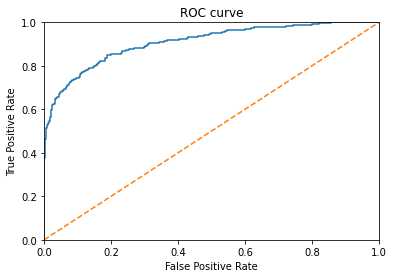

The roc_auc score is: 0.908
The accuracy_test score is: 0.870


C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [421]:
roc_auc, accuracy_test = plot_roc_auc_and_calculate_scoring_functions(
    tunned_model=CBC_tunned, X_test_temp=X_test_cbc, y_test_temp=y_test
)

In [422]:
append_to_score_df('Cat Boost Classifier', roc_auc, accuracy_test)

                 model_name  roc_auc  accuracy
0  Decision Tree Classifier    0.781     0.788
1       Logistic Regression    0.838     0.754
2      Cat Boost Classifier    0.908     0.870


## Dummy Classifier

In [423]:
clf_dummy = DummyClassifier(random_state=12345, strategy='most_frequent') 

In [424]:
clf_dummy.fit(X_train, y_train)

DummyClassifier(random_state=12345, strategy='most_frequent')

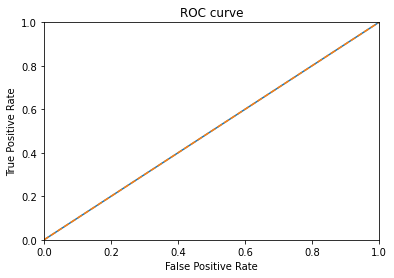

The roc_auc score is: 0.500
The accuracy_test score is: 0.735


In [425]:
roc_auc, accuracy_test = plot_roc_auc_and_calculate_scoring_functions(
    tunned_model=clf_dummy, X_test_temp=X_test, y_test_temp=y_test
)

In [426]:
append_to_score_df('Dummy Classifier', roc_auc, accuracy_test)

                 model_name  roc_auc  accuracy
0  Decision Tree Classifier    0.781     0.788
1       Logistic Regression    0.838     0.754
2      Cat Boost Classifier    0.908     0.870
3          Dummy Classifier    0.500     0.735


# Summary

We received the best performance with the Cat Boost Classifier. The roc_auc is **above 0.9** and the accuracy is above 0.86 on the test set. 

Let's explore more metrices of this model predictions

In [427]:
def confusion_summery_f1(clf, X_test, y_test):
    predictions = clf.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()

    plt.show();
    
    my_recall_score = recall_score(y_test, predictions)
    print('The recall score is: {:.3f}'.format(my_recall_score))
    
    my_precision_score = precision_score(y_test, predictions)
    print('The precision score is: {:.3f}'.format(my_precision_score))
    
    my_f1_score = f1_score(y_test, predictions)
    print('The f1 score is: {:.3f}'.format(my_f1_score)) 

C:\Users\nirga\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



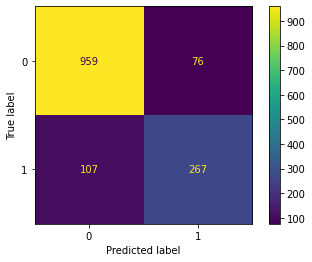

The recall score is: 0.714
The precision score is: 0.778
The f1 score is: 0.745


In [428]:
confusion_summery_f1(CBC_tunned, X_test_cbc, y_test)

The model predict well the True negative and positive results. Much better then the false answer